<a href="https://colab.research.google.com/github/sbenitez87/CAPSTONE/blob/main/CAPSTONE_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **PREDICCION DEL COSTO POR ATENCIONES HOSPITALRIAS**
 ### **RECLAMACIONES DE UNA EMPRESA DE MEDICINA PREPAGDA**

---





## Importamos las librerías


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Para la regresión y validación de supuestos llamamos a statsmodel, el módulo encargado de la notación de fórmula y al módulo para las pruebas de hipótesis.

In [64]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip


### Importamos librerías para los modelos de ML

In [65]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Ahora ,  llamemos a nuestra base de datos a nuestro espacio en el Jupyer Notebook:

In [66]:
#Damos permiso a Google Drive para leer nuestra base de datos.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
filename = '/content/drive/My Drive/BIG DATA/Base_hospital_final.csv'
df = pd.read_csv(filename, sep=';')

In [6]:
df.head()

IdCaso Fecha Incurrencia Fecha inicio vigencia  \
0  598689645-0         17/1/2023              7/9/2001   
1  598689645-0         17/1/2023              7/9/2001   
2  598689645-0         17/1/2023              7/9/2001   
3  598689645-0         17/1/2023              7/9/2001   
4  598689645-0         17/1/2023              7/9/2001   

   Antigüedad cliente meses  Codigo paciente  Edad Paciente    Grupo Etario  \
0                       256          5128299             77  9. 70 - + Años   
1                       256          5128299             77  9. 70 - + Años   
2                       256          5128299             77  9. 70 - + Años   
3                       256          5128299             77  9. 70 - + Años   
4                       256          5128299             77  9. 70 - + Años   

      Genero Provincia Cliente    Producto  ...       Preexistencia  \
0  Masculino            Guayas  INDIVIDUAL  ...  Dx No Preexistente   
1  Masculino            Guayas  INDIVIDUAL  ...  Dx No Preexistente   
2  Masculino            Guayas  INDIVIDUAL  ...  Dx No Preexistente   
3  Masculino            Guayas  INDIVIDUAL  ...  Dx No Preexistente   
4  Masculino            Guayas  INDIVIDUAL  ...  Dx No Preexistente   

  EmergenciaVital lugar-atencion Tipo procedimiento      Tipo tratamiento  \
0              Si       HOSPITAL            CLINICO  CRÓNICO TTO CONTINUO   
1              Si       HOSPITAL            CLINICO  CRÓNICO TTO CONTINUO   
2              Si       HOSPITAL            CLINICO  CRÓNICO TTO CONTINUO   
3              Si       HOSPITAL            CLINICO  CRÓNICO TTO CONTINUO   
4              Si       HOSPITAL            CLINICO  CRÓNICO TTO CONTINUO   

   Tipo transaccion          Rubro facturado Valor facturado Valor cubierto  \
0           Crédito  SERVICIOS HOSPITALARIOS            4172           4172   
1           Crédito             LABORATORIOS         2893,36        2893,36   
2           Crédito  SERVICIOS HOSPITALARIOS         1854,96        1854,96   
3           Crédito    INSUMOS Y SUMINISTROS         1366,01        1366,01   
4           Crédito        TERAPIA INTENSIVA          1352,4         1352,4   

  Valor pagado  
0         4172  
1      2893,36  
2      1854,96  
3      1366,01  
4       1352,4  

[5 rows x 36 columns]

In [7]:
df.shape

(115118, 36)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115118 entries, 0 to 115117
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   IdCaso                         115118 non-null  object
 1   Fecha Incurrencia              115118 non-null  object
 2   Fecha inicio vigencia          115118 non-null  object
 3   Antigüedad cliente meses       115118 non-null  int64 
 4   Codigo paciente                115118 non-null  int64 
 5   Edad Paciente                  115118 non-null  int64 
 6   Grupo Etario                   115118 non-null  object
 7   Genero                         115118 non-null  object
 8   Provincia Cliente              115118 non-null  object
 9   Producto                       115118 non-null  object
 10  Codigo prestador principal     115118 non-null  int64 
 11  Tipo prestador principal       115118 non-null  object
 12  Con convenio                   115118 non-nu

###**Limpieza, pre-procesamiento y/o transformación de datos.**


In [9]:
#Corregimos formatos de fechas
df['Fecha Incurrencia'] = pd.to_datetime(df['Fecha Incurrencia'], format='%d/%m/%Y')
df['Fecha inicio vigencia'] = pd.to_datetime(df['Fecha inicio vigencia'], format='%d/%m/%Y')

In [10]:
# Reemplazar los separadores de miles y decimales y convertir a float para tratar las columnas de valores de forma correcta
df['Valor facturado'] = df['Valor facturado'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['Valor cubierto'] = df['Valor cubierto'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['Valor pagado'] = df['Valor pagado'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

In [11]:
# Convertir las columnas de códigos a object
df['Codigo paciente'] = df['Codigo paciente'].astype(str)
df['Codigo prestador principal'] = df['Codigo prestador principal'].astype(str)

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115118 entries, 0 to 115117
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IdCaso                         115118 non-null  object        
 1   Fecha Incurrencia              115118 non-null  datetime64[ns]
 2   Fecha inicio vigencia          115118 non-null  datetime64[ns]
 3   Antigüedad cliente meses       115118 non-null  int64         
 4   Codigo paciente                115118 non-null  object        
 5   Edad Paciente                  115118 non-null  int64         
 6   Grupo Etario                   115118 non-null  object        
 7   Genero                         115118 non-null  object        
 8   Provincia Cliente              115118 non-null  object        
 9   Producto                       115118 non-null  object        
 10  Codigo prestador principal     115118 non-null  object        
 11  

Se han corregido los tipos de datos


In [13]:
nulos = df.isna().sum().sum()


print(f"Total de registros nulos: {nulos}")

Total de registros nulos: 0


Tenemos 0 valores Nulos

In [14]:
df.describe(include='number')

Antigüedad cliente meses  Edad Paciente  Dias hospitalizacion  \
count             115118.000000  115118.000000         115118.000000   
mean                  69.013560      35.504543              3.142454   
std                   81.988509      24.850339              3.699976   
min                    0.000000      -1.000000              0.000000   
25%                   14.000000      10.000000              1.000000   
50%                   39.000000      35.000000              2.000000   
75%                   82.000000      57.000000              4.000000   
max                  360.000000      98.000000             79.000000   

       Nivel contrato  Valor facturado  Valor cubierto   Valor pagado  
count   115118.000000    115118.000000   115118.000000  115118.000000  
mean         4.225421       452.861789      422.871306     397.361291  
std          1.386273      1120.194698     1046.241111     995.494686  
min          3.000000         0.000000        0.000000       0.000000  
25%          3.000000        92.850000       87.302500      75.680000  
50%          4.000000       203.945000      192.090000     175.670000  
75%          5.000000       442.390000      417.307500     396.000000  
max          8.000000     76806.470000    76806.470000   72701.160000

In [15]:
# Eliminar registros donde "Edad Paciente" es -1
df = df[df['Edad Paciente'] != -1]

In [16]:
df.describe(include='number')

Antigüedad cliente meses  Edad Paciente  Dias hospitalizacion  \
count             115115.000000  115115.000000         115115.000000   
mean                  69.015254      35.505495              3.142484   
std                   81.988905      24.849964              3.700019   
min                    0.000000       0.000000              0.000000   
25%                   14.000000      10.000000              1.000000   
50%                   39.000000      35.000000              2.000000   
75%                   82.000000      57.000000              4.000000   
max                  360.000000      98.000000             79.000000   

       Nivel contrato  Valor facturado  Valor cubierto   Valor pagado  
count   115115.000000    115115.000000   115115.000000  115115.000000  
mean         4.225453       452.872586      422.881321     397.371446  
std          1.386277      1120.207279     1046.252883     995.505669  
min          3.000000         0.000000        0.000000       0.000000  
25%          3.000000        92.855000       87.315000      75.695000  
50%          4.000000       203.950000      192.140000     175.670000  
75%          5.000000       442.395000      417.320000     396.000000  
max          8.000000     76806.470000    76806.470000   72701.160000

Listo, se ha eliminado la edad incorrecta.

###**Agrupación de costos por IdCaso**
Nuestro Dataset se encuentra desglosado por cada rubro factura, es así que debemos realizar una agrupación de costos para obtener el valor total de la hospitalización, adicional por cada rubro crearemnos columnas con sus respectivos valores.

In [17]:
# Crear una tabla pivote con IdCaso como índice, Rubro facturado como columnas y Valor facturado como valores
tabla_facturado_por_rubro = pd.pivot_table(df, index='IdCaso', columns='Rubro facturado', values='Valor facturado', aggfunc='sum')

# Rellenar los valores NaN con 0, en caso de que haya algún IdCaso sin facturación para un rubro específico
tabla_facturado_por_rubro = tabla_facturado_por_rubro.fillna(0)

# Agrupar por IdCaso y sumar los valores facturados, cubiertos y pagados
totales_por_id = df.groupby('IdCaso').agg({
    'Valor facturado': 'sum',
    'Valor cubierto': 'sum',
    'Valor pagado': 'sum'
}).reset_index()

# Merge los totales con la tabla pivote para tener una tabla final con los valores por rubro y los totales
# Asegurémonos que tenemos el índice de IdCaso en ambos DataFrames
tabla_final = pd.merge(tabla_facturado_por_rubro.reset_index(), totales_por_id, on='IdCaso', how='left')

# Renombrar columnas para claridad
tabla_final.rename(columns={
    'Valor facturado': 'Valor facturado total',
    'Valor cubierto': 'Valor cubierto total',
    'Valor pagado': 'Valor pagado total',
    'Valor facturado_y': 'Valor total facturado',
    'Valor cubierto_y': 'Valor total cubierto',
    'Valor pagado_y': 'Valor total pagado'
}, inplace=True)




In [18]:
tabla_final.head()

IdCaso  HONORARIOS MEDICOS  INSUMOS Y SUMINISTROS  LABORATORIOS  \
0  2130122137-0              871.29                 201.10        123.62   
1  2130122250-0             3680.04                1050.43         93.12   
2  2130122251-0             2333.07                 959.14        162.86   
3  2130122258-0              870.90                3698.28       1484.75   
4  2130122832-1             4000.00                   0.00          0.00   

   MEDICINAS   OTROS  PROTESIS  SERVICIOS HOSPITALARIOS  TERAPIA INTENSIVA  \
0     116.74   65.79      0.00                   481.22                0.0   
1    1223.05  307.34   5555.77                  1024.52                0.0   
2     640.87    0.00      0.00                  1441.07                0.0   
3    5674.34    0.00      0.00                  2354.27                0.0   
4       0.00    0.00      0.00                     0.00                0.0   

   Valor facturado total  Valor cubierto total  Valor pagado total  
0                1859.76               1579.41             1537.08  
1               12934.27              11409.22             9656.33  
2                5537.01               4917.37             4791.73  
3               14082.54              13916.56            13759.78  
4                4000.00               1177.43              777.56

In [19]:
tabla_final.shape

(15893, 12)

Una vez agrupado observamos que nos quedan 15893 casos únicos de hospitalización

Con nuestros valores agrupados procedemos a generar nuestro data set con todas las variables categóricas agrupado por cada caso


In [20]:
# Convertir IdCaso en ambas tablas a tipo string para asegurar que coincidan
df['IdCaso'] = df['IdCaso'].astype(str)
tabla_final['IdCaso'] = tabla_final['IdCaso'].astype(str)

# Crear df_nuevo excluyendo las columnas especificadas
columnas_a_eliminar = ['Rubro facturado', 'Valor facturado', 'Valor cubierto', 'Valor pagado']
df_nuevo = df.drop(columnas_a_eliminar, axis=1, errors='ignore')

# Unir las tablas por IdCaso
df_agregado = pd.merge(df_nuevo, tabla_final, on='IdCaso', how='left')


df_agregado['Valor facturado total'] = pd.to_numeric(df_agregado['Valor facturado total'], errors='coerce')


# Ordenar el DataFrame por 'Valor facturado total' de mayor a menor
df_agregado_sorted = df_agregado.sort_values(by='Valor facturado total', ascending=False)

# Dejar solo un registro por 'IdCaso', manteniendo el de mayor 'Valor facturado total'
df_agregado_unique = df_agregado_sorted.drop_duplicates(subset='IdCaso', keep='first')


In [21]:
# Mostrar la descripción del DataFrame único
df_agregado_unique.head()

IdCaso Fecha Incurrencia Fecha inicio vigencia  \
112773   28877141-0        2023-05-04            1995-12-01   
100     598844257-2        2023-05-10            2020-12-29   
792      28782477-0        2023-05-18            2011-03-24   
745     598894228-0        2023-07-31            2020-04-16   
56      598849134-0        2023-05-04            2019-07-09   

        Antigüedad cliente meses Codigo paciente  Edad Paciente  \
112773                       329           66214             76   
100                           28         1260250             49   
792                          145          795359             71   
745                           39         7038110             56   
56                            54         5629993             54   

           Grupo Etario     Genero Provincia Cliente       Producto  ...  \
112773   9. 70 - + Años  Masculino         Pichincha     INDIVIDUAL  ...   
100     5. 32 - 49 Años  Masculino            Guayas  INTERNACIONAL  ...   
792      9. 70 - + Años  Masculino         Pichincha     ONCOLOGICO  ...   
745     6. 50 - 60 Años  Masculino            Guayas     INDIVIDUAL  ...   
56      6. 50 - 60 Años   Femenino            Guayas     ONCOLOGICO  ...   

       INSUMOS Y SUMINISTROS LABORATORIOS MEDICINAS    OTROS PROTESIS  \
112773              65617.22         0.00      0.00     0.00     0.00   
100                  2382.44      3409.15   5162.99     0.00  4715.64   
792                 39742.30     10263.44  23455.08  2766.13     0.00   
745                    91.99      6639.44   2187.00  1870.50  5156.77   
56                   5212.09     16805.38  32940.20  5928.21     0.00   

        SERVICIOS HOSPITALARIOS  TERAPIA INTENSIVA Valor facturado total  \
112773                 76806.47                0.0             195617.22   
100                    55887.42             5400.0             107617.27   
792                     9356.60                0.0             106299.37   
745                    39289.98             9031.3              94189.30   
56                     28724.91                0.0              93594.49   

       Valor cubierto total Valor pagado total  
112773             76806.47           44000.00  
100               107617.27          107617.27  
792                61533.24           61533.24  
745                94189.30           94069.30  
56                 92046.19           85351.06  

[5 rows x 43 columns]

In [22]:
df_agregado_unique.shape

(15893, 43)

In [23]:
#Eliminamos las columns de códigos que poseen la misma información que las descripciones, y que no son relevantes para nuestro estudio
df_final = df_agregado_unique.copy()

Listo, ahora contamos con un data set agrupado por cada caso con sus respectos costos por cada rubro

In [24]:
# Obtener listas de columnas por tipo
object_columns = df_final.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Crear DataFrame para mostrar la tabla
variables_df = pd.DataFrame({
    'Variables Numéricas': pd.Series(numeric_columns),
    'Variables Object': pd.Series(object_columns)
})

# Mostrar la tabla
print(variables_df)

         Variables Numéricas               Variables Object
0   Antigüedad cliente meses                         IdCaso
1              Edad Paciente                Codigo paciente
2       Dias hospitalizacion                   Grupo Etario
3             Nivel contrato                         Genero
4         HONORARIOS MEDICOS              Provincia Cliente
5      INSUMOS Y SUMINISTROS                       Producto
6               LABORATORIOS     Codigo prestador principal
7                  MEDICINAS       Tipo prestador principal
8                      OTROS                   Con convenio
9                   PROTESIS  Provincia prestador principal
10   SERVICIOS HOSPITALARIOS                   Tipo reclamo
11         TERAPIA INTENSIVA                    Canal Venta
12     Valor facturado total                      Severidad
13      Valor cubierto total             Codigo Diagnostico
14        Valor pagado total             Codigo dx primario
15                       NaN            

In [25]:
df_final.describe(include='number')

Antigüedad cliente meses  Edad Paciente  Dias hospitalizacion  \
count              15893.000000   15893.000000          15893.000000   
mean                  64.993393      34.373498              2.739823   
std                   78.627108      24.430211              2.972112   
min                    0.000000       0.000000              0.000000   
25%                   13.000000       9.000000              1.000000   
50%                   36.000000      34.000000              2.000000   
75%                   77.000000      55.000000              3.000000   
max                  360.000000      98.000000             79.000000   

       Nivel contrato  HONORARIOS MEDICOS  INSUMOS Y SUMINISTROS  \
count    15893.000000         15893.00000           15893.000000   
mean         4.221229           921.00452             368.809621   
std          1.396396          1432.04730            1400.482970   
min          3.000000             0.00000               0.000000   
25%          3.000000           166.40000               0.000000   
50%          4.000000           424.84000              65.700000   
75%          5.000000          1226.87000             281.070000   
max          8.000000         53193.53000           65617.220000   

       LABORATORIOS     MEDICINAS         OTROS      PROTESIS  \
count  15893.000000  15893.000000  15893.000000  15893.000000   
mean     302.153985    585.716264     35.974894    153.061890   
std      551.375334   1694.365019    260.657212    901.237278   
min        0.000000      0.000000      0.000000      0.000000   
25%       40.840000     58.470000      0.000000      0.000000   
50%      148.730000    220.750000      0.000000      0.000000   
75%      345.440000    568.040000      0.000000      0.000000   
max    16805.380000  72701.160000  22200.730000  28746.530000   

       SERVICIOS HOSPITALARIOS  TERAPIA INTENSIVA  Valor facturado total  \
count             15893.000000       15893.000000           15893.000000   
mean                856.939937          56.552051            3280.213161   
std                1642.676018         456.689029            5145.101868   
min                   0.000000           0.000000               1.270000   
25%                 269.980000           0.000000             942.200000   
50%                 500.000000           0.000000            1916.500000   
75%                 977.900000           0.000000            3881.720000   
max               76806.470000       18450.000000          195617.220000   

       Valor cubierto total  Valor pagado total  
count          15893.000000        15893.000000  
mean            3062.982651         2878.211412  
std             4689.336338         4512.352742  
min                0.000000            0.000000  
25%              881.260000          797.970000  
50%             1784.380000         1672.110000  
75%             3611.610000         3399.630000  
max           107617.270000       107617.270000

**Comentarios relevantes sobre los datos descriptivos**

1. Distribución de la Antigüedad del Cliente:
La media de la antigüedad del cliente es de aproximadamente 65 meses, con una desviación estándar de 78.63 meses.
Esto indica una variabilidad considerable en la antigüedad de los clientes, y un rango amplio, ya que el mínimo es 0 y el máximo 360 meses.

2. Edad de los Pacientes:
La edad media de los pacientes es de aproximadamente 34.37 años, con una desviación estándar de 24.43 años.
La edad mínima es 0 (posiblemente recién nacidos) y la máxima es 98 años, lo que refleja una amplia gama de edades de los pacientes atendidos.

3. Días de Hospitalización:
El promedio de días de hospitalización es de 2.74 días, con una desviación estándar de 2.97 días.
Aunque la mayoría de las hospitalizaciones son cortas (mediana de 2 días), hay algunos casos extremos con hasta 79 días de hospitalización.

4. Costos Médicos:
Los costos asociados a los honorarios médicos, insumos y suministros, laboratorios y medicinas presentan una media y mediana significativamente menores que sus máximos,
indicando una distribución sesgada hacia la derecha. Por ejemplo, el costo promedio de honorarios médicos es de 921.00, mientras que el máximo es 53,193.53, reflejando casos de alto costo que elevan la media.

5. Valor Facturado Total y Valores Cubiertos/Pagados:
El valor facturado total tiene una media de 3,280.21 con una desviación estándar de 5,145.10, indicando una alta variabilidad en los costos facturados.
Además, el valor cubierto y el valor pagado total tienen medias cercanas, lo que sugiere que la mayoría de los costos facturados son cubiertos y pagados,
aunque hay variabilidad significativa como lo indican sus desviaciones estándar de 4,689.34 y 4,512.35 respectivamente.


In [26]:
# Obtener las columnas de tipo object
object_columns = df_final.select_dtypes(include=['object']).columns

# Crear un DataFrame para almacenar el número de clases de cada variable object
classes_count = {col: df_final[col].nunique() for col in object_columns}
classes_df = pd.DataFrame(list(classes_count.items()), columns=['Variable', 'Número de Clases'])

# Ordenar el DataFrame por el número de clases de mayor a menor
classes_df = classes_df.sort_values(by='Número de Clases', ascending=False)

# Mostrar la tabla
print(classes_df)


                         Variable  Número de Clases
0                          IdCaso             15893
1                 Codigo paciente             12564
13             Codigo Diagnostico              1813
16                       Dx Final              1807
15                    Dx Primario               793
14             Codigo dx primario               792
6      Codigo prestador principal               649
17        Familia dx relacionados               427
18     Agrupacion Dx relacionados                78
9   Provincia prestador principal                24
2                    Grupo Etario                 9
4               Provincia Cliente                 9
7        Tipo prestador principal                 5
11                    Canal Venta                 4
12                      Severidad                 4
24               Tipo tratamiento                 4
5                        Producto                 4
20                  Preexistencia                 2
23          

In [27]:
total_nulos = df_final.isna().sum().sum()
total_duplicados = df_final.duplicated().sum()

print(f"Total de registros nulos: {total_nulos}, Total de registros duplicados: {total_duplicados}")


Total de registros nulos: 0, Total de registros duplicados: 0


##**ANALISIS EXPLORATORIO DE LOS DATOS**



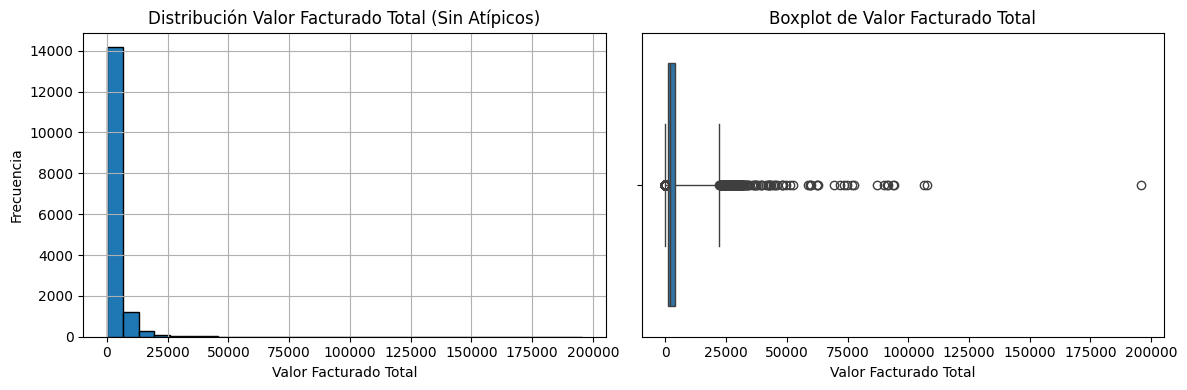

In [28]:
# Crear un lienzo con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Crear el histograma del nuevo DataFrame sin valores atípicos en el primer subgráfico
axes[0].hist(df_final['Valor facturado total'], bins=30, edgecolor='black')
axes[0].set_title('Distribución Valor Facturado Total (Sin Atípicos)')
axes[0].set_xlabel('Valor Facturado Total')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True)

# Crear el boxplot con límites personalizados en el segundo subgráfico
sns.boxplot(x='Valor facturado total', data=df_final, whis=[1, 99], orient='h', ax=axes[1])
axes[1].set_title('Boxplot de Valor Facturado Total')
axes[1].set_xlabel('Valor Facturado Total')

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Se observa colas a partir de los 25.000 USD, asi mismo un caso atípico de casi 200.000 usd


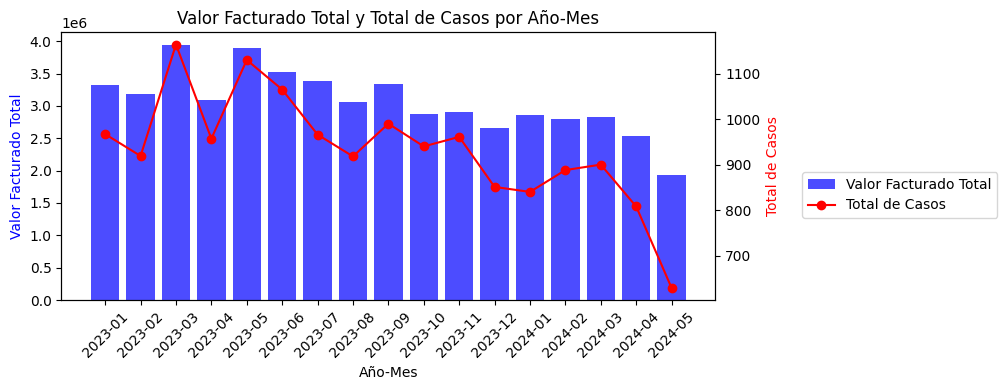

In [29]:
# Crear una nueva columna 'Año-Mes'
df_final['Año-Mes'] = df_final['Fecha Incurrencia'].dt.strftime('%Y-%m')

# Agrupar por año-mes y sumar los valores facturados
datos_agrupados_valor = df_final.groupby('Año-Mes')['Valor facturado total'].sum().reset_index()

# Agrupar por año-mes y contar los casos (filas)
datos_agrupados_casos = df_final.groupby('Año-Mes').size().reset_index(name='Total de Casos')

# Configurar el tamaño de la figura
fig, ax1 = plt.subplots(figsize=(8, 4))

# Crear el diagrama de barras para el Valor Facturado Total por Año-Mes
ax1.bar(datos_agrupados_valor['Año-Mes'], datos_agrupados_valor['Valor facturado total'], color='b', alpha=0.7, label='Valor Facturado Total')

# Crear el segundo eje y para la línea de tendencia de Total de Casos
ax2 = ax1.twinx()
ax2.plot(datos_agrupados_casos['Año-Mes'], datos_agrupados_casos['Total de Casos'], color='r', linestyle='-', marker='o', label='Total de Casos')

# Añadir títulos y etiquetas
ax1.set_title('Valor Facturado Total y Total de Casos por Año-Mes')
ax1.set_xlabel('Año-Mes')
ax1.set_ylabel('Valor Facturado Total', color='b')
ax2.set_ylabel('Total de Casos', color='r')

# Rotar etiquetas del eje x
ax1.tick_params(axis='x', rotation=45)

# Desactivar la cuadrícula interna
ax1.grid(False)
ax2.grid(False)

# Añadir leyendas en el recuadro a la derecha
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()




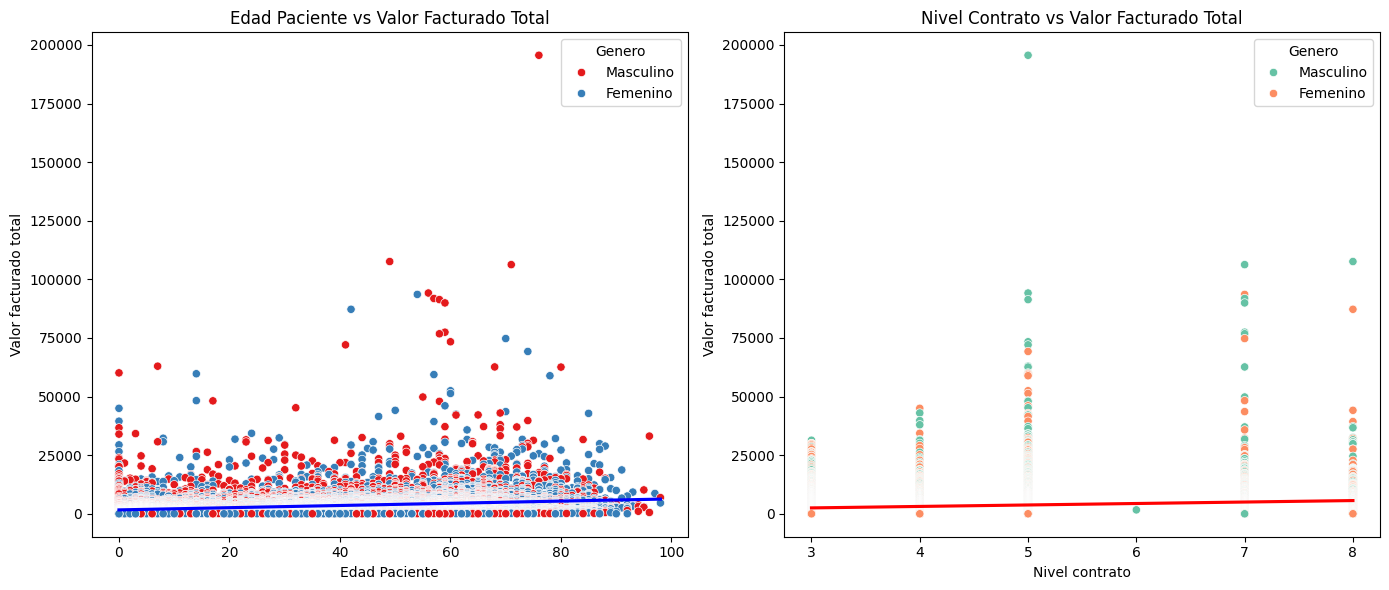

In [30]:
# Configurar la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico usando sns.regplot
sns.scatterplot(x='Edad Paciente', y='Valor facturado total', hue='Genero', palette='Set1', data=df_final, ax=ax1)
sns.regplot(x='Edad Paciente', y='Valor facturado total', data=df_final, scatter=False, ax=ax1, color='blue')
ax1.set_title('Edad Paciente vs Valor Facturado Total')

# Segundo gráfico usando sns.regplot
sns.scatterplot(x='Nivel contrato', y='Valor facturado total', hue='Genero', palette='Set2', data=df_final, ax=ax2)
sns.regplot(x='Nivel contrato', y='Valor facturado total', data=df_final, scatter=False, ax=ax2, color='red')
ax2.set_title('Nivel Contrato vs Valor Facturado Total')

# Mostrar la figura
plt.tight_layout()
plt.show()



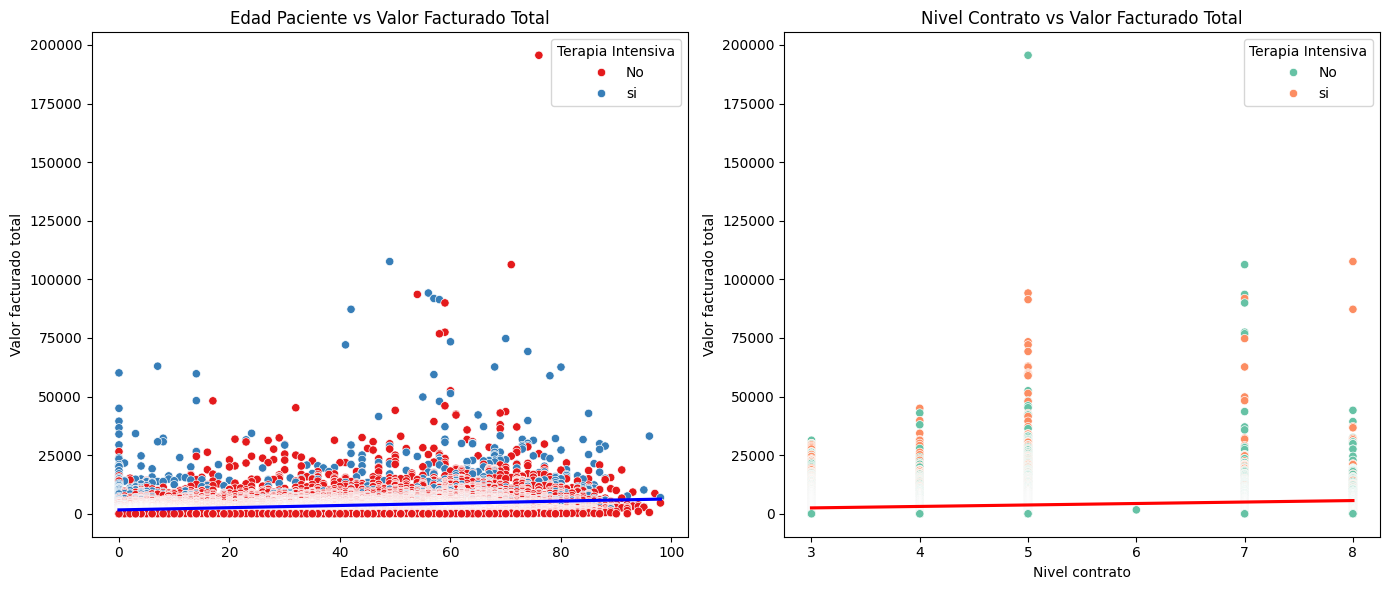

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico usando sns.regplot
sns.scatterplot(x='Edad Paciente', y='Valor facturado total', hue='Terapia Intensiva', palette='Set1', data=df_final, ax=ax1)
sns.regplot(x='Edad Paciente', y='Valor facturado total', data=df_final, scatter=False, ax=ax1, color='blue')
ax1.set_title('Edad Paciente vs Valor Facturado Total')

# Segundo gráfico usando sns.regplot
sns.scatterplot(x='Nivel contrato', y='Valor facturado total', hue='Terapia Intensiva', palette='Set2', data=df_final, ax=ax2)
sns.regplot(x='Nivel contrato', y='Valor facturado total', data=df_final, scatter=False, ax=ax2, color='red')
ax2.set_title('Nivel Contrato vs Valor Facturado Total')

# Mostrar la figura
plt.tight_layout()
plt.show()


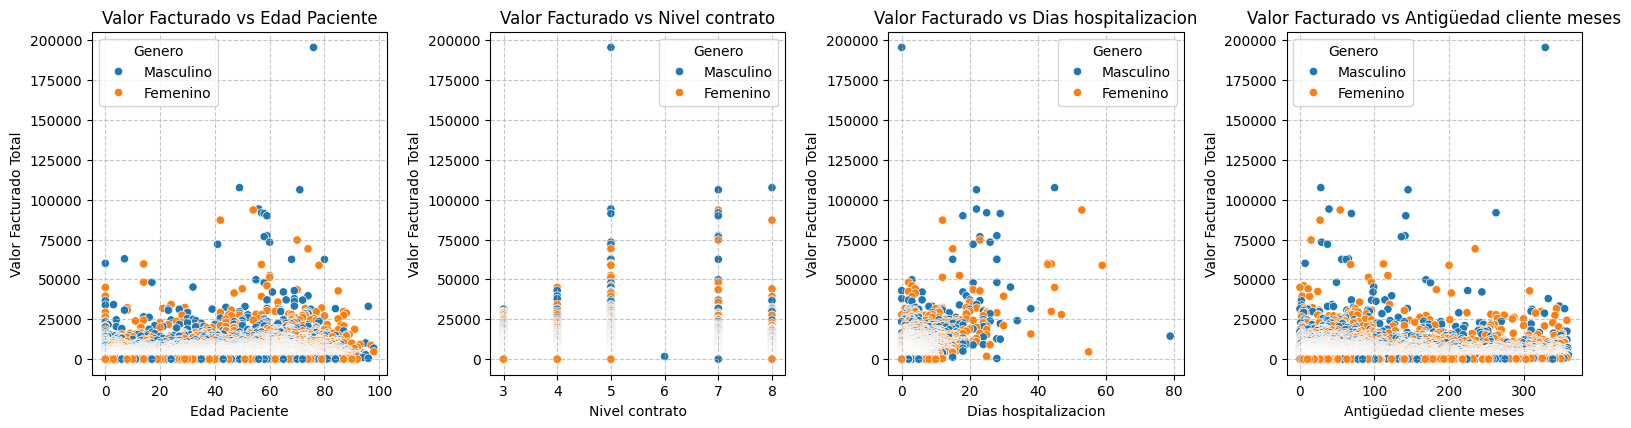

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura y la cuadrícula de subgráficos
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Lista de variables para comparar con 'Valor facturado total'
variables = [
    'Edad Paciente', 'Nivel contrato', 'Dias hospitalizacion',
    'Antigüedad cliente meses'
]

# Crear un gráfico para cada variable
for i, variable in enumerate(variables):
    sns.scatterplot(x=variable, y='Valor facturado total', hue='Genero', data=df_final, ax=axes[i])
    axes[i].set_title(f'Valor Facturado vs {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Valor Facturado Total')
    axes[i].legend(title='Genero')
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Eliminar los subgráficos restantes si hay más subgráficos de los necesarios
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

# Mostrar los gráficos
plt.show()


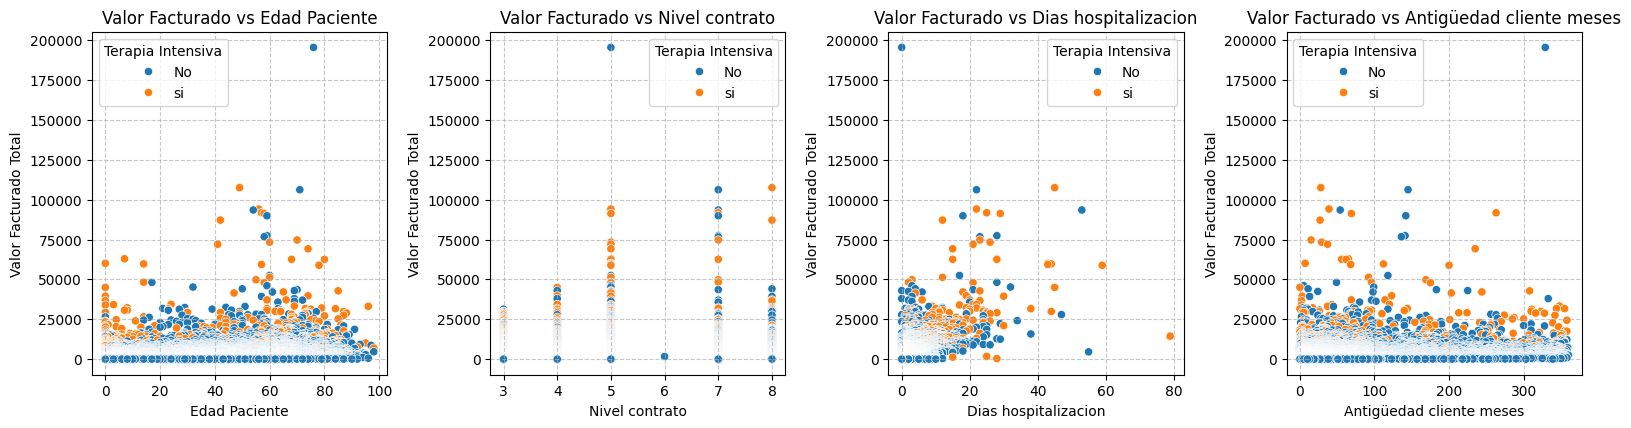

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura y la cuadrícula de subgráficos
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Lista de variables para comparar con 'Valor facturado total'
variables = [
    'Edad Paciente', 'Nivel contrato', 'Dias hospitalizacion',
    'Antigüedad cliente meses'
]

# Crear un gráfico para cada variable
for i, variable in enumerate(variables):
    sns.scatterplot(x=variable, y='Valor facturado total', hue='Terapia Intensiva', data=df_final, ax=axes[i])
    axes[i].set_title(f'Valor Facturado vs {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Valor Facturado Total')
    axes[i].legend(title='Terapia Intensiva')
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Eliminar los subgráficos restantes si hay más subgráficos de los necesarios
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [35]:
import pandas as pd

# Suponiendo que df_final es tu DataFrame con las variables categóricas
categorical_columns = df_final.select_dtypes(include=['object']).columns

# Crear una lista vacía para almacenar los resultados
classes_count_list = []

# Iterar sobre las columnas categóricas y contar los valores únicos
for col in categorical_columns:
    num_classes = df_final[col].nunique()
    if num_classes > 50:
        classes_count_list.append({'Variable Categórica': col, 'Cantidad de Clases': num_classes})

# Convertir la lista de diccionarios a un DataFrame
classes_count_df = pd.DataFrame(classes_count_list)

# Ordenar el DataFrame por 'Cantidad de Clases' de mayor a menor
classes_count_df = classes_count_df.sort_values(by='Cantidad de Clases', ascending=False)

# Mostrar la tabla resultante
print(classes_count_df)




          Variable Categórica  Cantidad de Clases
0                      IdCaso               15893
1             Codigo paciente               12564
3          Codigo Diagnostico                1813
6                    Dx Final                1807
5                 Dx Primario                 793
4          Codigo dx primario                 792
2  Codigo prestador principal                 649
7     Familia dx relacionados                 427
8  Agrupacion Dx relacionados                  78


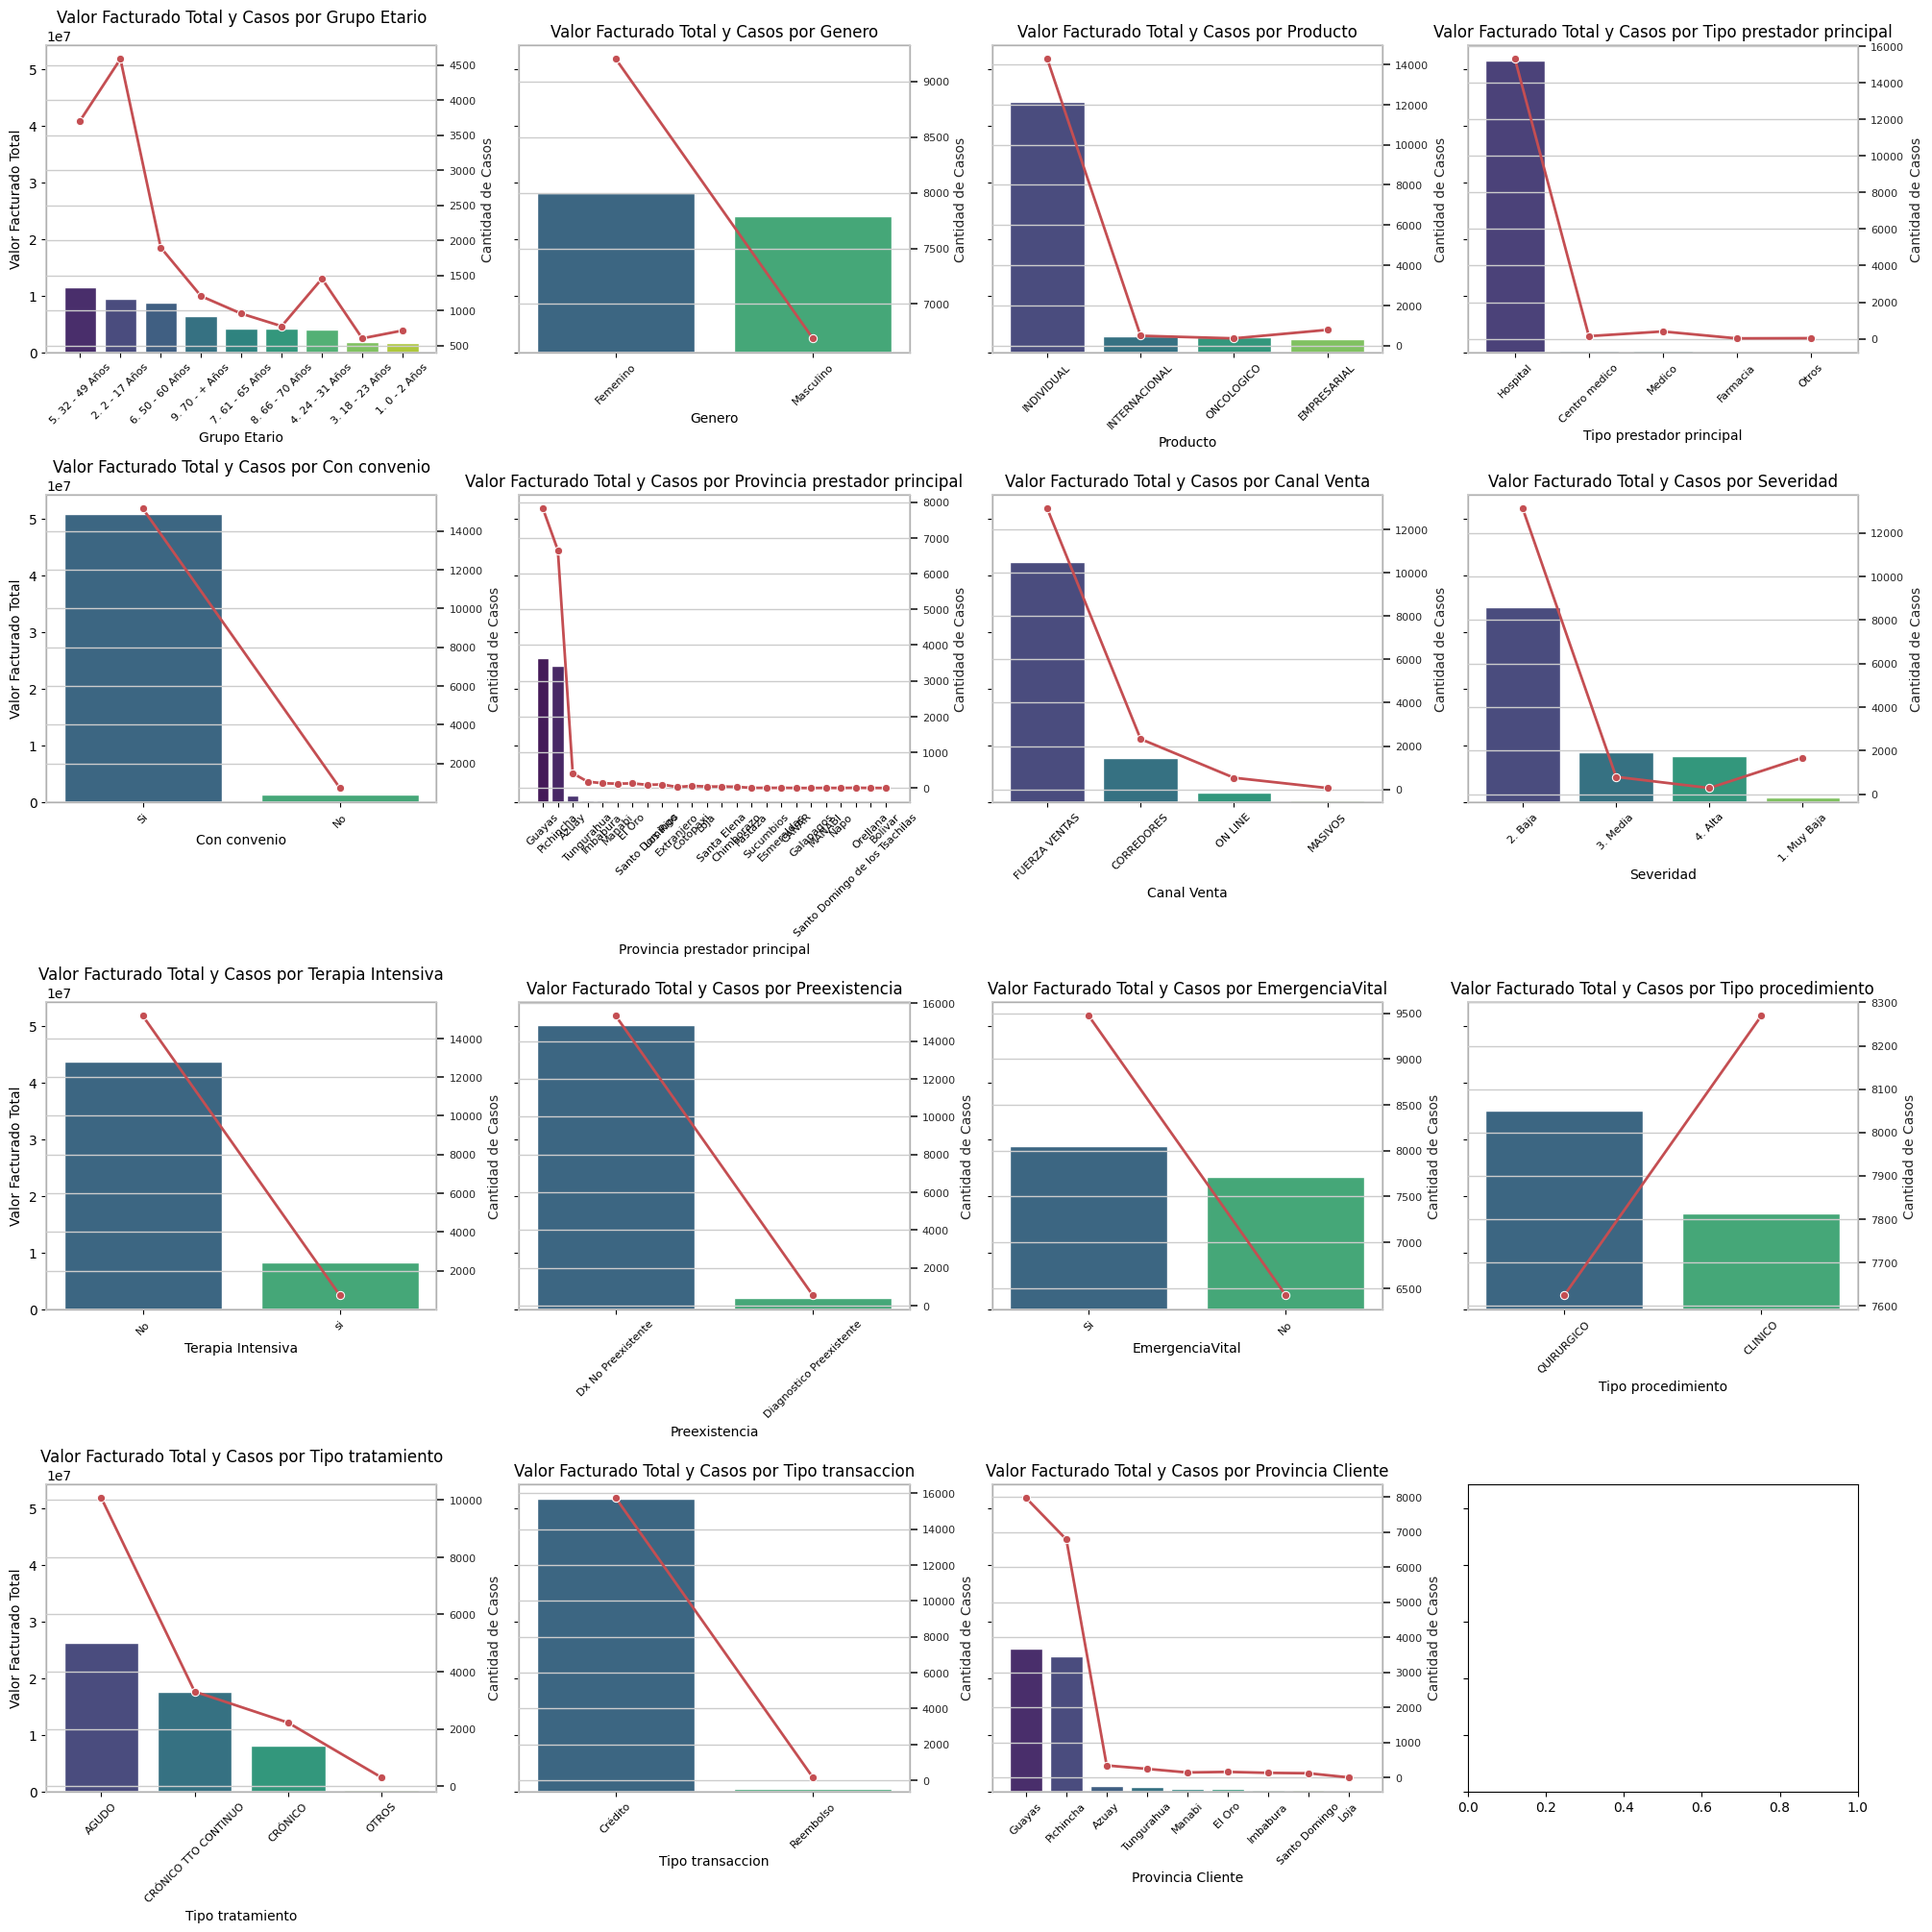

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir las variables categóricas con menos de 50 clases
categorical_vars = [
    'Grupo Etario', 'Genero', 'Producto', 'Tipo prestador principal',
    'Con convenio', 'Provincia prestador principal', 'Canal Venta',
    'Severidad', 'Terapia Intensiva', 'Preexistencia', 'EmergenciaVital',
    'Tipo procedimiento', 'Tipo tratamiento', 'Tipo transaccion','Provincia Cliente',
]

# Crear figura y ejes para los subplots, configurando 4 filas y 4 columnas para un total de 16 gráficos
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharey=True, constrained_layout=True)

# Aumentar el espacio vertical entre los subplots
plt.subplots_adjust(hspace=0.5)

# Configurar estilo de los gráficos
sns.set(style='whitegrid')

# Iterar sobre las variables categóricas y crear los gráficos combinados
for i, var in enumerate(categorical_vars):
    # Calcular la posición en la cuadrícula de gráficos
    row = i // 4  # Determina la fila (0 a 3)
    col = i % 4   # Determina la columna (0 a 3)

    # Agrupar por la variable categórica y sumar el valor facturado total
    data_grouped_sum = df_final.groupby(var)['Valor facturado total'].sum().reset_index()

    # Contar los casos únicos por cada categoría
    data_grouped_count = df_final.groupby(var).size().reset_index(name='Cantidad de Casos')

    # Combinar ambos resultados en un único DataFrame
    data_grouped = pd.merge(data_grouped_sum, data_grouped_count, on=var)

    # Ordenar los datos agrupados de forma descendente por el valor facturado total
    data_grouped = data_grouped.sort_values(by='Valor facturado total', ascending=False)

    # Crear el gráfico de barras para el valor facturado total
    sns.barplot(x=var, y='Valor facturado total', data=data_grouped, ax=axes[row, col], palette='viridis')

    # Configurar título y etiquetas de los ejes para las barras
    axes[row, col].set_title(f'Valor Facturado Total y Casos por {var}', fontsize=12)
    axes[row, col].set_xlabel(var, fontsize=10)  # Tamaño de fuente ajustado para etiquetas del eje x
    axes[row, col].set_ylabel('Valor Facturado Total', fontsize=10)

    # Ajustar las etiquetas del eje x para mejorar la legibilidad
    axes[row, col].tick_params(axis='x', labelrotation=45, labelsize=8)  # Tamaño de fuente ajustado para etiquetas del eje x

    # Crear el gráfico de líneas para la cantidad de casos
    ax2 = axes[row, col].twinx()
    sns.lineplot(x=var, y='Cantidad de Casos', data=data_grouped, ax=ax2, color='r', marker='o', linewidth=2)

    # Configurar etiquetas del eje y para la línea
    ax2.set_ylabel('Cantidad de Casos', fontsize=10)
    ax2.tick_params(axis='y', labelsize=8)  # Tamaño de fuente ajustado para etiquetas del eje y

# Mostrar los gráficos
plt.show()



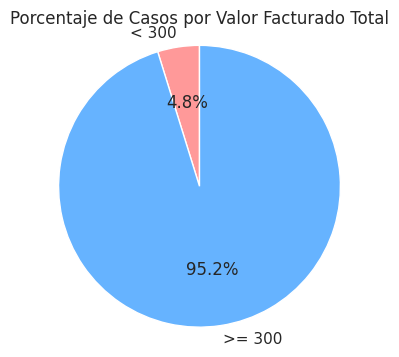

In [37]:
import matplotlib.pyplot as plt

# Contar los casos con valor facturado total < 300 y >= 300
menos_300 = df_final[df_final['Valor facturado total'] < 300].shape[0]
mas_300 = df_final[df_final['Valor facturado total'] >= 300].shape[0]

# Crear una lista con las cuentas
counts = [menos_300, mas_300]

# Etiquetas para el gráfico de tarta
labels = ['< 300', '>= 300']

# Colores para cada sección del gráfico
colors = ['#ff9999','#66b3ff']

# Crear el gráfico de tarta
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Casos por Valor Facturado Total')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()


De nuestra experiencia decidimos eliminar aquellos casos con valores menos a USD 300,00 porque se podrían considerar como reclamos ambulatorios que no requerían una hospitalización.

In [38]:
# Crear un nuevo DataFrame excluyendo los registros con Valor facturado total < 300
df_final_filtered = df_final[df_final['Valor facturado total'] >= 300]
df_final_filtered.describe(include='number')



Antigüedad cliente meses  Edad Paciente  Dias hospitalizacion  \
count              15131.000000   15131.000000          15131.000000   
mean                  65.882295      34.409358              2.803450   
std                   79.294333      24.557052              3.006552   
min                    0.000000       0.000000              0.000000   
25%                   13.000000       9.000000              1.000000   
50%                   37.000000      34.000000              2.000000   
75%                   78.000000      56.000000              3.000000   
max                  360.000000      98.000000             79.000000   

       Nivel contrato  HONORARIOS MEDICOS  INSUMOS Y SUMINISTROS  \
count    15131.000000        15131.000000           15131.000000   
mean         4.230454          964.841281             385.472236   
std          1.393626         1453.838433            1433.210699   
min          3.000000            0.000000               0.000000   
25%          3.000000          200.000000               0.605000   
50%          4.000000          482.220000              72.000000   
75%          5.000000         1280.000000             302.600000   
max          8.000000        53193.530000           65617.220000   

       LABORATORIOS     MEDICINAS         OTROS      PROTESIS  \
count  15131.000000  15131.000000  15131.000000  15131.000000   
mean     316.542544    614.612156     37.641065    160.770116   
std      561.184445   1731.467285    266.999570    922.982117   
min        0.000000      0.000000      0.000000      0.000000   
25%       54.240000     77.015000      0.000000      0.000000   
50%      161.600000    245.260000      0.000000      0.000000   
75%      362.300000    593.835000      0.000000      0.000000   
max    16805.380000  72701.160000  22200.730000  28746.530000   

       SERVICIOS HOSPITALARIOS  TERAPIA INTENSIVA  Valor facturado total  \
count             15131.000000       15131.000000           15131.000000   
mean                898.635162          59.387529            3437.902088   
std                1672.679679         467.866526            5223.626580   
min                   0.000000           0.000000             300.000000   
25%                 299.635000           0.000000            1047.480000   
50%                 531.420000           0.000000            2055.370000   
75%                1007.355000           0.000000            4023.070000   
max               76806.470000       18450.000000          195617.220000   

       Valor cubierto total  Valor pagado total  
count          15131.000000        15131.000000  
mean            3210.304116         3017.363898  
std             4758.603479         4580.672930  
min                0.000000            0.000000  
25%              979.690000          898.285000  
50%             1920.760000         1791.550000  
75%             3752.220000         3537.400000  
max           107617.270000       107617.270000

**Revisamos los outliers por valor facturado**

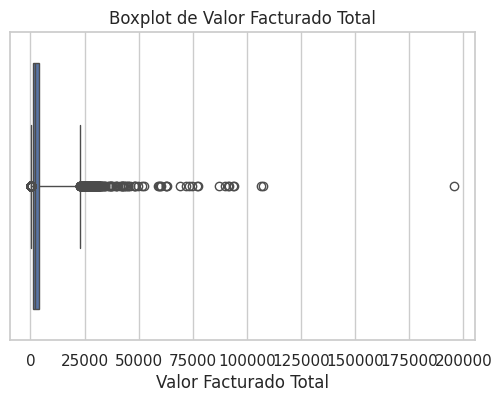

In [39]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(6, 4))

# Crear el boxplot con límites personalizados
sns.boxplot(x='Valor facturado total', data=df_final_filtered, whis=[1, 99], orient='h')

# Configurar título y etiquetas
plt.title('Boxplot de Valor Facturado Total')
plt.xlabel('Valor Facturado Total')

# Mostrar el gráfico
plt.show()


In [40]:
import pandas as pd

# Calcular los percentiles
Q1 = df_final_filtered['Valor facturado total'].quantile(0.25)
Q2 = df_final_filtered['Valor facturado total'].quantile(0.50)
Q3 = df_final_filtered['Valor facturado total'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Determinar los límites superior e inferior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 2 * IQR

print(f"Percentil 25% (Q1): {Q1}")
print(f"Percentil 50% (Q2): {Q2}")
print(f"Percentil 75% (Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")



Percentil 25% (Q1): 1047.48
Percentil 50% (Q2): 2055.37
Percentil 75% (Q3): 4023.0699999999997
IQR: 2975.5899999999997
Límite inferior: -3415.9049999999993
Límite superior: 9974.25


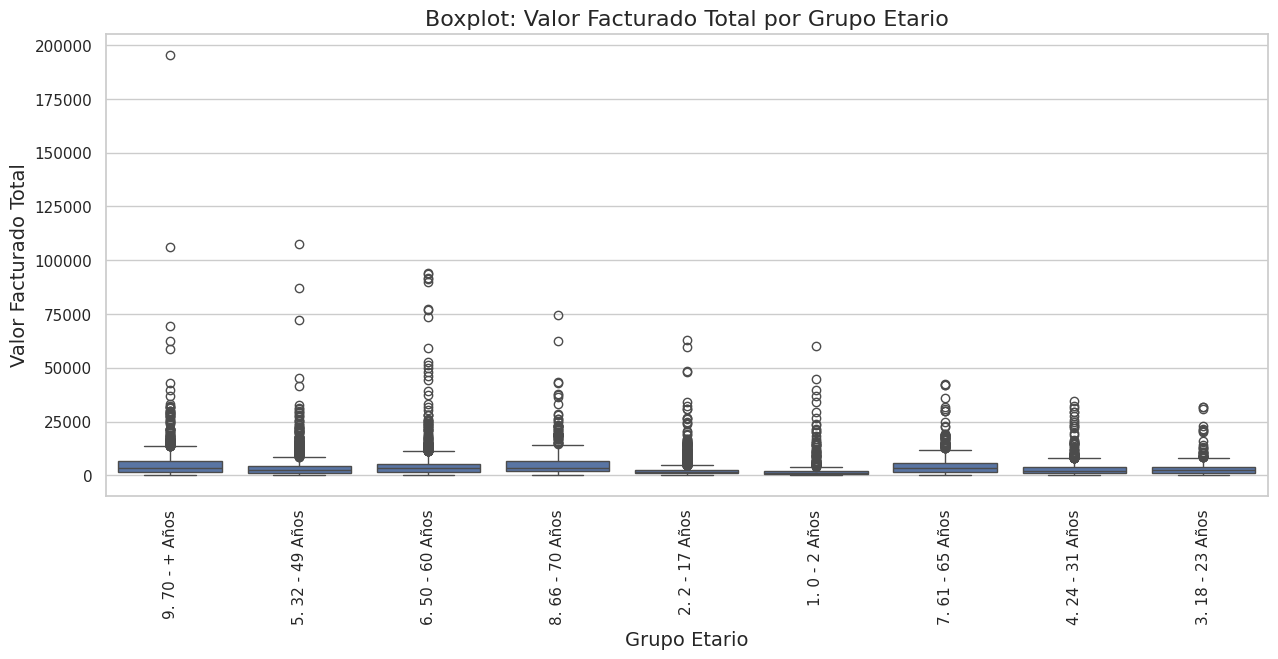

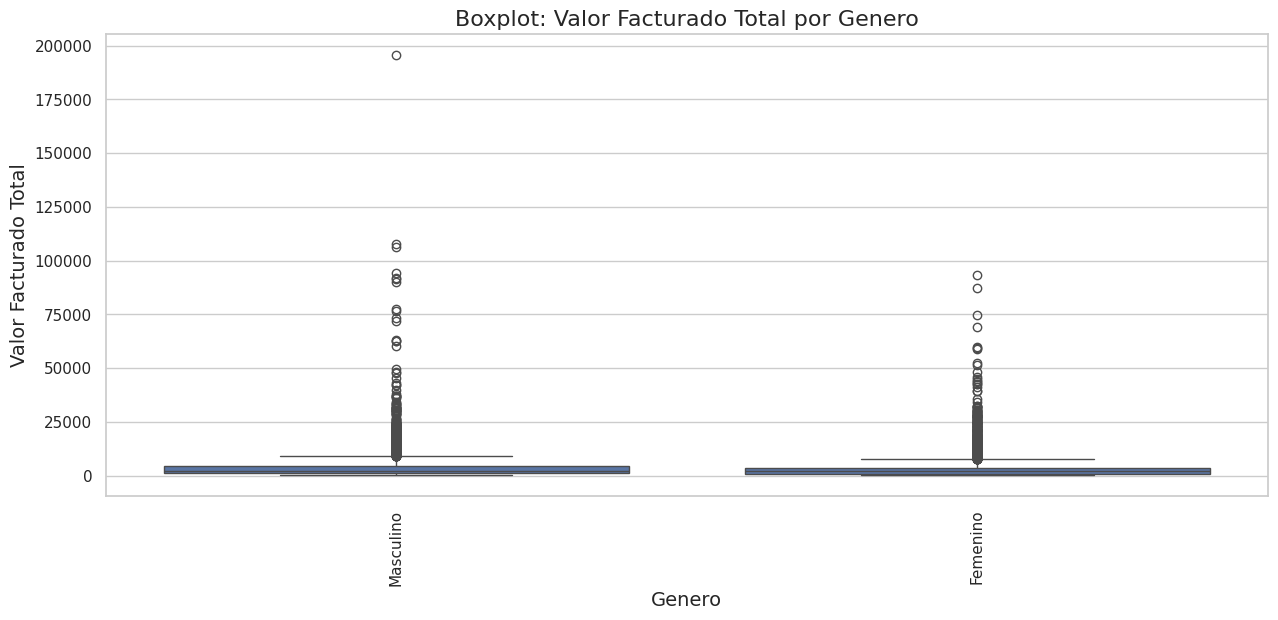

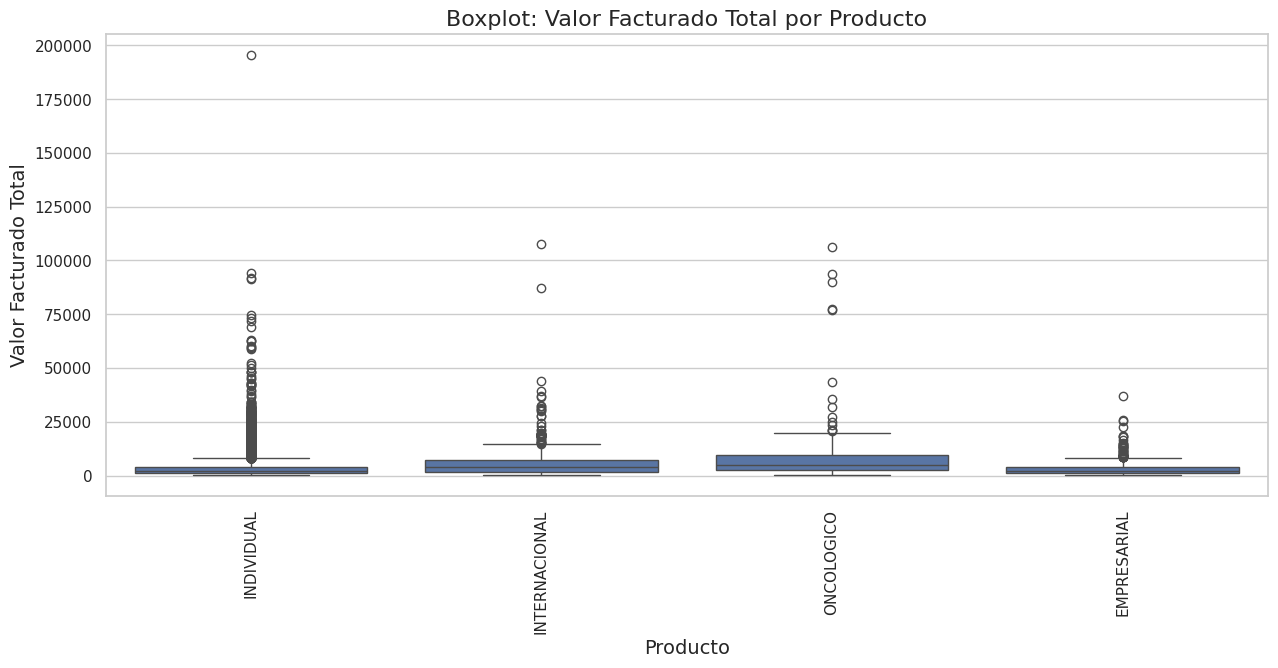

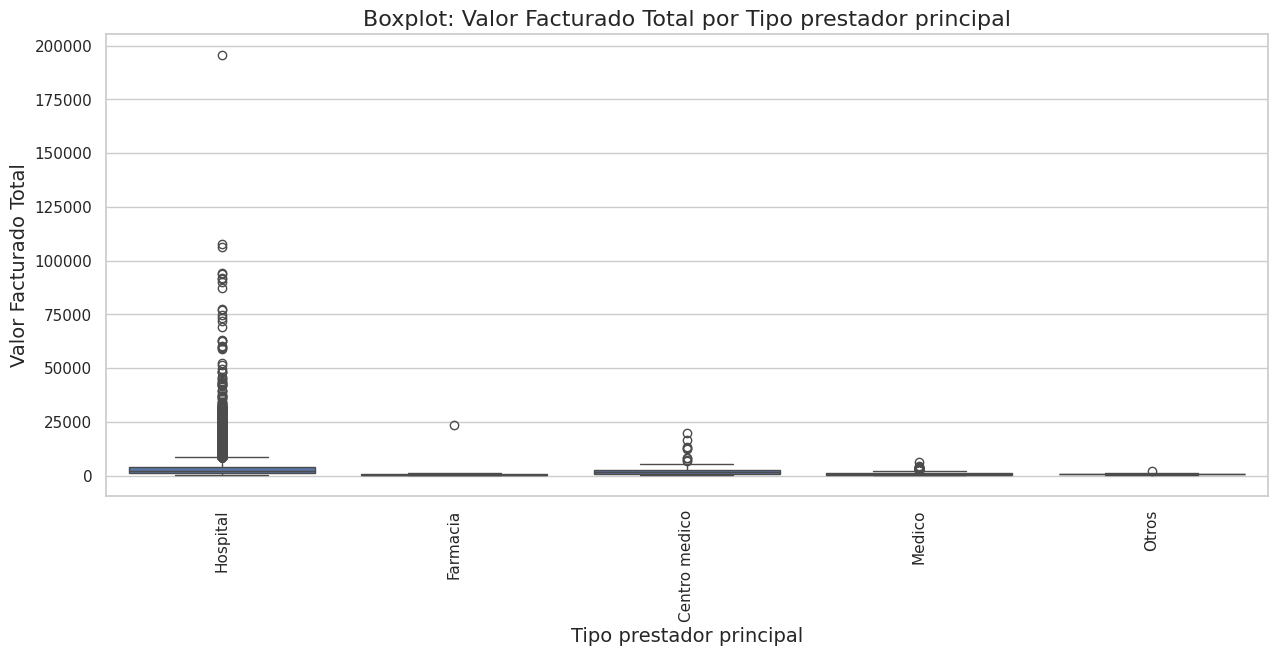

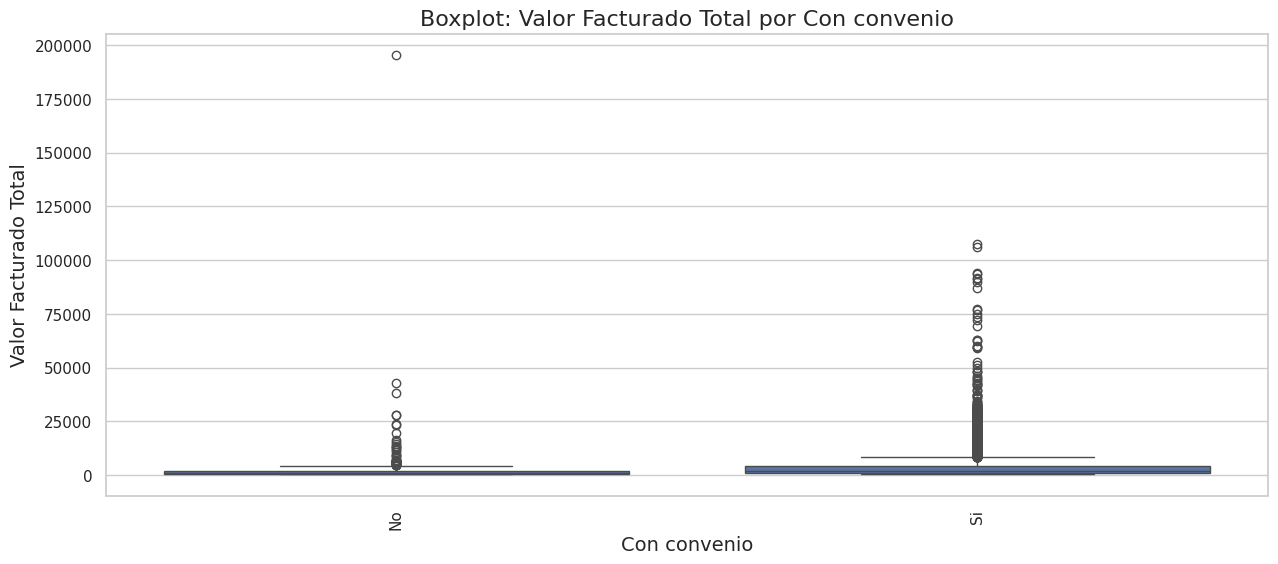

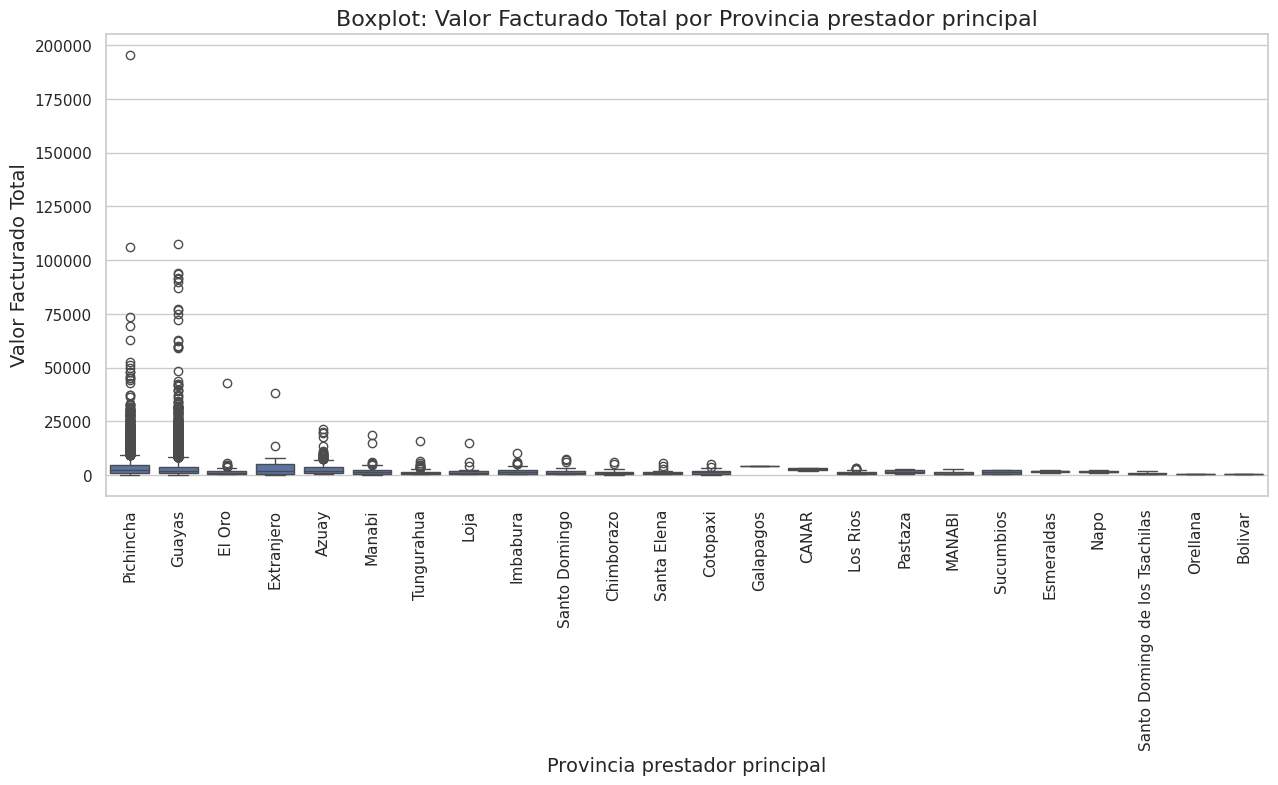

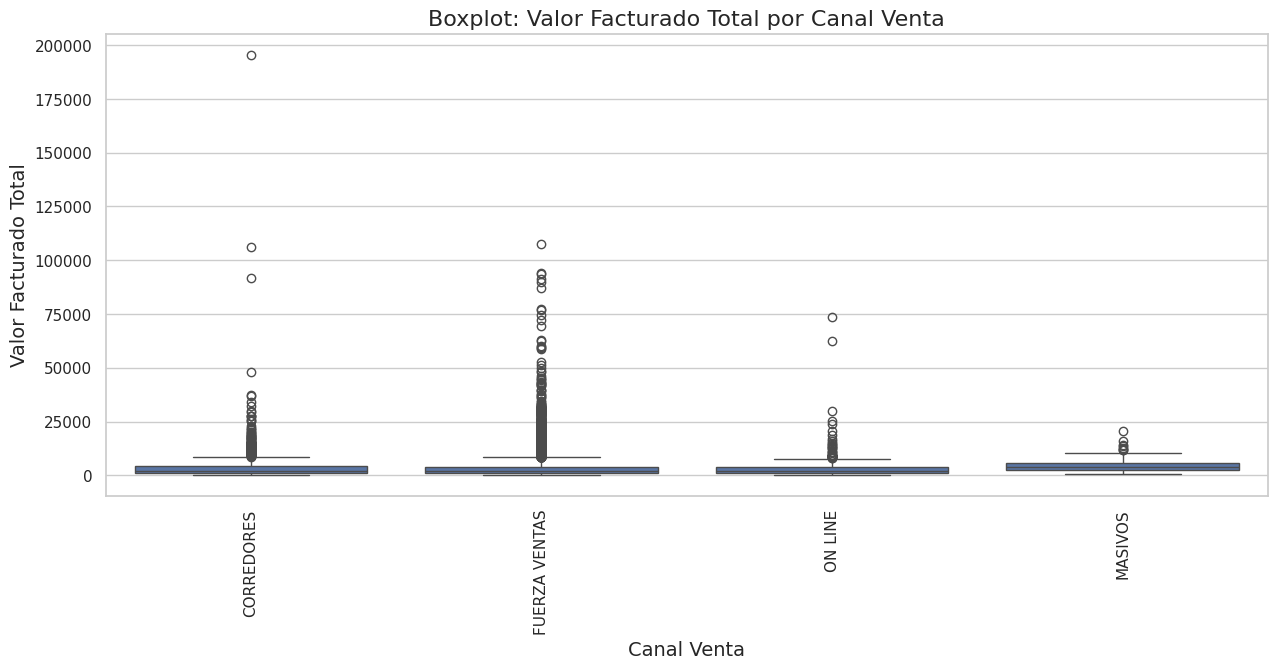

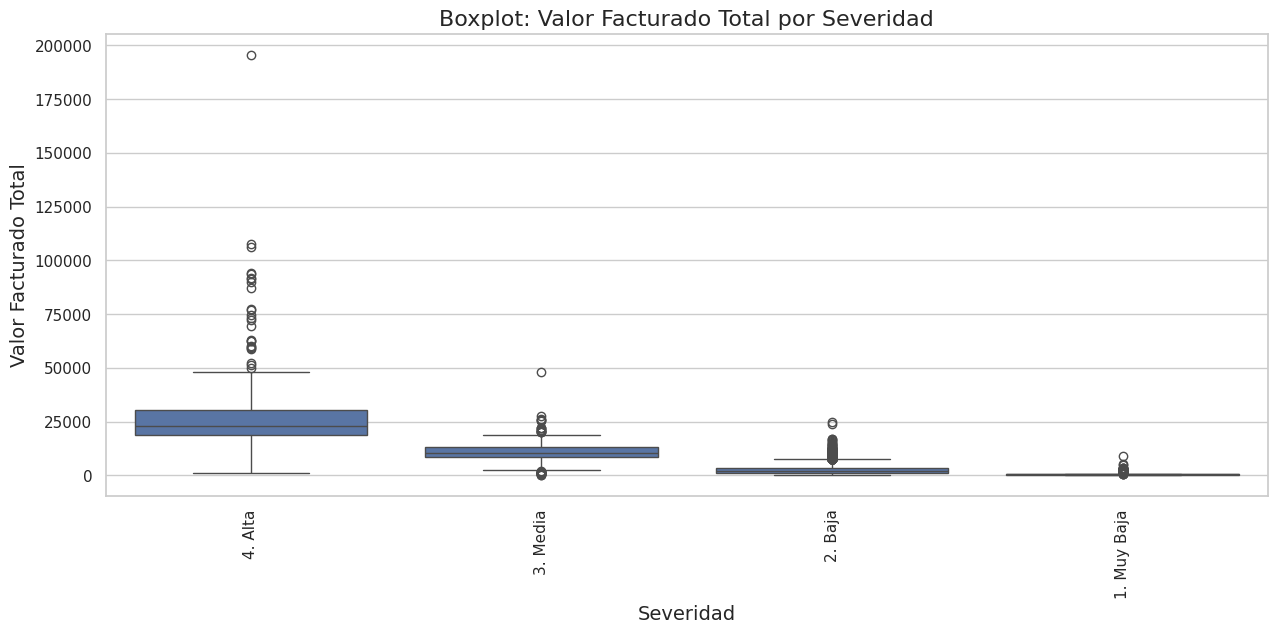

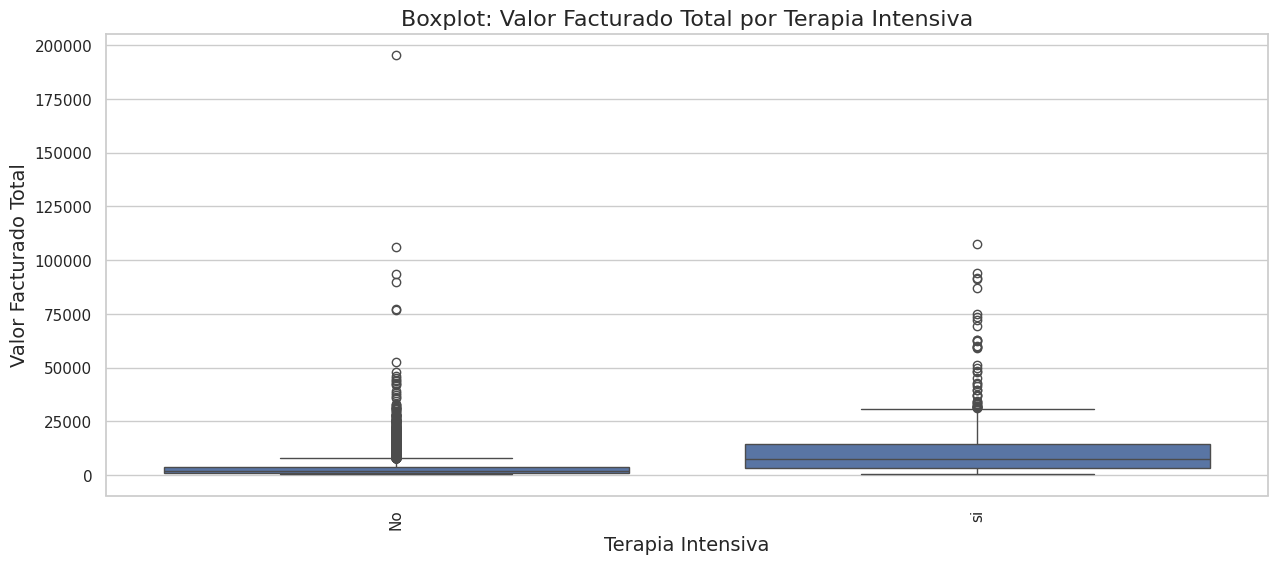

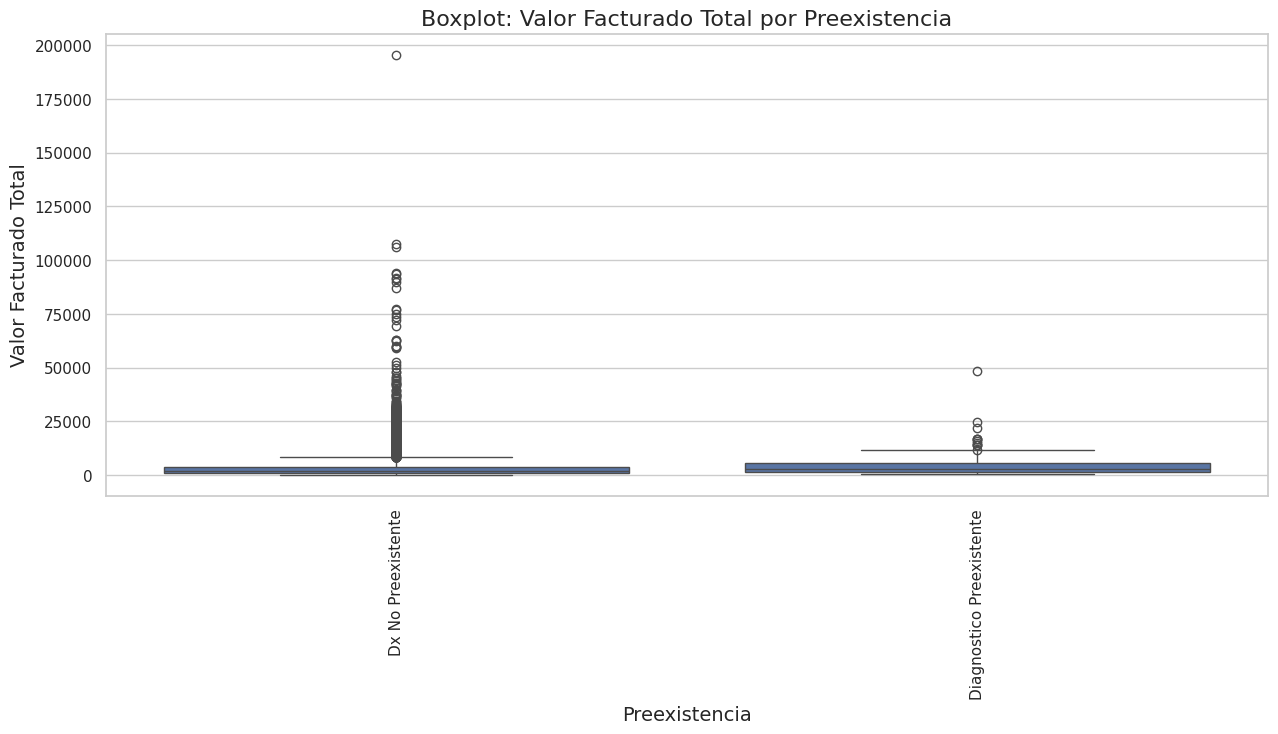

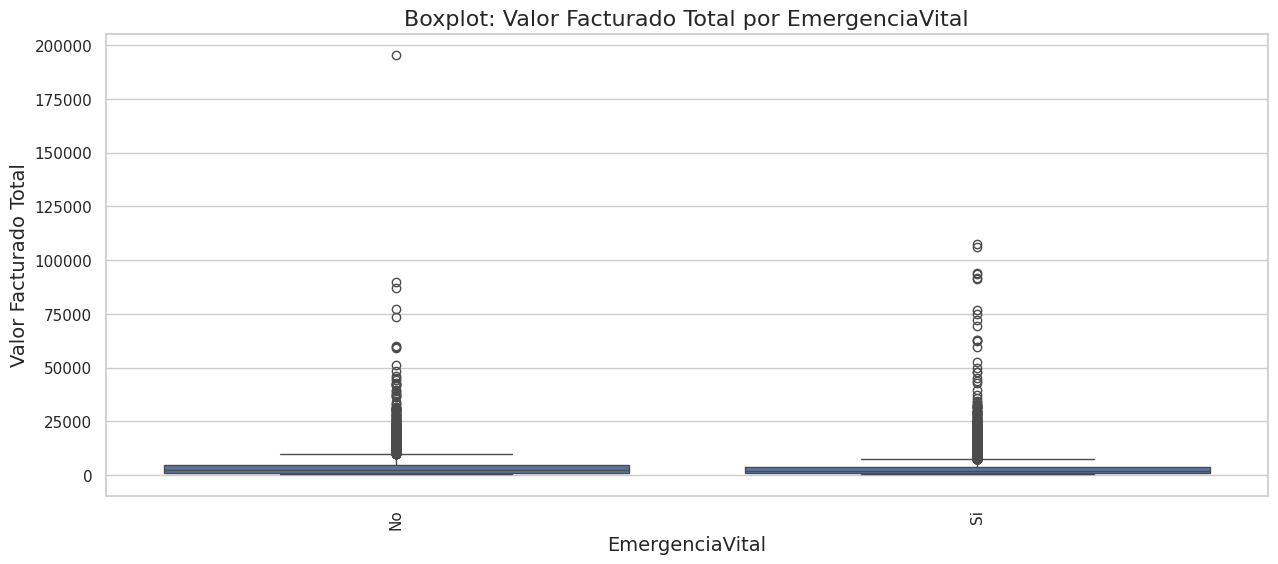

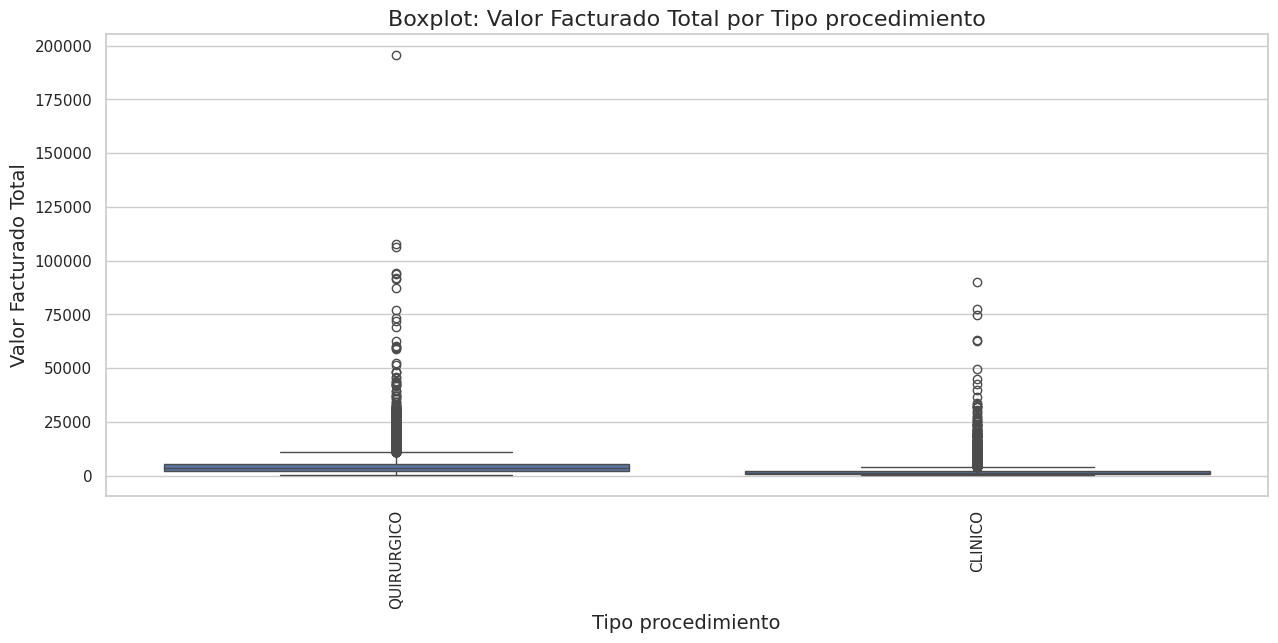

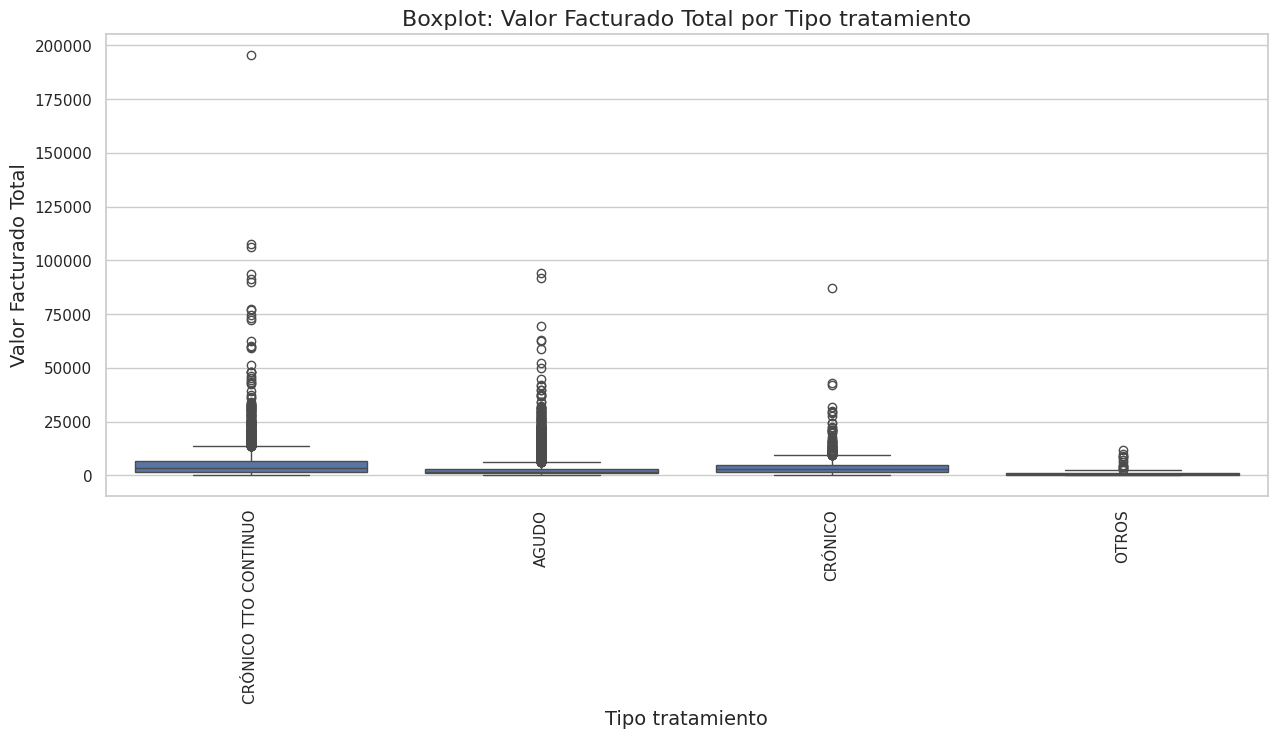

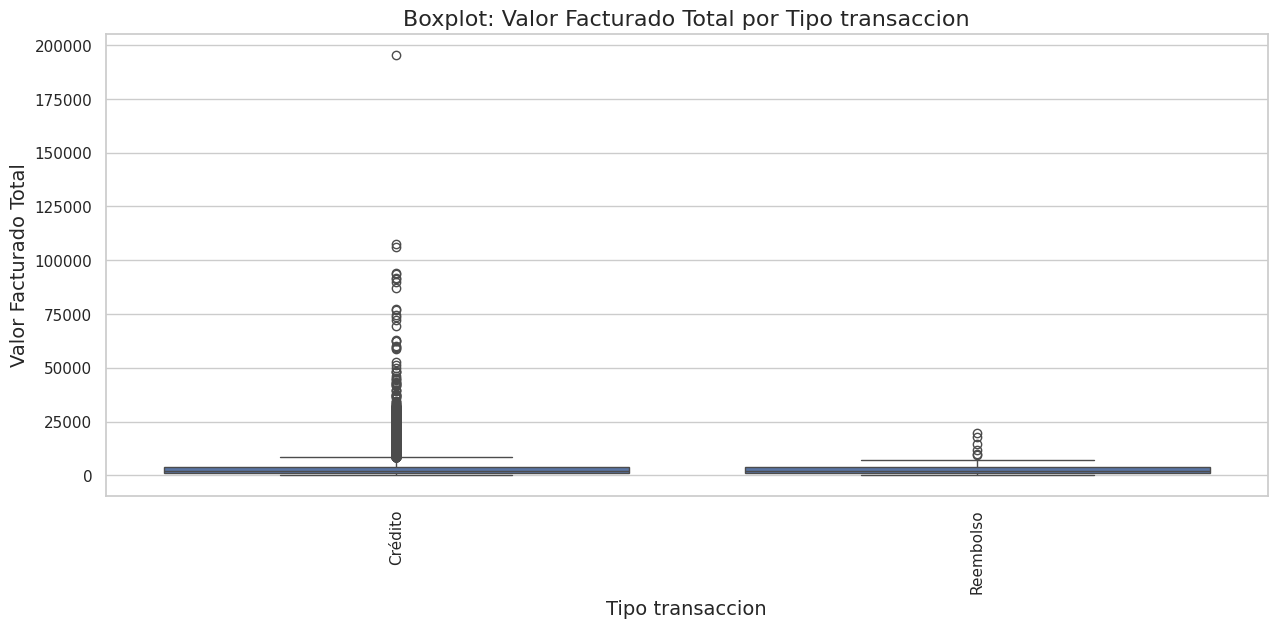

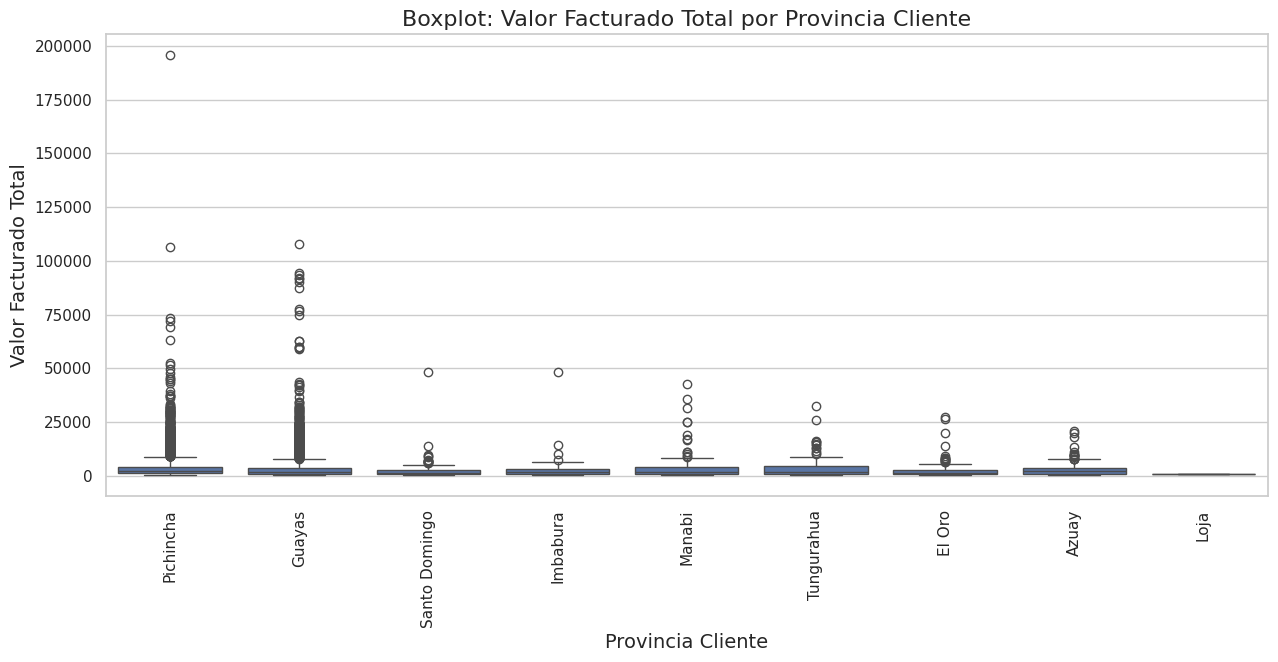

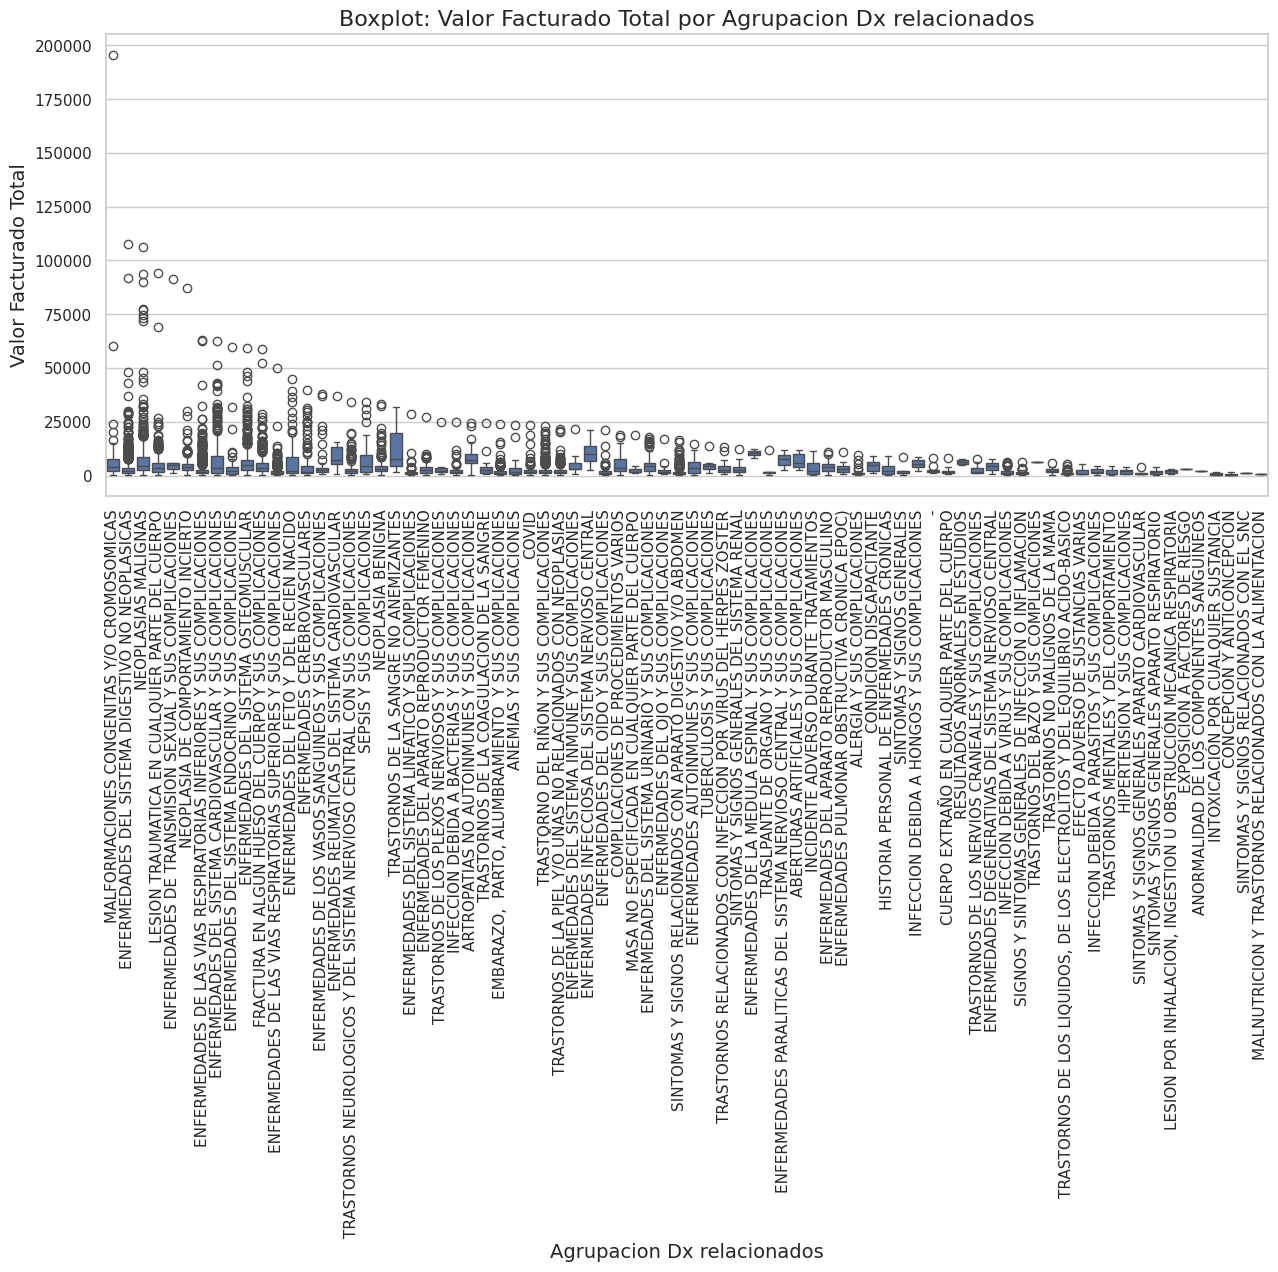

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir las variables categóricas con menos de 50 clases
categorical_vars = [
    'Grupo Etario', 'Genero', 'Producto', 'Tipo prestador principal',
    'Con convenio', 'Provincia prestador principal', 'Canal Venta',
    'Severidad', 'Terapia Intensiva', 'Preexistencia', 'EmergenciaVital',
    'Tipo procedimiento', 'Tipo tratamiento', 'Tipo transaccion', 'Provincia Cliente'
]

# Agregar la variable 'Agrupacion Dx relacionados' a la lista de variables categóricas
categorical_vars.append('Agrupacion Dx relacionados')

# Iterar sobre cada variable categórica y generar un gráfico de caja
for var in categorical_vars:
    # Crear un DataFrame con las columnas 'Valor facturado total' y la variable categórica actual
    data = pd.concat([df_final_filtered['Valor facturado total'], df_final_filtered[var]], axis=1)

    # Crear el gráfico de caja (boxplot)
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=var, y="Valor facturado total", data=data)
    plt.title(f'Boxplot: Valor Facturado Total por {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Valor Facturado Total', fontsize=14)
    plt.xticks(rotation=90)
    plt.show()


In [42]:


# Agrupar por 'Agrupacion Dx relacionados' y calcular los percentiles
percentiles_por_grupo = df_final_filtered.groupby('Agrupacion Dx relacionados')['Valor facturado total'].quantile([0.25, 0.5, 0.75]).unstack()

# Calcular el IQR por grupo
Q1_grupo = percentiles_por_grupo[0.25]
Q3_grupo = percentiles_por_grupo[0.75]
IQR_grupo = Q3_grupo - Q1_grupo

# Determinar los límites superior e inferior por grupo
limite_inferior_grupo = Q1_grupo - 1.5 * IQR_grupo
limite_superior_grupo = Q3_grupo + 1.5 * IQR_grupo

# Crear un DataFrame con los resultados
limites_df = pd.DataFrame({
    'Q1': Q1_grupo,
    'Q3': Q3_grupo,
    'IQR': IQR_grupo,
    'Límite inferior': limite_inferior_grupo,
    'Límite superior': limite_superior_grupo
})

# Mostrar los límites por grupo
print("Límites para cada variación de 'Agrupacion Dx relacionados':")
print(limites_df.head(30))

# Función para eliminar outliers basada en los límites por grupo
def eliminar_outliers(df):
    grupo = df.name
    lower = limites_df.loc[grupo, 'Límite inferior']
    upper = limites_df.loc[grupo, 'Límite superior']
    return df[(df['Valor facturado total'] >= lower) & (df['Valor facturado total'] <= upper)]

# Aplicar la función a cada grupo de 'Agrupacion Dx relacionados'
df_final_filtered_sin_outliers = df_final_filtered.groupby('Agrupacion Dx relacionados').apply(eliminar_outliers).reset_index(drop=True)




Límites para cada variación de 'Agrupacion Dx relacionados':
                                                           Q1          Q3  \
Agrupacion Dx relacionados                                                  
-                                                   1706.4425   2766.1500   
ABERTURAS ARTIFICIALES Y SUS COMPLICACIONES         3861.7200  10131.4100   
ALERGIA Y SUS COMPLICACIONES                         551.0000   1272.5900   
ANEMIAS Y SUS COMPLICACIONES                         767.7750   3539.6450   
ANORMALIDAD DE LOS COMPONENTES SANGUÍNEOS           2147.5000   2147.5000   
ARTROPATIAS NO AUTOINMUNES Y SUS COMPLICACIONES     5893.9500   9825.9050   
COMPLICACIONES DE PROCEDIMIENTOS VARIOS             2012.1500   7796.3700   
CONCEPCION Y ANTICONCEPCION                          338.7900    778.3700   
CONDICION DISCAPACITANTE                            1957.8550   6238.4800   
COVID                                               1153.9900   2574.7600   
CUERPO EXTRAÑO 

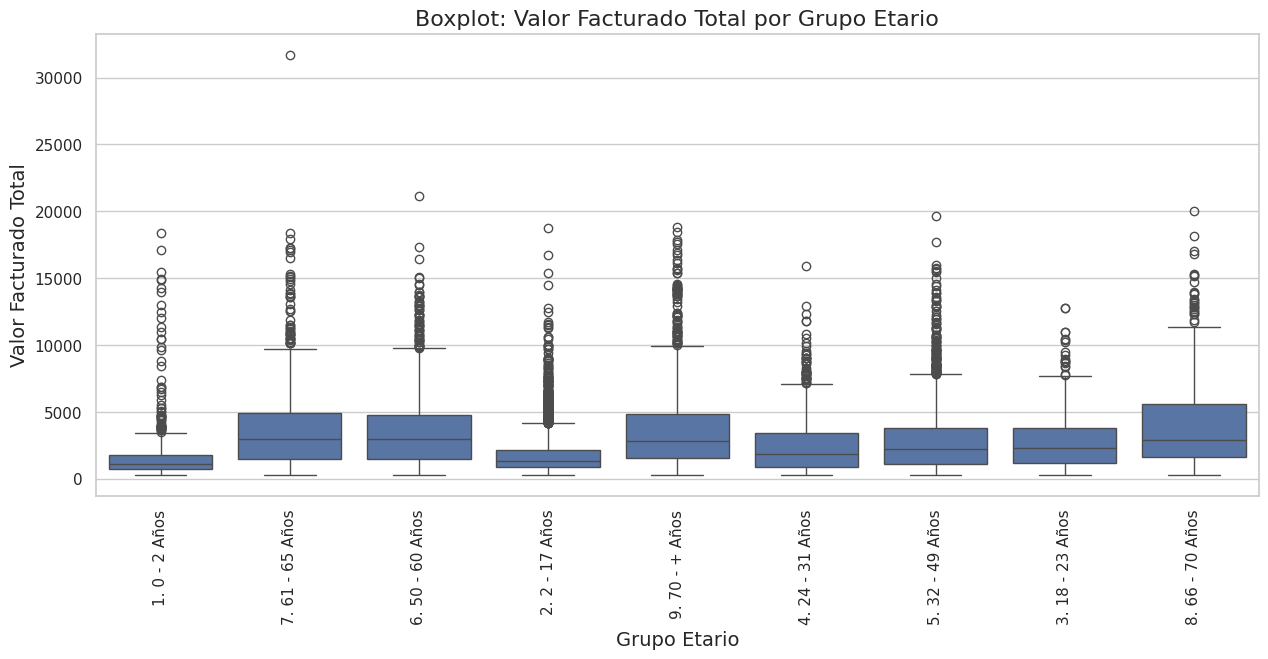

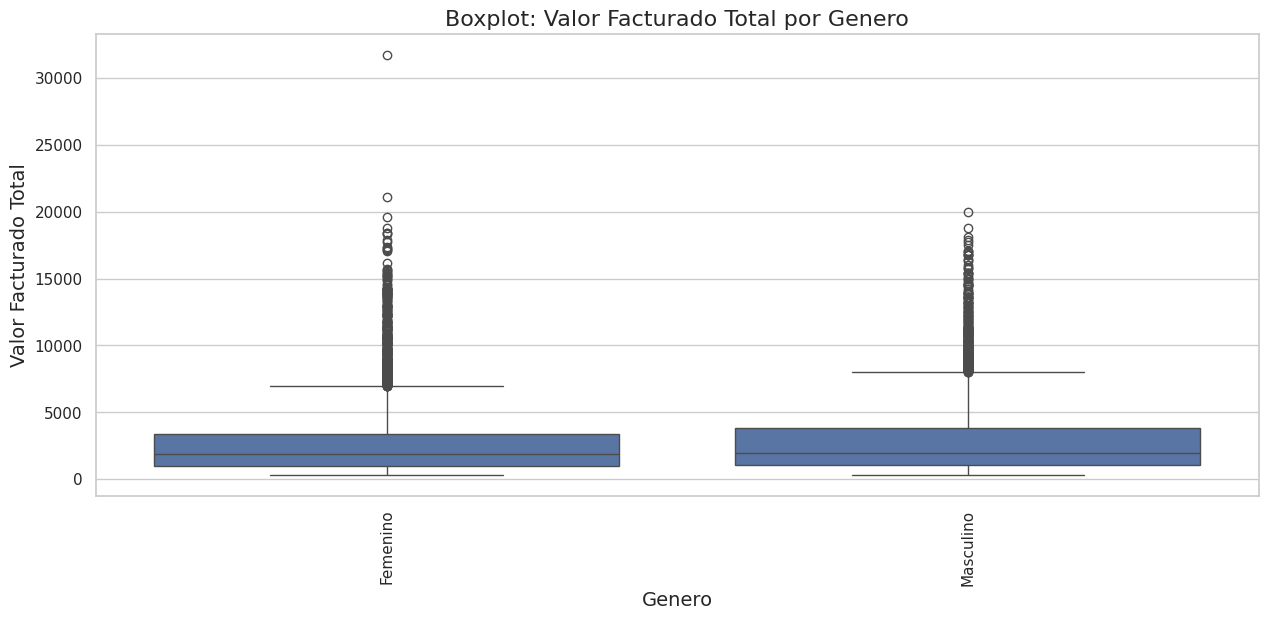

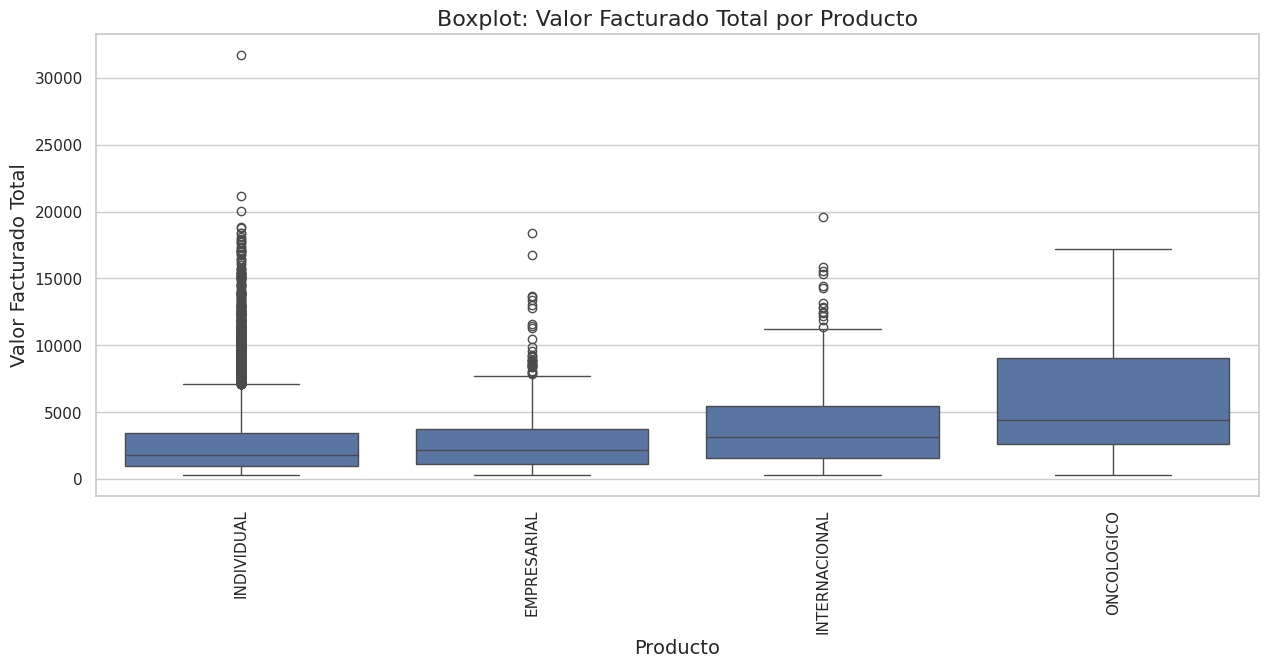

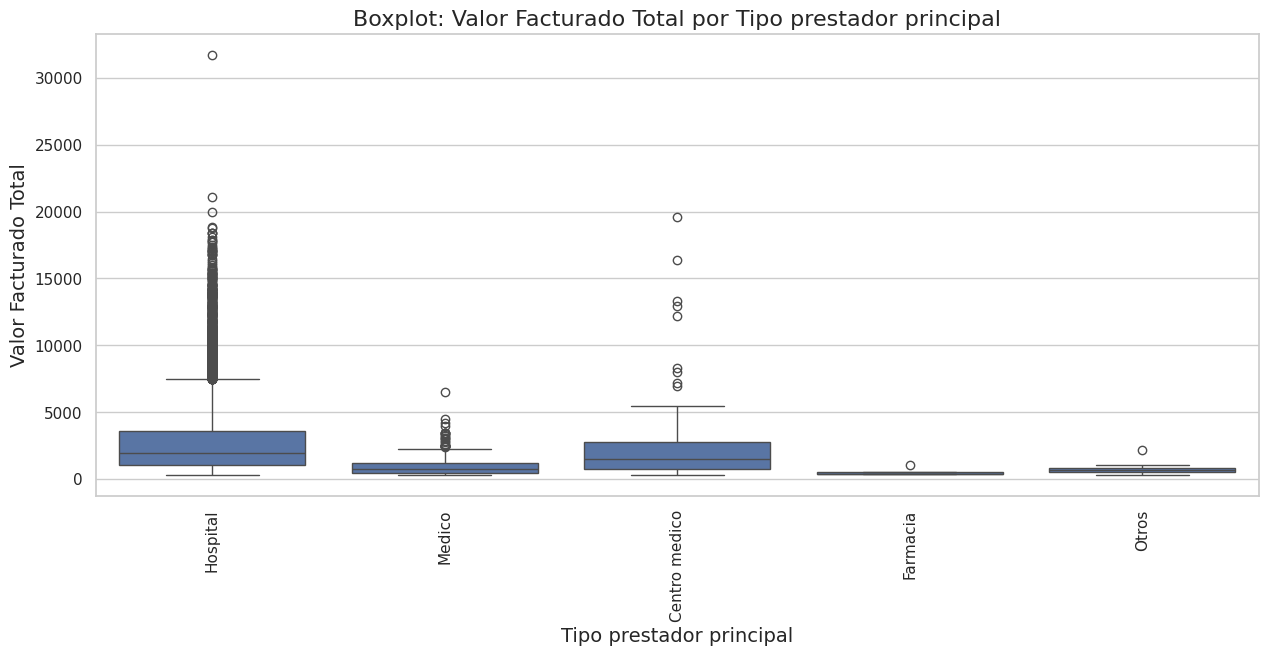

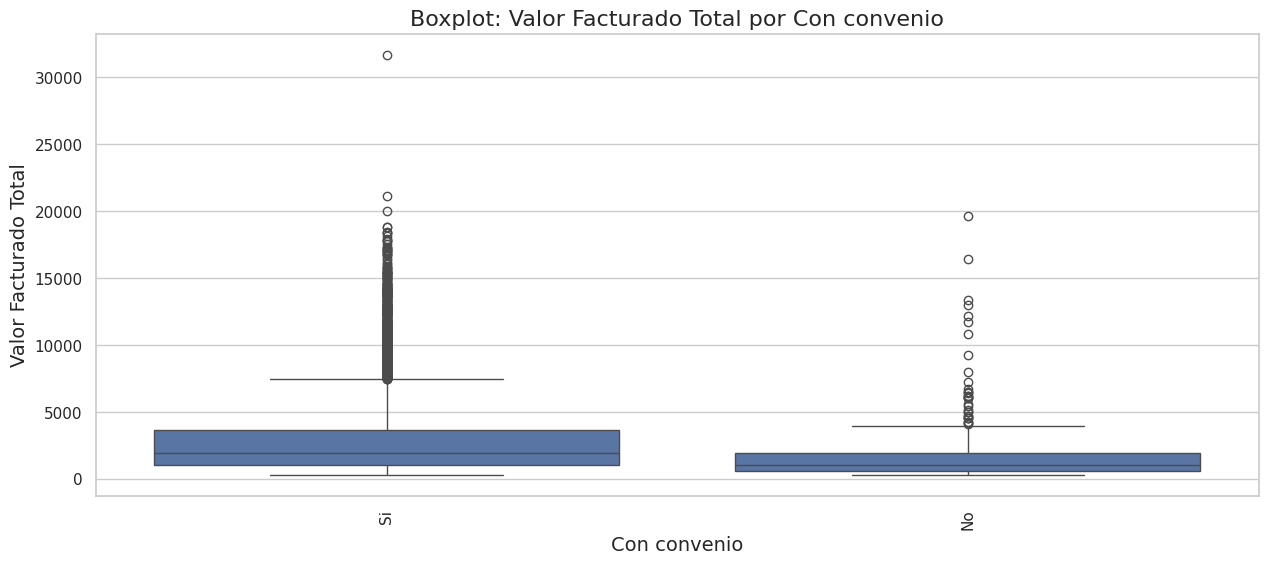

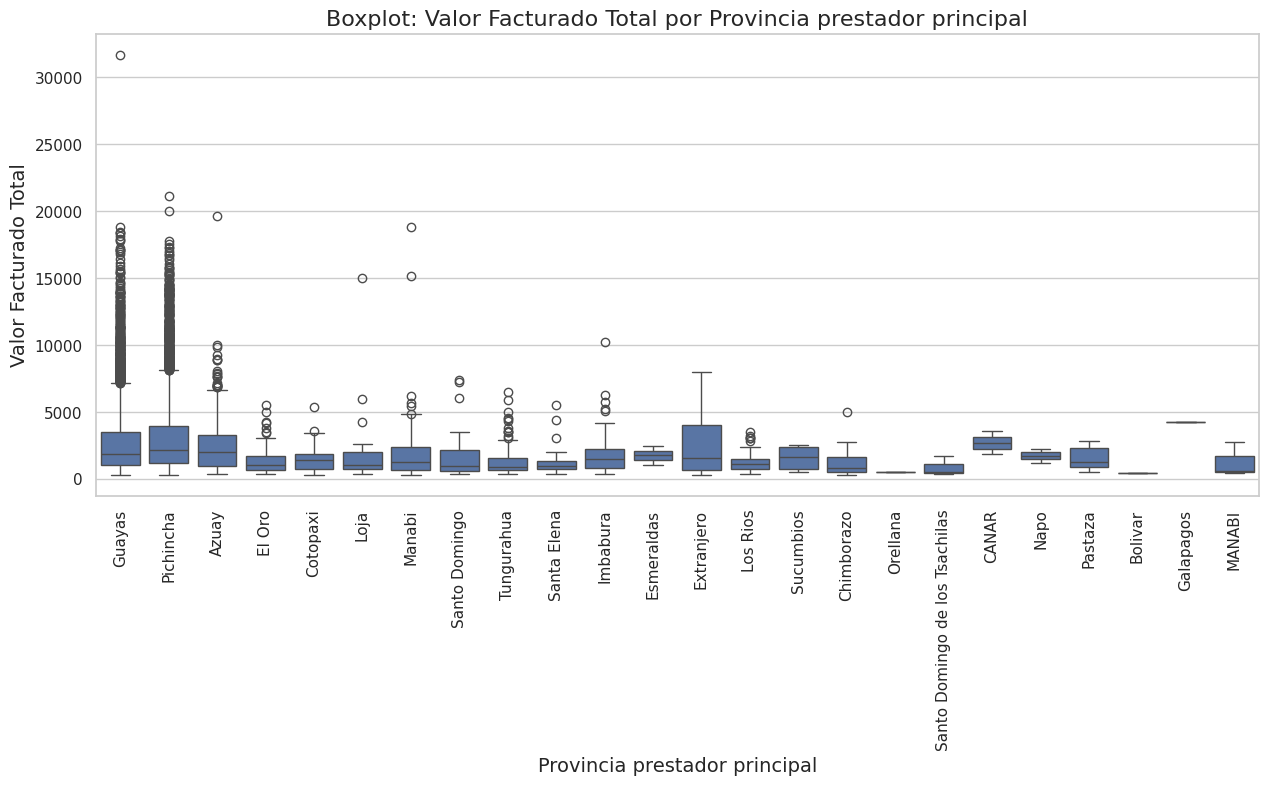

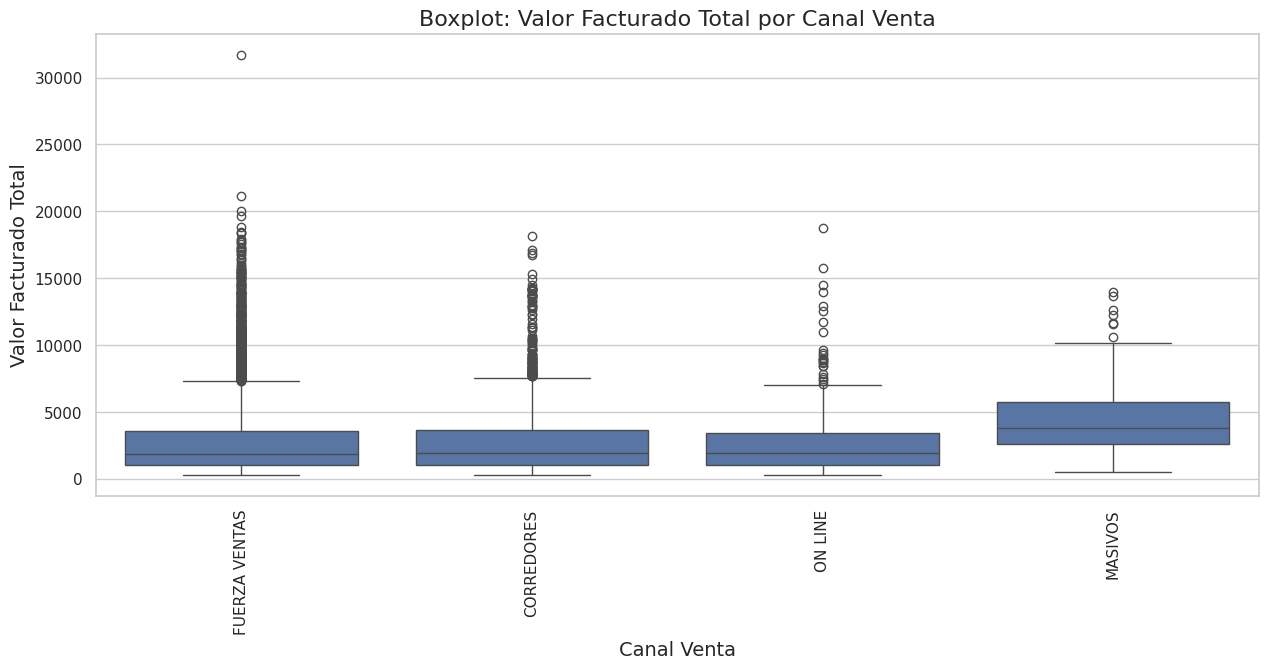

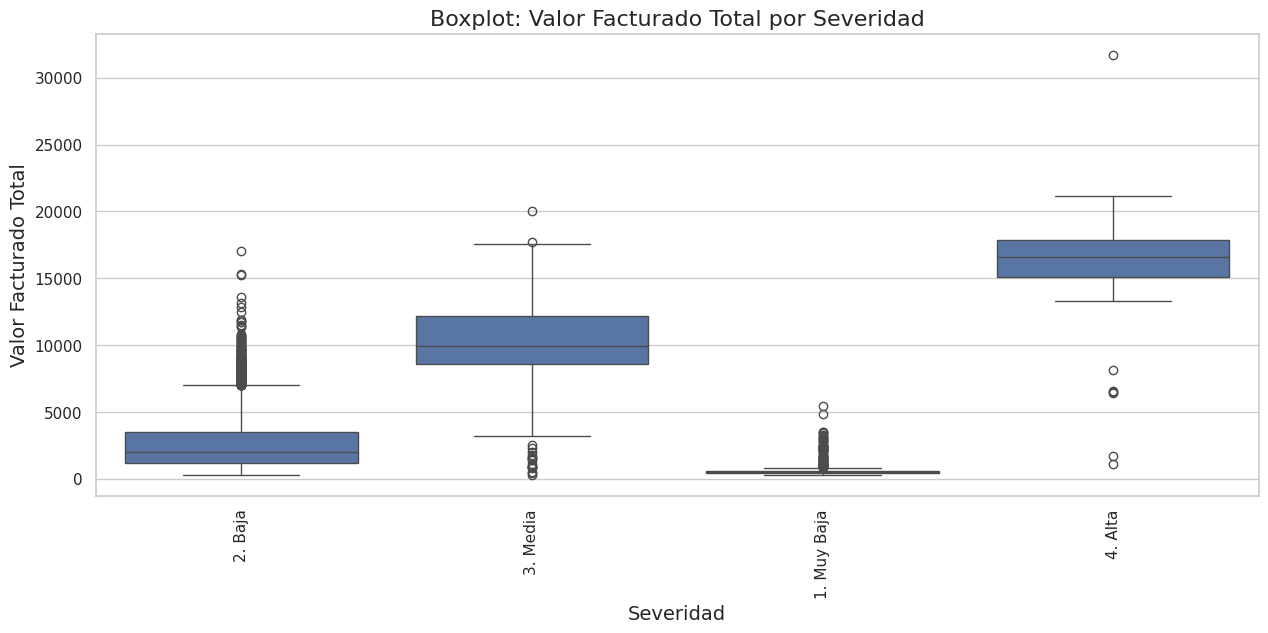

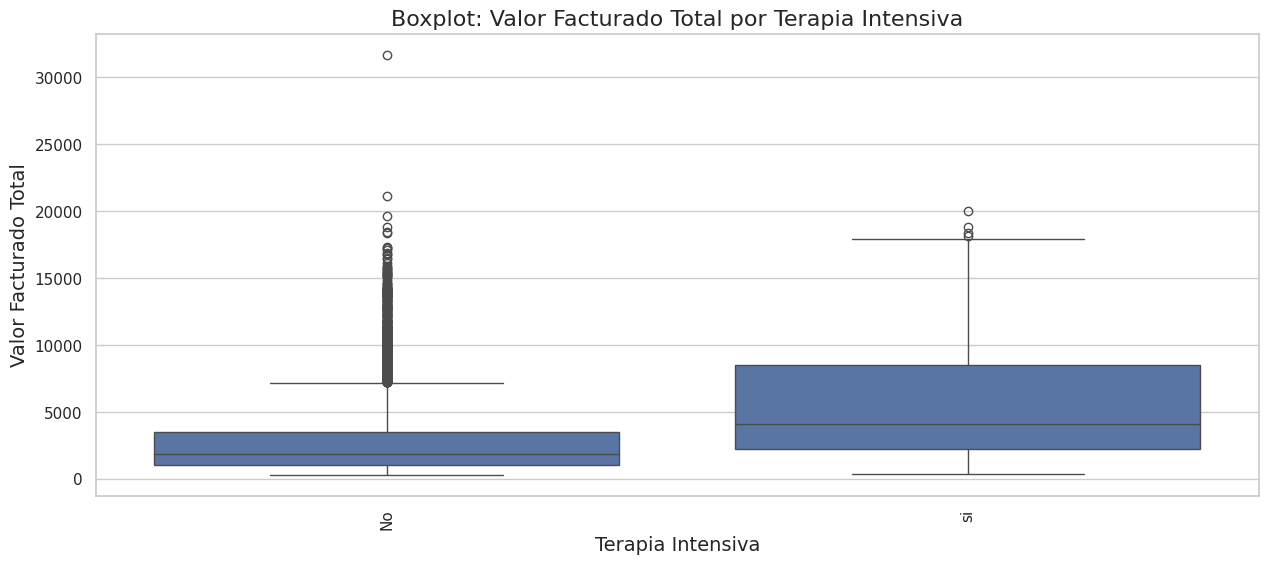

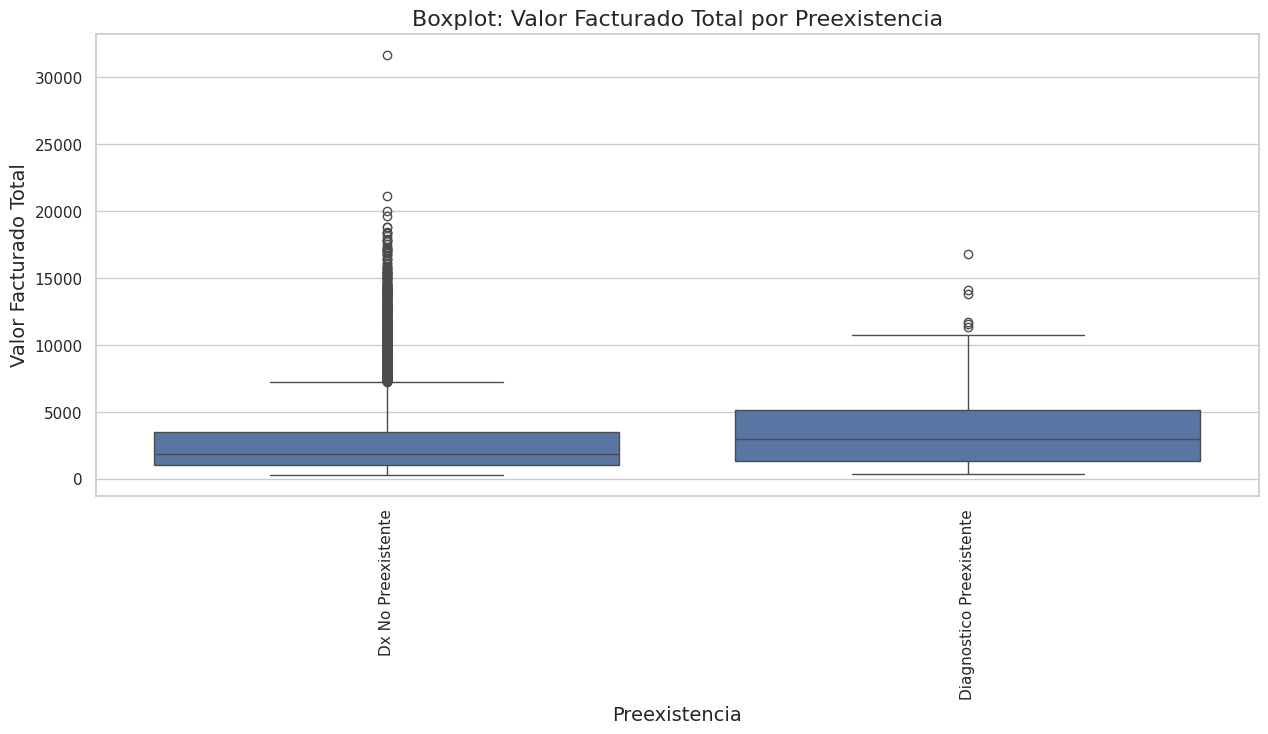

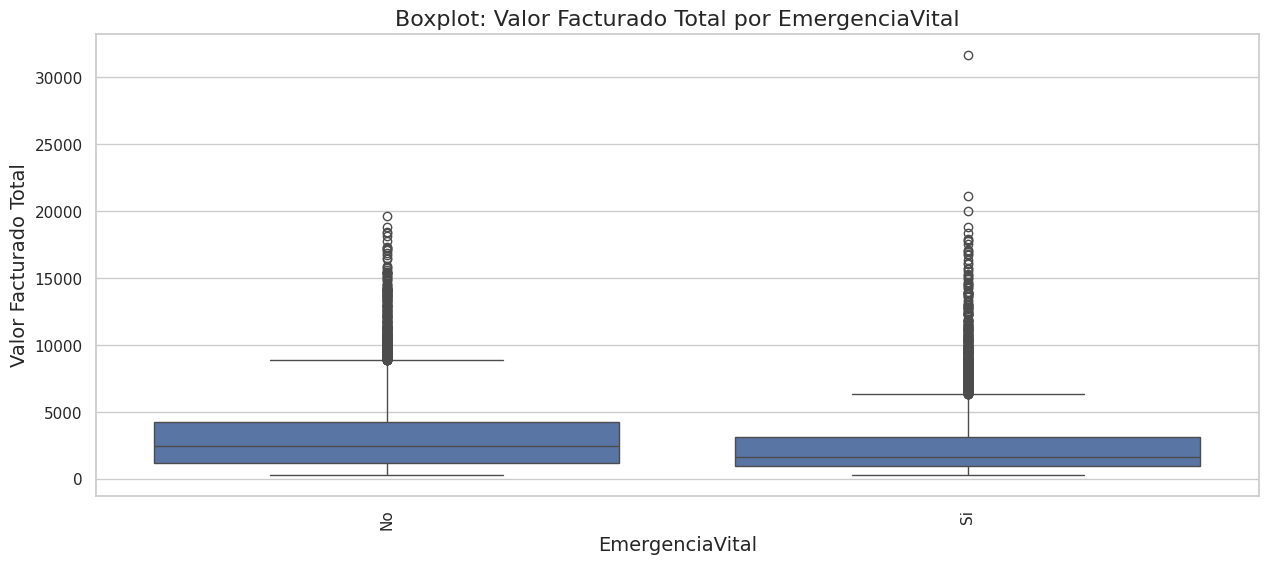

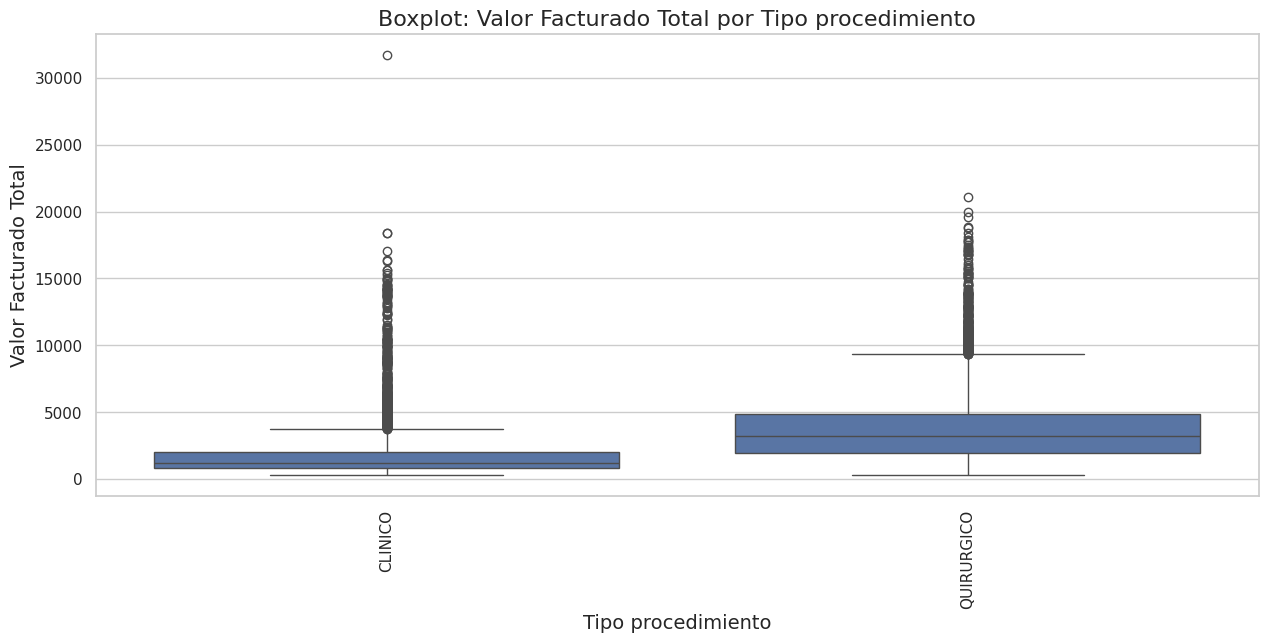

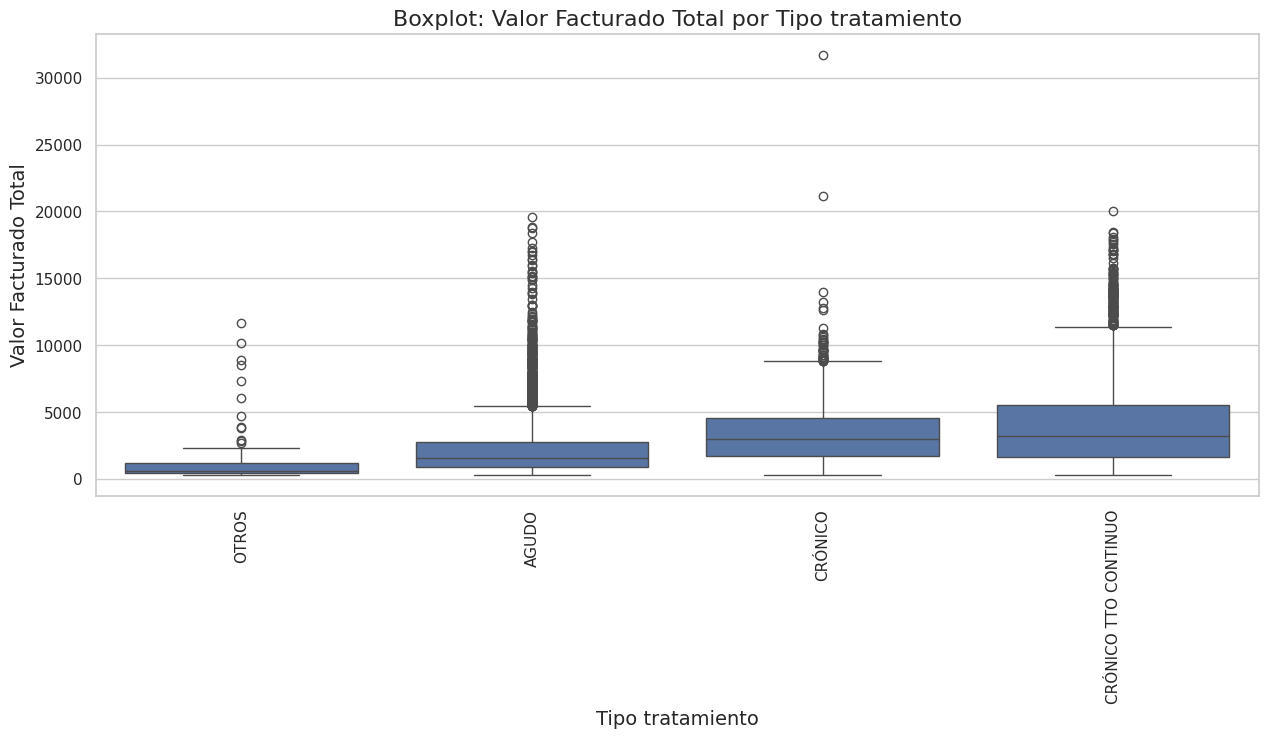

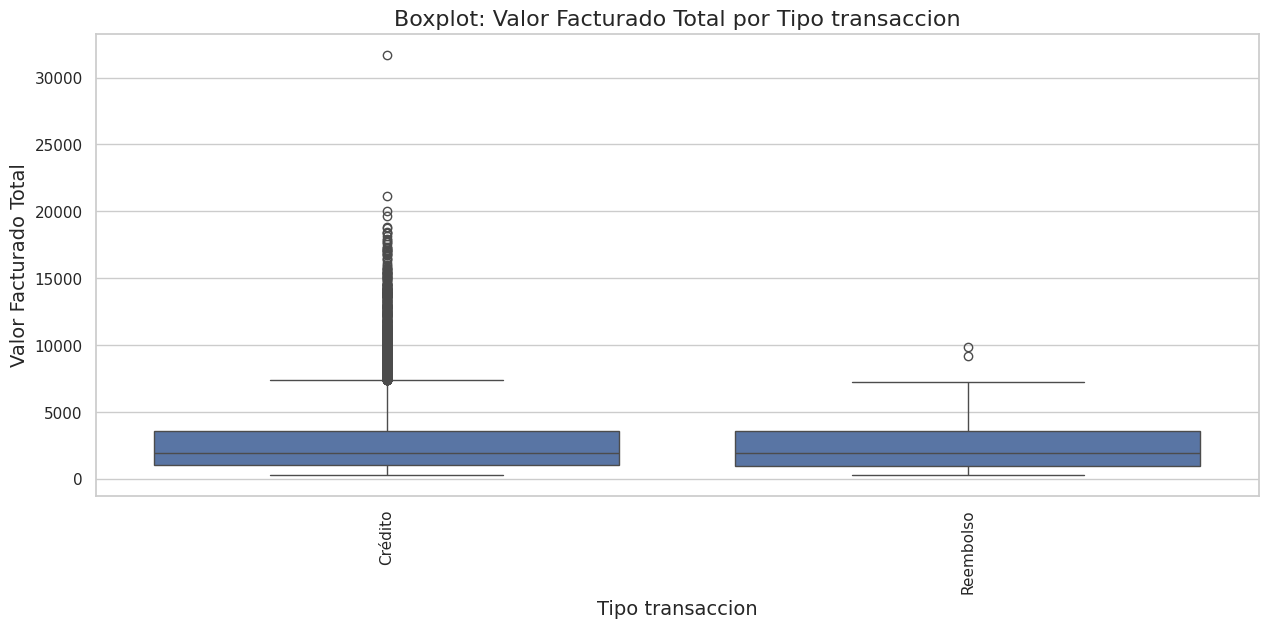

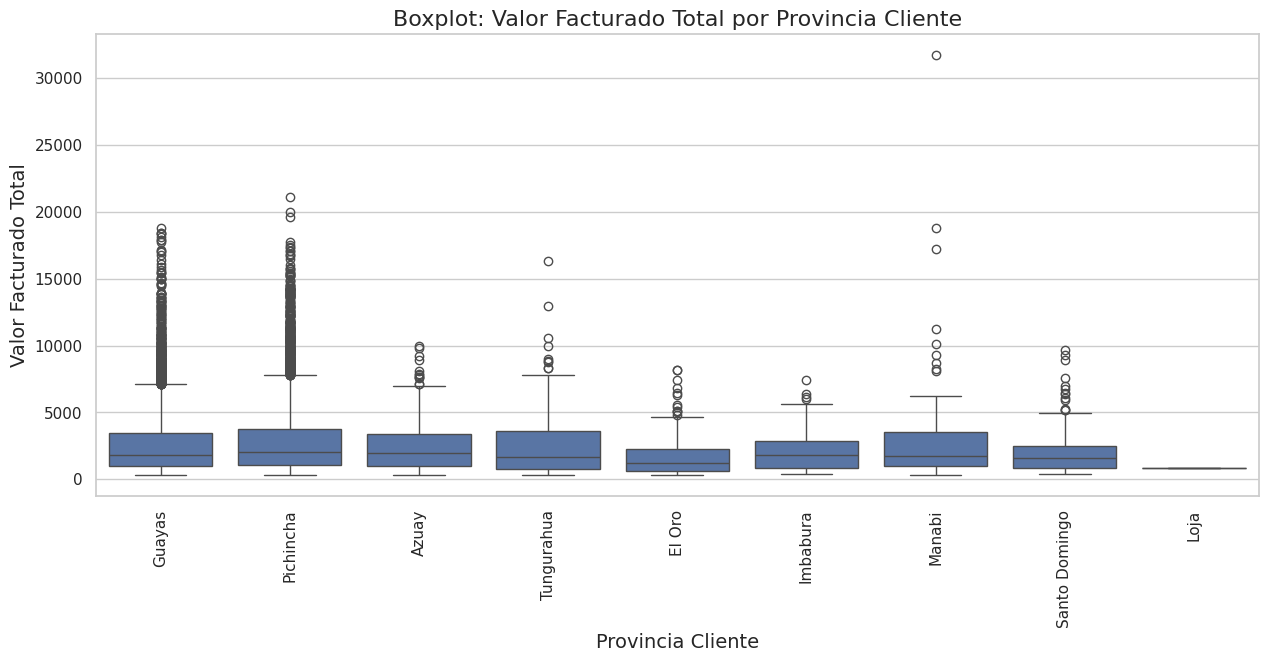

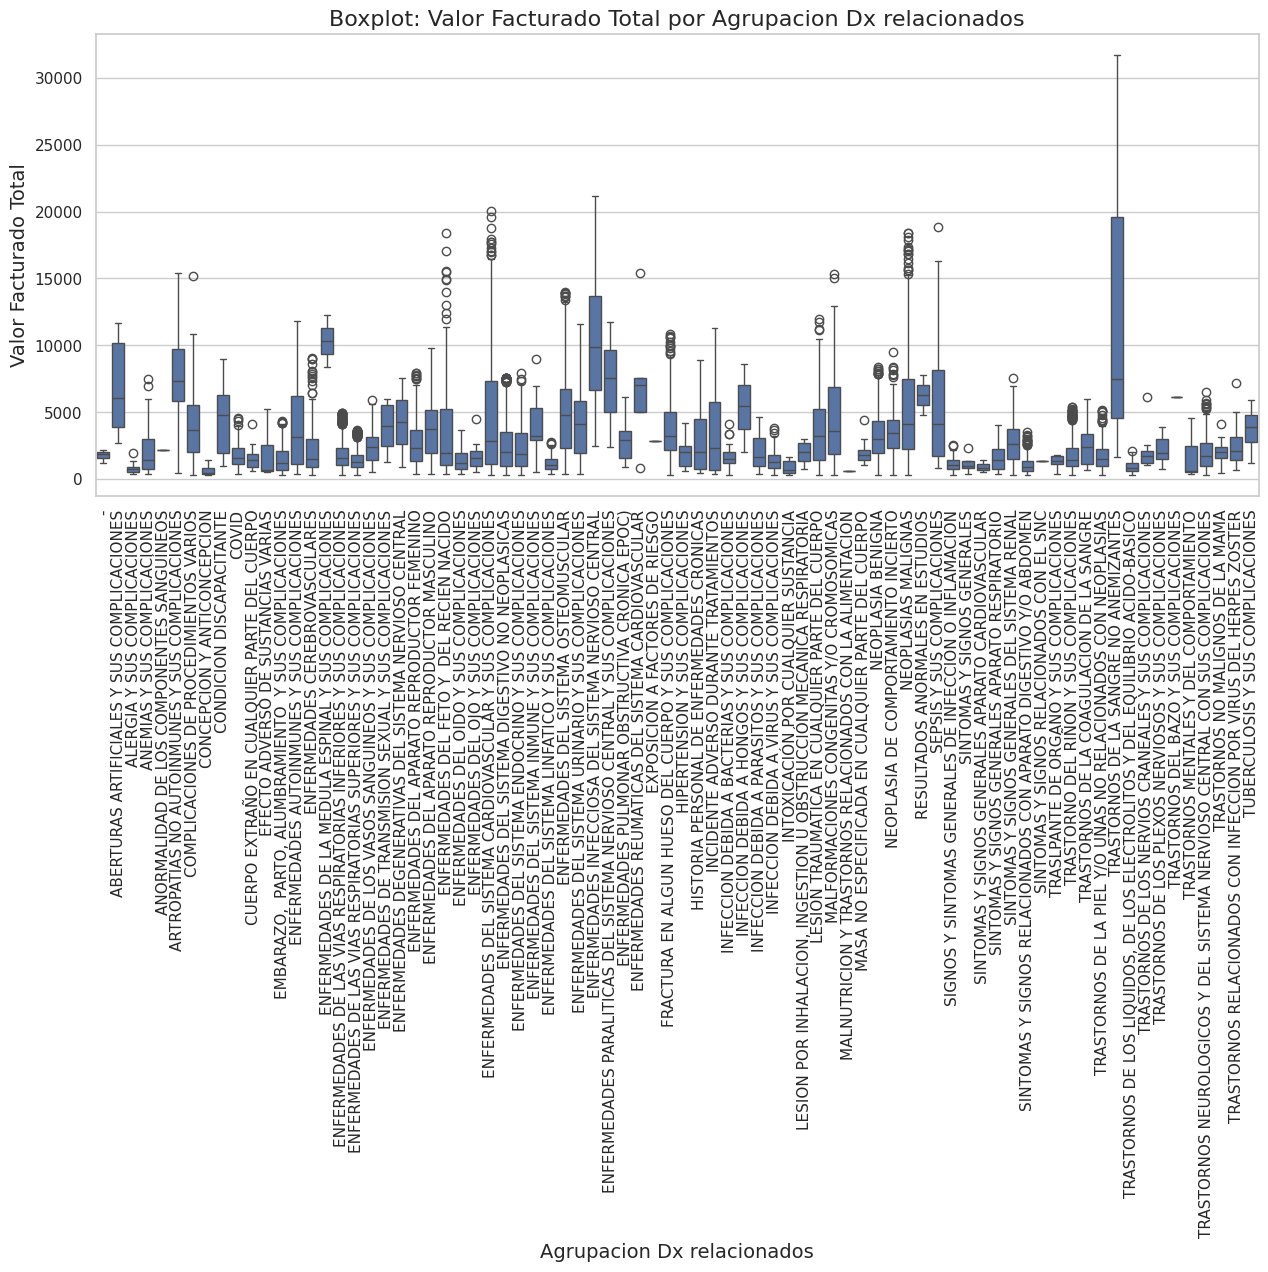

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir las variables categóricas con menos de 50 clases
categorical_vars = [
    'Grupo Etario', 'Genero', 'Producto', 'Tipo prestador principal',
    'Con convenio', 'Provincia prestador principal', 'Canal Venta',
    'Severidad', 'Terapia Intensiva', 'Preexistencia', 'EmergenciaVital',
    'Tipo procedimiento', 'Tipo tratamiento', 'Tipo transaccion', 'Provincia Cliente'
]

# Agregar la variable 'Agrupacion Dx relacionados' a la lista de variables categóricas
categorical_vars.append('Agrupacion Dx relacionados')

# Iterar sobre cada variable categórica y generar un gráfico de caja
for var in categorical_vars:
    # Crear un DataFrame con las columnas 'Valor facturado total' y la variable categórica actual
    data = pd.concat([df_final_filtered_sin_outliers['Valor facturado total'], df_final_filtered_sin_outliers[var]], axis=1)

    # Crear el gráfico de caja (boxplot)
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=var, y="Valor facturado total", data=data)
    plt.title(f'Boxplot: Valor Facturado Total por {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Valor Facturado Total', fontsize=14)
    plt.xticks(rotation=90)
    plt.show()



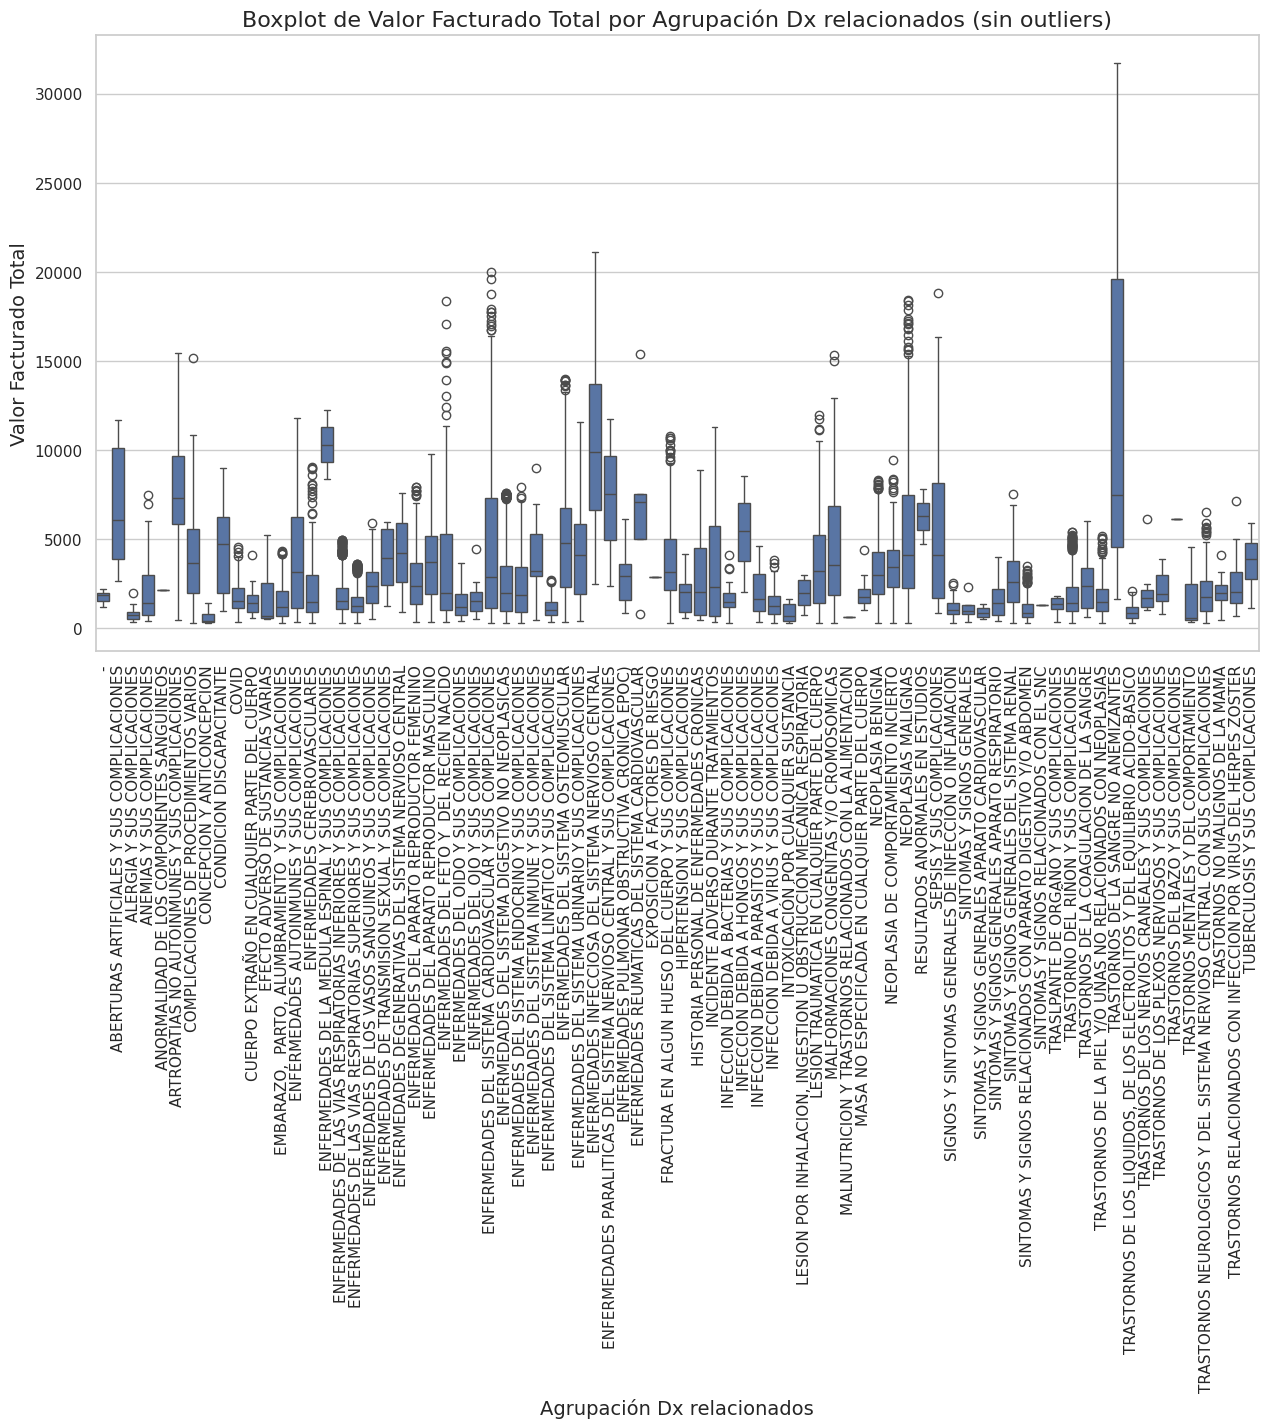

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Agrupacion Dx relacionados', y='Valor facturado total', data=df_final_filtered_sin_outliers)
plt.title('Boxplot de Valor Facturado Total por Agrupación Dx relacionados (sin outliers)', fontsize=16)
plt.xlabel('Agrupación Dx relacionados', fontsize=14)
plt.ylabel('Valor Facturado Total', fontsize=14)
plt.xticks(rotation=90)
plt.show()

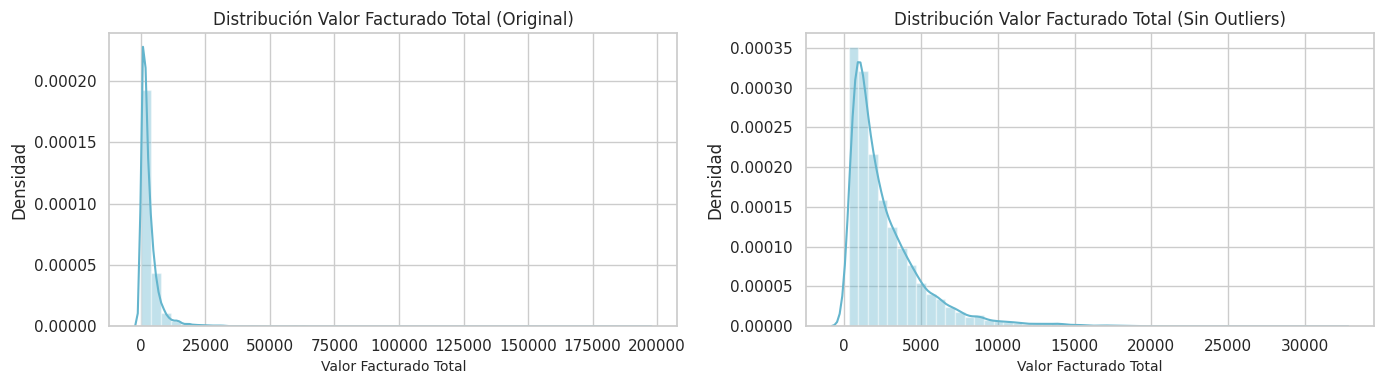

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de seaborn
sns.set(style='whitegrid')

# Crear figuras y ejes para los subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Graficar la distribución de Valor facturado total en el DataFrame original (df_final)
sns.distplot(df_final['Valor facturado total'], kde=True, color='c', ax=axes[0])
axes[0].set_title('Distribución Valor Facturado Total (Original)')
axes[0].set_xlabel('Valor Facturado Total', fontsize=10)  # Ajustar tamaño de la etiqueta x
axes[0].set_ylabel('Densidad')

# Graficar la distribución de Valor facturado total en el DataFrame sin outliers (df_final_filtered_sin_outliers)
sns.distplot(df_final_filtered_sin_outliers['Valor facturado total'], kde=True, color='c', ax=axes[1])
axes[1].set_title('Distribución Valor Facturado Total (Sin Outliers)')
axes[1].set_xlabel('Valor Facturado Total', fontsize=10)  # Ajustar tamaño de la etiqueta x
axes[1].set_ylabel('Densidad')

# Ajustar el diseño general de la figura
plt.tight_layout()
plt.show()



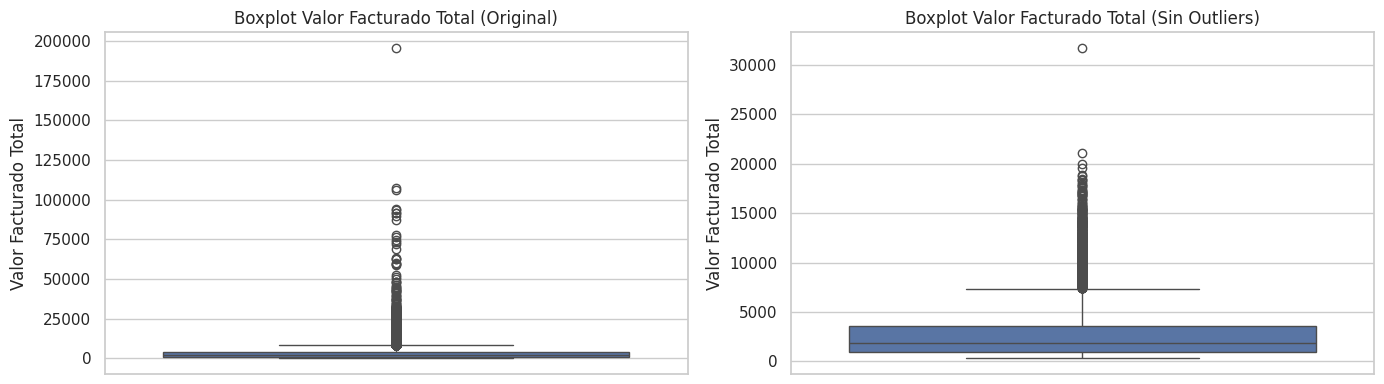

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de seaborn
sns.set(style='whitegrid')

# Crear figuras y ejes para los subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Boxplot del DataFrame original (df_final)
sns.boxplot(y='Valor facturado total', data=df_final, ax=axes[0])
axes[0].set_title('Boxplot Valor Facturado Total (Original)')
axes[0].set_ylabel('Valor Facturado Total')

# Boxplot del DataFrame sin outliers (df_final_filtered_sin_outliers)
sns.boxplot(y='Valor facturado total', data=df_final_filtered_sin_outliers, ax=axes[1])
axes[1].set_title('Boxplot Valor Facturado Total (Sin Outliers)')
axes[1].set_ylabel('Valor Facturado Total')

# Ajustar el diseño general de la figura
plt.tight_layout()
plt.show()


In [47]:
# Listar las variables presentes en el DataFrame df_final_filtered_sin_outliers
variables_presentes = df_final_filtered_sin_outliers.columns.tolist()

# Mostrar el listado de variables
variables_presentes

['IdCaso',
 'Fecha Incurrencia',
 'Fecha inicio vigencia',
 'Antigüedad cliente meses',
 'Codigo paciente',
 'Edad Paciente',
 'Grupo Etario',
 'Genero',
 'Provincia Cliente',
 'Producto',
 'Codigo prestador principal',
 'Tipo prestador principal',
 'Con convenio',
 'Provincia prestador principal',
 'Tipo reclamo',
 'Dias hospitalizacion',
 'Nivel contrato',
 'Canal Venta',
 'Severidad',
 'Codigo Diagnostico',
 'Codigo dx primario',
 'Dx Primario',
 'Dx Final',
 'Familia dx relacionados',
 'Agrupacion Dx relacionados',
 'Terapia Intensiva',
 'Preexistencia',
 'EmergenciaVital',
 'lugar-atencion',
 'Tipo procedimiento',
 'Tipo tratamiento',
 'Tipo transaccion',
 'HONORARIOS MEDICOS',
 'INSUMOS Y SUMINISTROS',
 'LABORATORIOS',
 'MEDICINAS',
 'OTROS',
 'PROTESIS',
 'SERVICIOS HOSPITALARIOS',
 'TERAPIA INTENSIVA',
 'Valor facturado total',
 'Valor cubierto total',
 'Valor pagado total',
 'Año-Mes']

**Normalizamos las clases de variables categóricas que tienen pocos datos**

In [48]:


# Suponiendo que df_nuevo es tu DataFrame original
df_nuevo = df_final_filtered_sin_outliers.copy()

# Función para categorizar las provincias
def categorize_province(province):
    if province in ['Pichincha', 'Guayas']:
        return province
    else:
        return 'Otros'

# Función para categorizar los productos
def categorize_product(product):
    if product == 'INDIVIDUAL':
        return product
    else:
        return 'Otros'

# Función para categorizar tipo de prestador
def categorize_provider(provider):
    if provider == 'Hospital':
        return provider
    else:
        return 'Otros'

# Función para categorizar canal de venta
def categorize_sales_channel(channel):
    if channel == 'FUERZA VENTAS':
        return channel
    else:
        return 'OTROS'

# Aplicar las funciones de categorización a las columnas correspondientes
df_nuevo['Provincia prestador principal'] = df_nuevo['Provincia prestador principal'].apply(categorize_province)
df_nuevo['Provincia Cliente'] = df_nuevo['Provincia Cliente'].apply(categorize_province)
df_nuevo['Producto'] = df_nuevo['Producto'].apply(categorize_product)
df_nuevo['Tipo prestador principal'] = df_nuevo['Tipo prestador principal'].apply(categorize_provider)
df_nuevo['Canal Venta'] = df_nuevo['Canal Venta'].apply(categorize_sales_channel)

# Mostrar el DataFrame categorizado


In [49]:
print(df_nuevo.dtypes)

IdCaso                                   object
Fecha Incurrencia                datetime64[ns]
Fecha inicio vigencia            datetime64[ns]
Antigüedad cliente meses                  int64
Codigo paciente                          object
Edad Paciente                             int64
Grupo Etario                             object
Genero                                   object
Provincia Cliente                        object
Producto                                 object
Codigo prestador principal               object
Tipo prestador principal                 object
Con convenio                             object
Provincia prestador principal            object
Tipo reclamo                             object
Dias hospitalizacion                      int64
Nivel contrato                            int64
Canal Venta                              object
Severidad                                object
Codigo Diagnostico                       object
Codigo dx primario                      

In [56]:
# Lista de columnas de tipo object
object_columns = df_nuevo.select_dtypes(include='object').columns

# Obtener la cantidad de clases únicas para cada columna de tipo object
unique_counts = df_nuevo[object_columns].nunique()

# Ordenar los resultados de mayor a menor
sorted_unique_counts = unique_counts.sort_values(ascending=False)

# Mostrar los resultados
print("\nCantidad de clases únicas por variable de tipo object (ordenadas de mayor a menor):")
print(sorted_unique_counts)



Cantidad de clases únicas por variable de tipo object (ordenadas de mayor a menor):
IdCaso                           14222
Codigo paciente                  11650
Codigo Diagnostico                1662
Dx Final                          1658
Dx Primario                        742
Codigo dx primario                 741
Codigo prestador principal         472
Familia dx relacionados            407
Agrupacion Dx relacionados          78
Año-Mes                             17
Grupo Etario                         9
Severidad                            4
Tipo tratamiento                     4
Provincia prestador principal        3
Provincia Cliente                    3
Producto                             2
Preexistencia                        2
Tipo transaccion                     2
Tipo procedimiento                   2
EmergenciaVital                      2
Genero                               2
Terapia Intensiva                    2
Canal Venta                          2
Tipo prestador pri

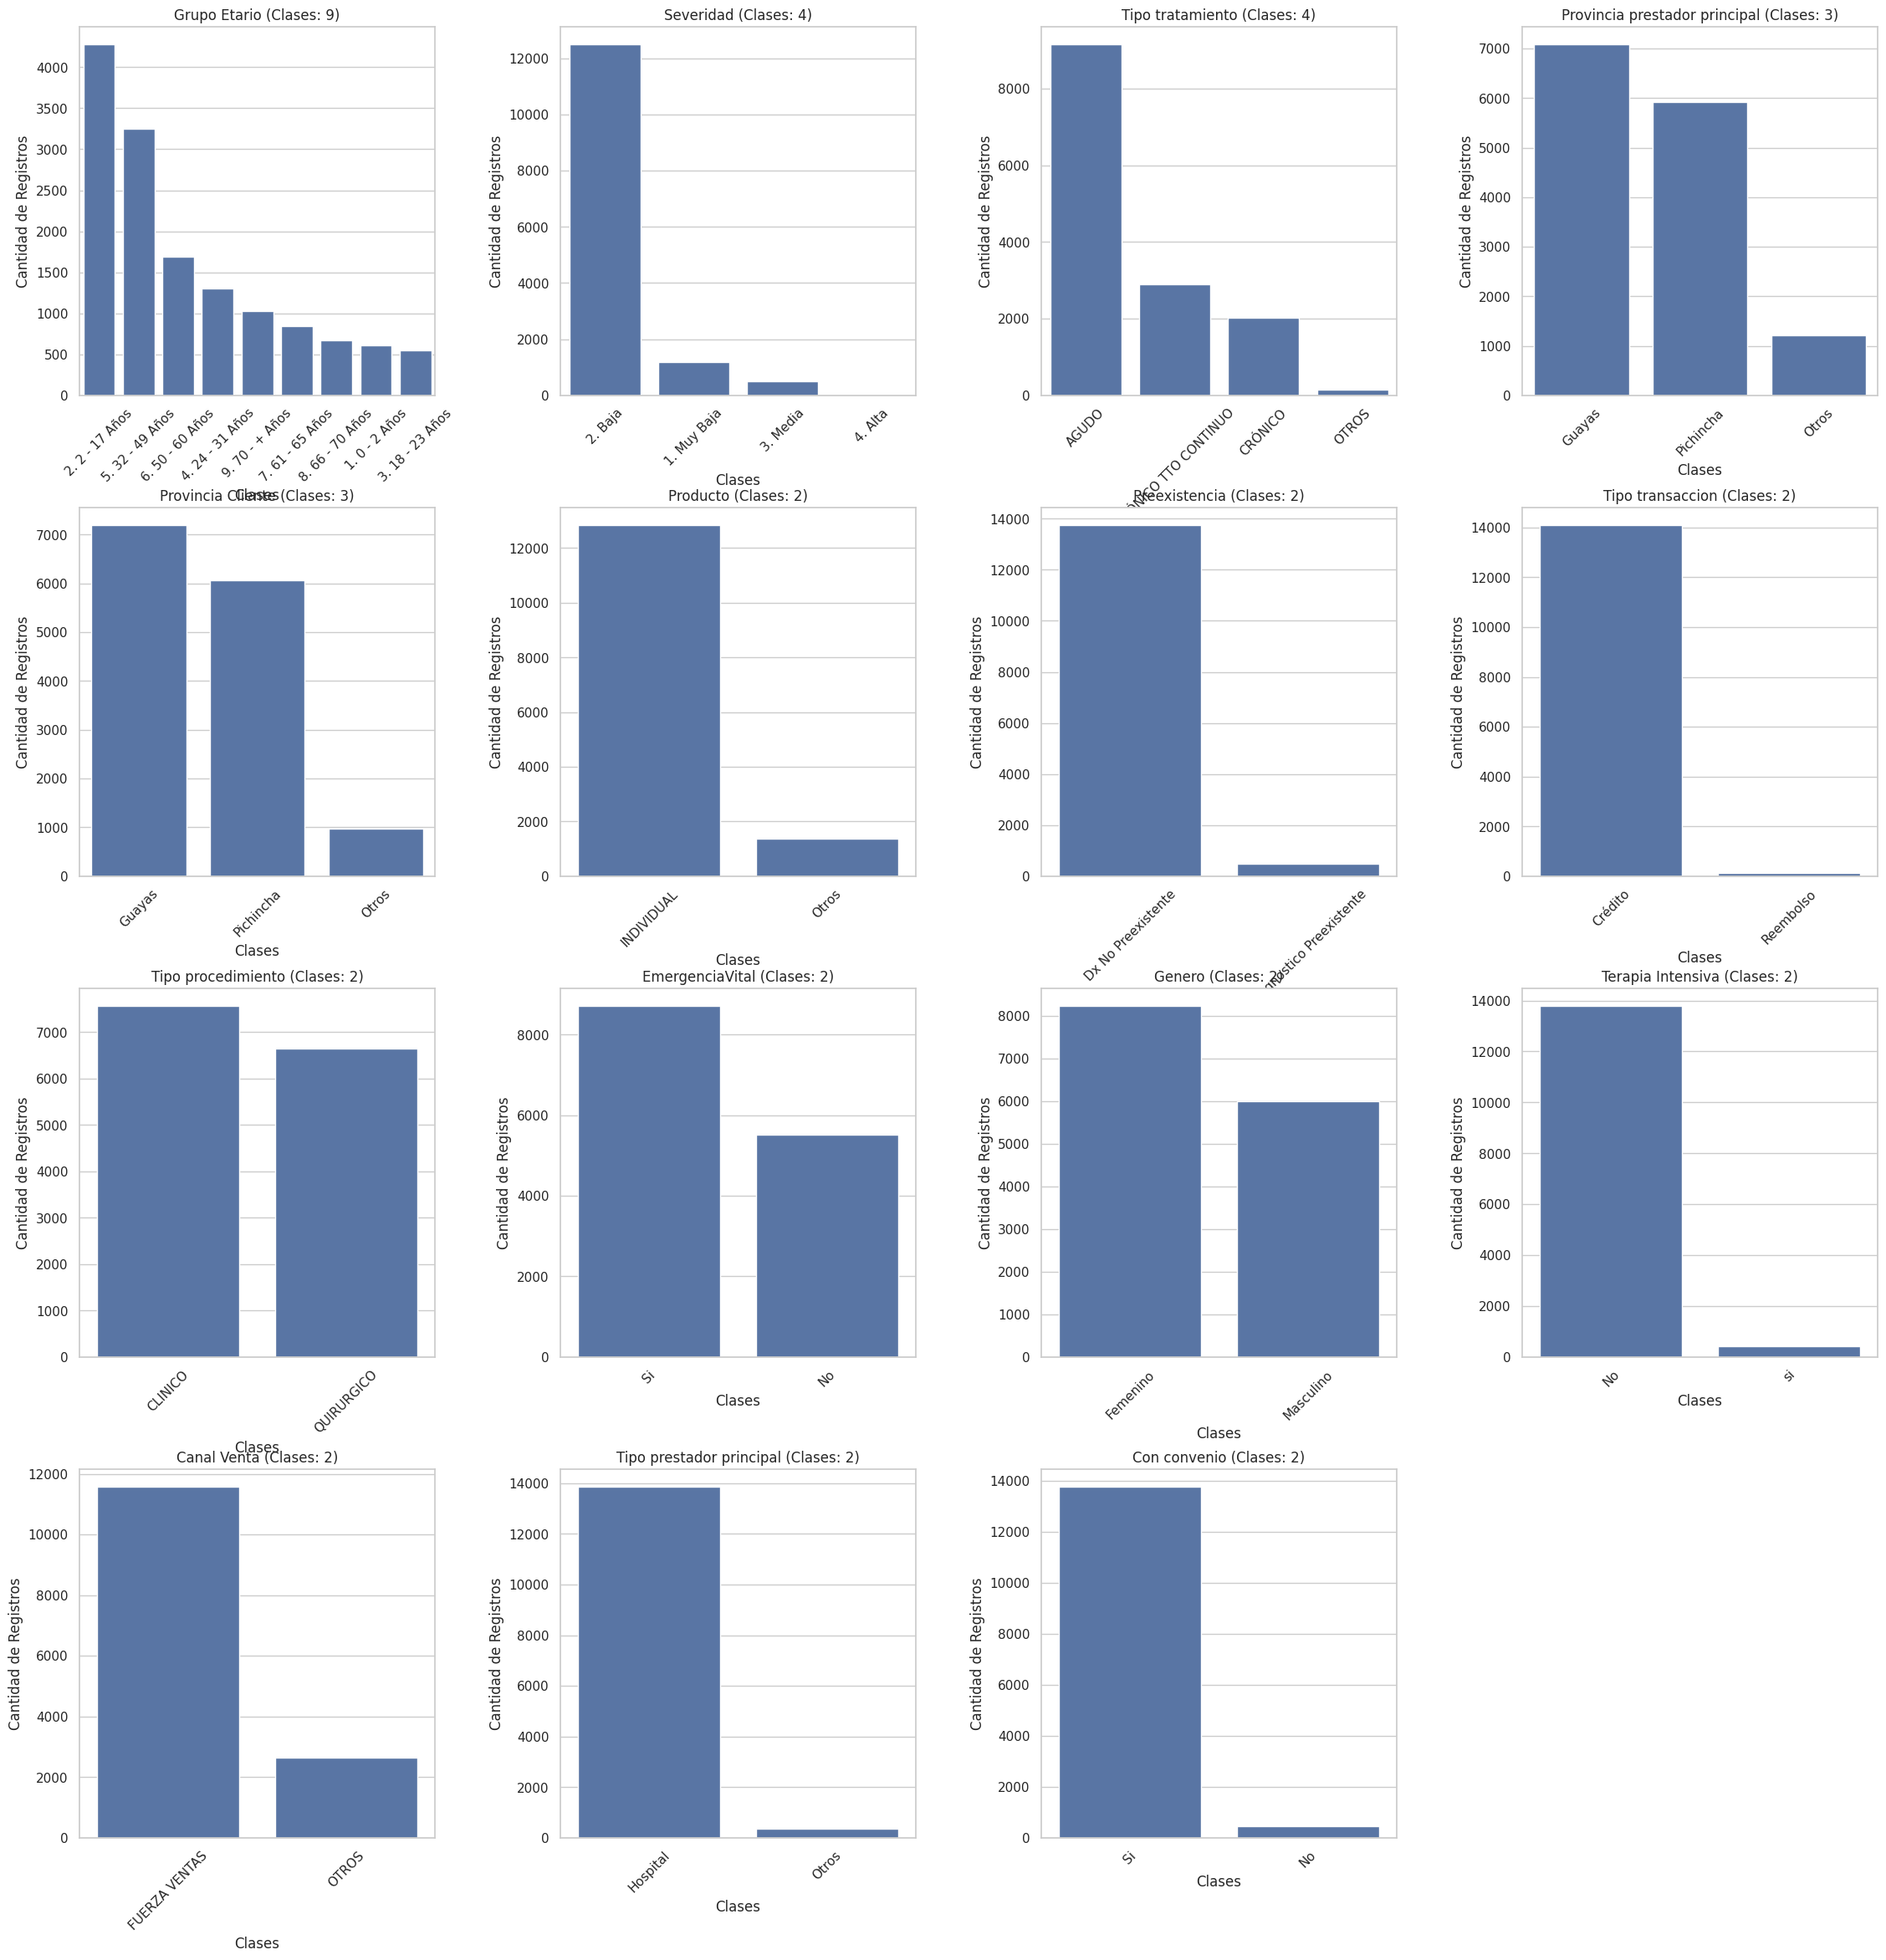

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario de variables categóricas y sus cantidades de clases
variables_con_mas_de_uno = {
    'Grupo Etario': 9,
    'Severidad': 4,
    'Tipo tratamiento': 4,
    'Provincia prestador principal': 3,
    'Provincia Cliente': 3,
    'Producto': 2,
    'Preexistencia': 2,
    'Tipo transaccion': 2,
    'Tipo procedimiento': 2,
    'EmergenciaVital': 2,
    'Genero': 2,
    'Terapia Intensiva': 2,
    'Canal Venta': 2,
    'Tipo prestador principal': 2,
    'Con convenio': 2
}

# Crear una figura con una cuadrícula de 4 columnas
n = len(variables_con_mas_de_uno)
rows = (n + 3) // 4  # Calcula el número de filas necesarias
fig, axes = plt.subplots(rows, 4, figsize=(24, rows * 6))

# Ajustar el layout de la figura
fig.tight_layout(pad=6.0)

# Iterar sobre las variables y crear gráficos de barras
for i, (variable, count) in enumerate(variables_con_mas_de_uno.items()):
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    # Contar la cantidad de registros por clase
    class_counts = df_nuevo[variable].value_counts()

    # Crear un gráfico de barras
    sns.barplot(x=class_counts.index, y=class_counts.values, ax=ax)
    ax.set_title(f'{variable} (Clases: {count})')
    ax.set_xlabel('Clases')
    ax.set_ylabel('Cantidad de Registros')
    ax.tick_params(axis='x', rotation=45)

# Eliminar los ejes vacíos
for j in range(i + 1, rows * 4):
    fig.delaxes(axes.flatten()[j])

plt.show()


In [62]:
import pandas as pd

# Diccionario de variables categóricas y sus cantidades de clases
variables_con_mas_de_uno = {
    'Grupo Etario': 9,
    'Severidad': 4,
    'Tipo tratamiento': 4,
    'Provincia prestador principal': 3,
    'Provincia Cliente': 3,
    'Producto': 2,
    'Preexistencia': 2,
    'Tipo transaccion': 2,
    'Tipo procedimiento': 2,
    'EmergenciaVital': 2,
    'Genero': 2,
    'Terapia Intensiva': 2,
    'Canal Venta': 2,
    'Tipo prestador principal': 2,
    'Con convenio': 2
}

# Crear una lista para almacenar los datos de cada variable
data = []

# Iterar sobre las variables y recopilar la cantidad de registros por clase
for variable in variables_con_mas_de_uno.keys():
    # Contar la cantidad de registros por clase
    class_counts = df_nuevo[variable].value_counts()

    # Agregar los datos a la lista
    for index, value in class_counts.items():
        data.append([variable, index, value])

# Crear un DataFrame con los datos recopilados
df_summary = pd.DataFrame(data, columns=['Variable', 'Clase', 'Cantidad de Registros'])

# Mostrar el DataFrame
print(df_summary)


                         Variable                     Clase  \
0                    Grupo Etario            2. 2 - 17 Años   
1                    Grupo Etario           5. 32 - 49 Años   
2                    Grupo Etario           6. 50 - 60 Años   
3                    Grupo Etario           4. 24 - 31 Años   
4                    Grupo Etario            9. 70 - + Años   
5                    Grupo Etario           7. 61 - 65 Años   
6                    Grupo Etario           8. 66 - 70 Años   
7                    Grupo Etario             1. 0 - 2 Años   
8                    Grupo Etario           3. 18 - 23 Años   
9                       Severidad                   2. Baja   
10                      Severidad               1. Muy Baja   
11                      Severidad                  3. Media   
12                      Severidad                   4. Alta   
13               Tipo tratamiento                     AGUDO   
14               Tipo tratamiento      CRÓNICO TTO CONT

**Dumificamos las variables categóricas usando LabelEncoder**

In [58]:

from sklearn.preprocessing import LabelEncoder

# Definir las columnas que se van a incluir en el LabelEncoder
columns_to_include = [
    'Grupo Etario', 'Genero', 'Provincia Cliente', 'Producto',
    'Tipo prestador principal', 'Con convenio', 'Provincia prestador principal',
    'Severidad', 'Codigo Diagnostico', 'Codigo dx primario',
    'Dx Primario', 'Dx Final', 'Familia dx relacionados',
    'Agrupacion Dx relacionados', 'Terapia Intensiva', 'Preexistencia',
    'EmergenciaVital', 'Tipo procedimiento', 'Tipo tratamiento', 'Tipo transaccion'
]

# Filtrar el DataFrame original para incluir solo las columnas deseadas
df_new = df_nuevo[columns_to_include].copy()

# Inicializar el objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada columna de tipo 'object'
for col in df_new.columns:
    df_new[col] = label_encoder.fit_transform(df_new[col])

# Concatenar las columnas numéricas originales con las transformadas por LabelEncoder
df_numerical = pd.concat([df_new, df_nuevo.select_dtypes(include=['float64', 'int64'])], axis=1)

df_numerical.head()


Grupo Etario  Genero  Provincia Cliente  Producto  \
0             0       0                  0         0   
1             6       1                  0         1   
2             5       0                  0         0   
3             1       1                  0         0   
4             8       0                  2         0   

   Tipo prestador principal  Con convenio  Provincia prestador principal  \
0                         0             1                              0   
1                         0             1                              0   
2                         0             1                              0   
3                         0             1                              0   
4                         0             1                              2   

   Severidad  Codigo Diagnostico  Codigo dx primario  Dx Primario  Dx Final  \
0          1                1608                 703          280       246   
1          1                1046                 440          289       797   
2          1                 778                 343            0         0   
3          1                1608                 703          280       246   
4          1                1608                 703          280       246   

   Familia dx relacionados  Agrupacion Dx relacionados  Terapia Intensiva  \
0                        0                           0                  0   
1                        0                           0                  0   
2                        0                           0                  0   
3                        0                           0                  0   
4                        0                           0                  0   

   Preexistencia  EmergenciaVital  Tipo procedimiento  Tipo tratamiento  \
0              1                0                   0                 3   
1              1                1                   0                 3   
2              1                1                   1                 3   
3              1                1                   0                 3   
4              1                1                   0                 3   

   Tipo transaccion  Antigüedad cliente meses  Edad Paciente  \
0                 0                        13              1   
1                 0                       186             65   
2                 0                         4             51   
3                 0                       133             13   
4                 0                       325             82   

   Dias hospitalizacion  Nivel contrato  HONORARIOS MEDICOS  \
0                     5               5              148.24   
1                     4               5              631.97   
2                     2               3              572.78   
3                     3               7              476.91   
4                     1               3              125.09   

   INSUMOS Y SUMINISTROS  LABORATORIOS  MEDICINAS  OTROS  PROTESIS  \
0                  28.92        738.85      26.47    0.0       0.0   
1                 206.06        500.43     128.15    0.0       0.0   
2                 437.19        140.00     377.01    0.0       0.0   
3                   0.00        466.73     193.92   90.0       0.0   
4                 100.78        401.45     321.10    0.0       0.0   

   SERVICIOS HOSPITALARIOS  TERAPIA INTENSIVA  Valor facturado total  \
0                  1250.00                0.0                2192.48   
1                   513.00                0.0                1979.61   
2                   449.50                0.0                1976.48   
3                   564.09                0.0                1791.65   
4                   502.40                0.0                1450.82   

   Valor cubierto total  Valor pagado total  
0               2192.48             2102.48  
1               1979.61             1641.28  
2               1955.58             1955.58  
3               17

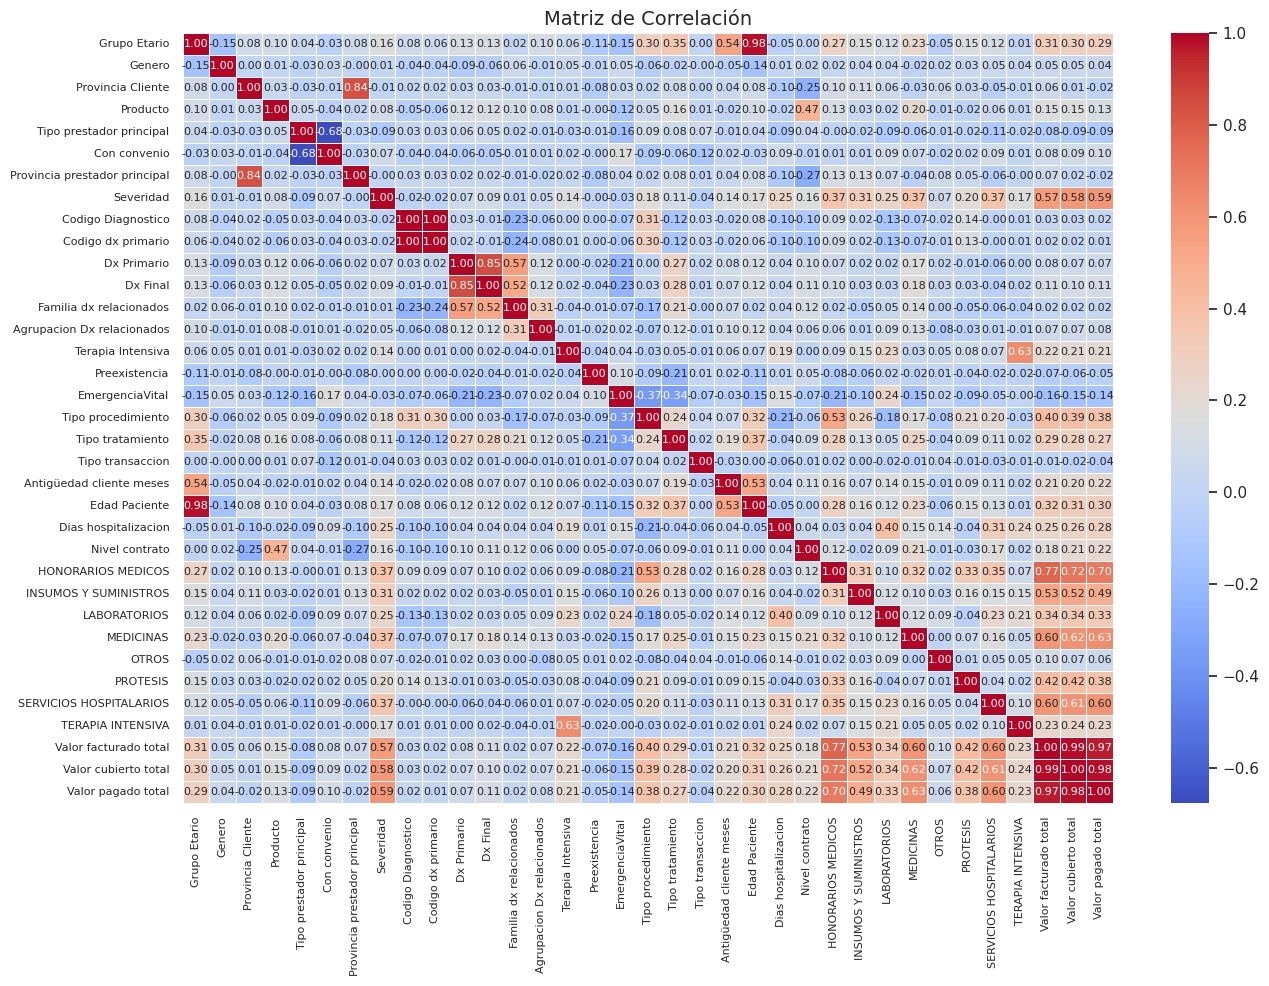

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
# Generar la matriz de correlación
correlation_matrix = df_numerical.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Generar el heatmap usando seaborn con ajustes de tamaño de letra
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})

# Ajustar la rotación de los ticks del eje x
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Añadir un título
plt.title('Matriz de Correlación', fontsize=14)

# Mostrar el heatmap
plt.show()


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes la matriz de correlación calculada y almacenada en correlation_matrix

# Configurar la visualización de Pandas para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Mostrar la matriz de correlación como tabla
print("\nTabla de Correlación:")
correlation_matrix




Tabla de Correlación:


Grupo Etario    Genero  Provincia Cliente  \
Grupo Etario                       1.000000 -0.147993           0.076795   
Genero                            -0.147993  1.000000           0.004922   
Provincia Cliente                  0.076795  0.004922           1.000000   
Producto                           0.095332  0.006008           0.030865   
Tipo prestador principal           0.043665 -0.027338          -0.027541   
Con convenio                      -0.034450  0.033645          -0.008030   
Provincia prestador principal      0.075512 -0.002068           0.837527   
Severidad                          0.164751  0.014102          -0.006227   
Codigo Diagnostico                 0.075137 -0.042739           0.021030   
Codigo dx primario                 0.063770 -0.035353           0.019566   
Dx Primario                        0.130387 -0.086653           0.032218   
Dx Final                           0.129559 -0.057275           0.033958   
Familia dx relacionados            0.017439  0.063160          -0.007969   
Agrupacion Dx relacionados         0.103174 -0.005965          -0.006564   
Terapia Intensiva                  0.063856  0.045552           0.013829   
Preexistencia                     -0.106391 -0.011132          -0.076127   
EmergenciaVital                   -0.149178  0.052494           0.030834   
Tipo procedimiento                 0.303055 -0.061853           0.015337   
Tipo tratamiento                   0.348951 -0.019879           0.075625   
Tipo transaccion                   0.000989 -0.000822           0.000084   
Antigüedad cliente meses           0.538173 -0.045025           0.037515   
Edad Paciente                      0.981891 -0.140949           0.078548   
Dias hospitalizacion              -0.045614  0.013519          -0.097367   
Nivel contrato                     0.003249  0.019767          -0.251209   
HONORARIOS MEDICOS                 0.266843  0.022865           0.102432   
INSUMOS Y SUMINISTROS              0.151990  0.040227           0.110759   
LABORATORIOS                       0.116687  0.038041           0.056998   
MEDICINAS                          0.225300 -0.021132          -0.026125   
OTROS                             -0.050898  0.022601           0.064303   
PROTESIS                           0.145065  0.034939           0.034260   
SERVICIOS HOSPITALARIOS            0.120450  0.050448          -0.053358   
TERAPIA INTENSIVA                  0.011284  0.041147          -0.007927   
Valor facturado total              0.307021  0.045006           0.058877   
Valor cubierto total               0.297455  0.046250           0.011273   
Valor pagado total                 0.293309  0.042423          -0.018807   

                               Producto  Tipo prestador principal  \
Grupo Etario                   0.095332                  0.043665   
Genero                         0.006008                 -0.027338   
Provincia Cliente              0.030865                 -0.027541   
Producto                       1.000000                  0.049578   
Tipo prestador principal       0.049578                  1.000000   
Con convenio                  -0.041067                 -0.677836   
Provincia prestador principal  0.016527                 -0.028823   
Severidad                      0.083901                 -0.088428   
Codigo Diagnostico            -0.052959                  0.026810   
Codigo dx primario            -0.055803                  0.025542   
Dx Primario                    0.121394                  0.056531   
Dx Final                       0.124809                  0.054344   
Familia dx relacionados        0.101587                  0.015863   
Agrupacion Dx relacionados     0.077533                 -0.010704   
Terapia Intensiva              0.007952                 -0.028632   
Preexistencia                 -0.000090                 -0.007535   
EmergenciaVital               -0.115367                 -0.156155   
Tipo procedimiento             0.051052             

**MODELADO DE DATOS**

Como primer punto vamos a eliminar aquellos campos que no son necesarios para el modelado de datos, o son repetitivos.

In [54]:
# Lista de campos a eliminar
campos_a_eliminar = ['IdCaso', 'Codigo paciente', 'Fecha Incurrencia', 'Fecha inicio vigencia',
                     'Codigo prestador principal', 'Nombre prestador principal', 'lugar-atencion',
                     'Año-Mes', 'Tipo reclamo','Codigo Diagnostico','Codigo dx primario' ]

# Crear el nuevo DataFrame eliminando los campos especificados
df_1 = df_nuevo.drop(columns=campos_a_eliminar)

# Mostrar información básica del nuevo DataFrame
print(df_1.info())


KeyError: "['Nombre prestador principal'] not found in axis"

Listo, una vez tenemos en nuestro espacio de trabajo a nuestra base de datos, debemos:

1.  Inicializar el modelo

2.  Entrenar el modelo con los datos de entrenamiento

3.  Hacer predicciones

### **MODELO DE REGRESION LINEAL MULTIPLE CON TODAS LAS VARIABLES**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Suponiendo que df_1 es tu DataFrame original
# Crear una copia del DataFrame original
df_completo = df_1.copy()

# Obtener las columnas numéricas y categóricas
var_cuantitativas = df_completo.select_dtypes('number').columns
var_cualitativas = df_completo.select_dtypes('object').columns

# Aplicar LabelEncoder a las variables categóricas
labelencoder = LabelEncoder()
df_completo[var_cualitativas] = df_completo[var_cualitativas].apply(labelencoder.fit_transform)

# Separar los predictores y la variable objetivo
X = df_completo[df_completo.columns.difference(['Valor facturado total'])]
y = df_completo['Valor facturado total']




In [ ]:
print("Variables X:")
print(X.columns.tolist())
print("\nVariable y:")
print(y.name)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# Inicializar el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo
modelo_regresion.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

# Calcular métricas de evaluación
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)

RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)

r_square_train = r2_score(y_train, predicciones_train)
r_square_test = r2_score(y_test, predicciones_test)

# Crear un DataFrame con las métricas
metricas_df = pd.DataFrame({
    'MSE': [MSE_train, MSE_test],
    'RMSE': [RMSE_train, RMSE_test],
    'MAE': [MAE_train, MAE_test],
    'R^2': [r_square_train, r_square_test]
}, index=['Entrenamiento', 'Prueba'])

# Mostrar el DataFrame con las métricas
print(metricas_df)


# Visualizar predicciones vs. observaciones en los conjuntos de entrenamiento y prueba
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(y_train.values, label='Valores Observados')
ax1.plot(predicciones_train, label='Predicciones')
ax1.set_title('Valores Observados vs. Predicciones (Conjunto de Entrenamiento)')
ax1.legend()

ax2.plot(y_test.values, label='Valores Observados')
ax2.plot(predicciones_test, label='Predicciones')
ax2.set_title('Valores Observados vs. Predicciones (Conjunto de Prueba)')
ax2.legend()

plt.tight_layout()
plt.show()

Modelo de regresion lineal aplicando Lasso


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Suponiendo que df_1 es tu DataFrame original
# Crear una copia del DataFrame original para Lasso
df_lasso = df_1.copy()

# Obtener las columnas numéricas y categóricas
var_cuantitativas = df_lasso.select_dtypes('number').columns
var_cualitativas = df_lasso.select_dtypes('object').columns

# Aplicar LabelEncoder a las variables categóricas
labelencoder = LabelEncoder()
df_lasso[var_cualitativas] = df_lasso[var_cualitativas].apply(labelencoder.fit_transform)

# Separar los predictores y la variable objetivo
X = df_lasso[df_lasso.columns.difference(['Valor facturado total'])]
y = df_lasso['Valor facturado total']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# Inicializar el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo de regresión lineal
modelo_regresion.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba para regresión lineal
predicciones_train_lr = modelo_regresion.predict(X_train)
predicciones_test_lr = modelo_regresion.predict(X_test)

# Calcular métricas de evaluación para regresión lineal
MSE_train_lr = mean_squared_error(y_train, predicciones_train_lr)
MSE_test_lr = mean_squared_error(y_test, predicciones_test_lr)

RMSE_train_lr = np.sqrt(MSE_train_lr)
RMSE_test_lr = np.sqrt(MSE_test_lr)

MAE_train_lr = mean_absolute_error(y_train, predicciones_train_lr)
MAE_test_lr = mean_absolute_error(y_test, predicciones_test_lr)

r_square_train_lr = r2_score(y_train, predicciones_train_lr)
r_square_test_lr = r2_score(y_test, predicciones_test_lr)

# Inicializar el modelo Lasso
modelo_lasso = Lasso(alpha=0.1, random_state=123)

# Entrenar el modelo Lasso
modelo_lasso.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba para Lasso
predicciones_train_lasso = modelo_lasso.predict(X_train)
predicciones_test_lasso = modelo_lasso.predict(X_test)

# Calcular métricas de evaluación para Lasso
MSE_train_lasso = mean_squared_error(y_train, predicciones_train_lasso)
MSE_test_lasso = mean_squared_error(y_test, predicciones_test_lasso)

RMSE_train_lasso = np.sqrt(MSE_train_lasso)
RMSE_test_lasso = np.sqrt(MSE_test_lasso)

MAE_train_lasso = mean_absolute_error(y_train, predicciones_train_lasso)
MAE_test_lasso = mean_absolute_error(y_test, predicciones_test_lasso)

r_square_train_lasso = r2_score(y_train, predicciones_train_lasso)
r_square_test_lasso = r2_score(y_test, predicciones_test_lasso)

# Crear un DataFrame con las métricas para ambos modelos
metricas_modelo_completo = pd.DataFrame({
    'Regresión Lineal': [MSE_train_lr, RMSE_train_lr, MAE_train_lr, r_square_train_lr],
    'Lasso': [MSE_train_lasso, RMSE_train_lasso, MAE_train_lasso, r_square_train_lasso]
}, index=['MSE', 'RMSE', 'MAE', 'R^2'])



# Mostrar el DataFrame con las métricas
print("Métricas para modelos de regresión lineal y Lasso:")
print(metricas_modelo_completo)



# Opcional: Mostrar gráficos de predicciones vs. valores reales
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(y_train, predicciones_train_lr, color='blue', label='Train')
ax1.scatter(y_test, predicciones_test_lr, color='green', label='Test')
ax1.set_title('Regresión Lineal: Valores observados vs. predichos')
ax1.set_xlabel('Valores observados')
ax1.set_ylabel('Predicciones')
ax1.legend()

ax2.scatter(y_train, predicciones_train_lasso, color='blue', label='Train')
ax2.scatter(y_test, predicciones_test_lasso, color='green', label='Test')
ax2.set_title('Lasso: Valores observados vs. predichos')
ax2.set_xlabel('Valores observados')
ax2.set_ylabel('Predicciones')
ax2.legend()

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Suponiendo que df_1 es tu DataFrame original
# Crear una copia del DataFrame original para Lasso y Ridge
df_lasso_ridge = df_1.copy()

# Obtener las columnas numéricas y categóricas
var_cuantitativas = df_lasso_ridge.select_dtypes('number').columns
var_cualitativas = df_lasso_ridge.select_dtypes('object').columns

# Aplicar LabelEncoder a las variables categóricas
labelencoder = LabelEncoder()
df_lasso_ridge[var_cualitativas] = df_lasso_ridge[var_cualitativas].apply(labelencoder.fit_transform)

# Separar los predictores y la variable objetivo
X = df_lasso_ridge[df_lasso_ridge.columns.difference(['Valor facturado total'])]
y = df_lasso_ridge['Valor facturado total']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# Inicializar el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo de regresión lineal
modelo_regresion.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba para regresión lineal
predicciones_train_lr = modelo_regresion.predict(X_train)
predicciones_test_lr = modelo_regresion.predict(X_test)

# Calcular métricas de evaluación para regresión lineal
MSE_train_lr = mean_squared_error(y_train, predicciones_train_lr)
MSE_test_lr = mean_squared_error(y_test, predicciones_test_lr)

RMSE_train_lr = np.sqrt(MSE_train_lr)
RMSE_test_lr = np.sqrt(MSE_test_lr)

MAE_train_lr = mean_absolute_error(y_train, predicciones_train_lr)
MAE_test_lr = mean_absolute_error(y_test, predicciones_test_lr)

r_square_train_lr = r2_score(y_train, predicciones_train_lr)
r_square_test_lr = r2_score(y_test, predicciones_test_lr)

# Inicializar el modelo Lasso
modelo_lasso = Lasso(alpha=0.1, random_state=123)

# Entrenar el modelo Lasso
modelo_lasso.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba para Lasso
predicciones_train_lasso = modelo_lasso.predict(X_train)
predicciones_test_lasso = modelo_lasso.predict(X_test)

# Calcular métricas de evaluación para Lasso
MSE_train_lasso = mean_squared_error(y_train, predicciones_train_lasso)
MSE_test_lasso = mean_squared_error(y_test, predicciones_test_lasso)

RMSE_train_lasso = np.sqrt(MSE_train_lasso)
RMSE_test_lasso = np.sqrt(MSE_test_lasso)

MAE_train_lasso = mean_absolute_error(y_train, predicciones_train_lasso)
MAE_test_lasso = mean_absolute_error(y_test, predicciones_test_lasso)

r_square_train_lasso = r2_score(y_train, predicciones_train_lasso)
r_square_test_lasso = r2_score(y_test, predicciones_test_lasso)

# Inicializar el modelo Ridge
modelo_ridge = Ridge(alpha=1.0, random_state=123)

# Entrenar el modelo Ridge
modelo_ridge.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba para Ridge
predicciones_train_ridge = modelo_ridge.predict(X_train)
predicciones_test_ridge = modelo_ridge.predict(X_test)

# Calcular métricas de evaluación para Ridge
MSE_train_ridge = mean_squared_error(y_train, predicciones_train_ridge)
MSE_test_ridge = mean_squared_error(y_test, predicciones_test_ridge)

RMSE_train_ridge = np.sqrt(MSE_train_ridge)
RMSE_test_ridge = np.sqrt(MSE_test_ridge)

MAE_train_ridge = mean_absolute_error(y_train, predicciones_train_ridge)
MAE_test_ridge = mean_absolute_error(y_test, predicciones_test_ridge)

r_square_train_ridge = r2_score(y_train, predicciones_train_ridge)
r_square_test_ridge = r2_score(y_test, predicciones_test_ridge)

# Crear un DataFrame con las métricas para todos los modelos
metricas_modelo_completo = pd.DataFrame({
    'Regresión Lineal': [MSE_train_lr, RMSE_train_lr, MAE_train_lr, r_square_train_lr],
    'Lasso': [MSE_train_lasso, RMSE_train_lasso, MAE_train_lasso, r_square_train_lasso],
    'Ridge': [MSE_train_ridge, RMSE_train_ridge, MAE_train_ridge, r_square_train_ridge]
}, index=['MSE', 'RMSE', 'MAE', 'R^2'])


# Crear un DataFrame con las métricas para ambos modelos test
metricas_modelo_completo_test = pd.DataFrame({
    'Regresión Lineal': [MSE_test_lr, RMSE_test_lr, MAE_test_lr, r_square_test_lr],
    'Lasso': [MSE_test_lasso, RMSE_test_lasso, MAE_test_lasso, r_square_test_lasso],
     'Ridge': [MSE_test_ridge, RMSE_test_ridge, MAE_test_ridge, r_square_test_ridge]
}, index=['MSE', 'RMSE', 'MAE', 'R^2'])

# Mostrar el DataFrame con las métricas
print("Métricas para modelos de regresión lineal, Lasso y Ridge:")
print(metricas_modelo_completo)

# Mostrar el DataFrame con las métricas
print("Métricas en test para modelos de regresión lineal, Lasso y Ridge:")
print(metricas_modelo_completo_test)

# Opcional: Mostrar gráficos de predicciones vs. valores reales
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.scatter(y_train, predicciones_train_lr, color='blue', label='Train')
ax1.scatter(y_test, predicciones_test_lr, color='green', label='Test')
ax1.set_title('Regresión Lineal: Valores observados vs. predichos')
ax1.set_xlabel('Valores observados')
ax1.set_ylabel('Predicciones')
ax1.legend()

ax2.scatter(y_train, predicciones_train_lasso, color='blue', label='Train')
ax2.scatter(y_test, predicciones_test_lasso, color='green', label='Test')
ax2.set_title('Lasso: Valores observados vs. predichos')
ax2.set_xlabel('Valores observados')
ax2.set_ylabel('Predicciones')
ax2.legend()

ax3.scatter(y_train, predicciones_train_ridge, color='blue', label='Train')
ax3.scatter(y_test, predicciones_test_ridge, color='green', label='Test')
ax3.set_title('Ridge: Valores observados vs. predichos')
ax3.set_xlabel('Valores observados')
ax3.set_ylabel('Predicciones')
ax3.legend()

plt.tight_layout()
plt.show()


Modelo de regresion lineal aplicado a variables importantes


In [ ]:
 #Seleccionar las variables solicitadas
# Seleccionar las variables deseadas para df_dxfinal
variables_seleccionadas = ['Grupo Etario', 'Provincia Cliente', 'Dias hospitalizacion',
                           'Terapia Intensiva',  'HONORARIOS MEDICOS','SERVICIOS HOSPITALARIOS','Antigüedad cliente meses',
                           'Genero', 'Valor facturado total','Nivel contrato','Tipo procedimiento','Valor facturado total']

# Filtrar el DataFrame con las variables seleccionadas
df_filtrado = df_completo[variables_seleccionadas].copy()


In [ ]:
df_filtrado.info()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Crear una copia del DataFrame original para el modelo filtrado
df_filtrado = df_1[['Grupo Etario', 'Provincia Cliente', 'Dias hospitalizacion','Agrupacion Dx relacionados',
                           'Terapia Intensiva',  'HONORARIOS MEDICOS','SERVICIOS HOSPITALARIOS','Antigüedad cliente meses',
                           'Genero', 'Valor facturado total','Nivel contrato','Tipo procedimiento','Valor facturado total']].copy()

# Aplicar LabelEncoder a las variables categóricas
labelencoder = LabelEncoder()
df_filtrado[['Grupo Etario', 'Provincia Cliente', 'Terapia Intensiva',
             'Agrupacion Dx relacionados', 'Genero','Tipo procedimiento']] = \
    df_filtrado[['Grupo Etario', 'Provincia Cliente', 'Terapia Intensiva',
                 'Agrupacion Dx relacionados', 'Genero','Tipo procedimiento']].apply(labelencoder.fit_transform)



# Separar los predictores y la variable objetivo
X = df_filtrado[df_filtrado.columns.difference(['Valor facturado total'])]
y = df_filtrado['Valor facturado total']


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# Inicializar el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo de regresión lineal
modelo_regresion.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba para regresión lineal
predicciones_train_lr = modelo_regresion.predict(X_train)
predicciones_test_lr = modelo_regresion.predict(X_test)

# Calcular métricas de evaluación para regresión lineal
MSE_train_lr = mean_squared_error(y_train, predicciones_train_lr)
MSE_test_lr = mean_squared_error(y_test, predicciones_test_lr)

RMSE_train_lr = np.sqrt(MSE_train_lr)
RMSE_test_lr = np.sqrt(MSE_test_lr)

MAE_train_lr = mean_absolute_error(y_train, predicciones_train_lr)
MAE_test_lr = mean_absolute_error(y_test, predicciones_test_lr)

r_square_train_lr = r2_score(y_train, predicciones_train_lr)
r_square_test_lr = r2_score(y_test, predicciones_test_lr)

# Inicializar el modelo Lasso
modelo_lasso = Lasso(alpha=0.1, random_state=123)

# Entrenar el modelo Lasso
modelo_lasso.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba para Lasso
predicciones_train_lasso = modelo_lasso.predict(X_train)
predicciones_test_lasso = modelo_lasso.predict(X_test)

# Calcular métricas de evaluación para Lasso
MSE_train_lasso = mean_squared_error(y_train, predicciones_train_lasso)
MSE_test_lasso = mean_squared_error(y_test, predicciones_test_lasso)

RMSE_train_lasso = np.sqrt(MSE_train_lasso)
RMSE_test_lasso = np.sqrt(MSE_test_lasso)

MAE_train_lasso = mean_absolute_error(y_train, predicciones_train_lasso)
MAE_test_lasso = mean_absolute_error(y_test, predicciones_test_lasso)

r_square_train_lasso = r2_score(y_train, predicciones_train_lasso)
r_square_test_lasso = r2_score(y_test, predicciones_test_lasso)

# Inicializar el modelo Ridge
modelo_ridge = Ridge(alpha=1.0, random_state=123)

# Entrenar el modelo Ridge
modelo_ridge.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba para Ridge
predicciones_train_ridge = modelo_ridge.predict(X_train)
predicciones_test_ridge = modelo_ridge.predict(X_test)

# Calcular métricas de evaluación para Ridge
MSE_train_ridge = mean_squared_error(y_train, predicciones_train_ridge)
MSE_test_ridge = mean_squared_error(y_test, predicciones_test_ridge)

RMSE_train_ridge = np.sqrt(MSE_train_ridge)
RMSE_test_ridge = np.sqrt(MSE_test_ridge)

MAE_train_ridge = mean_absolute_error(y_train, predicciones_train_ridge)
MAE_test_ridge = mean_absolute_error(y_test, predicciones_test_ridge)

r_square_train_ridge = r2_score(y_train, predicciones_train_ridge)
r_square_test_ridge = r2_score(y_test, predicciones_test_ridge)

# Crear un DataFrame con las métricas para todos los modelos
metricas_modelo_filtrado = pd.DataFrame({
    'Regresión Lineal': [MSE_train_lr, RMSE_train_lr, MAE_train_lr, r_square_train_lr],
    'Lasso': [MSE_train_lasso, RMSE_train_lasso, MAE_train_lasso, r_square_train_lasso],
    'Ridge': [MSE_train_ridge, RMSE_train_ridge, MAE_train_ridge, r_square_train_ridge]
}, index=['MSE', 'RMSE', 'MAE', 'R^2'])


# Crear un DataFrame con las métricas para ambos modelos test
metricas_modelo_filtrado_test = pd.DataFrame({
    'Regresión Lineal': [MSE_test_lr, RMSE_test_lr, MAE_test_lr, r_square_test_lr],
    'Lasso': [MSE_test_lasso, RMSE_test_lasso, MAE_test_lasso, r_square_test_lasso],
     'Ridge': [MSE_test_ridge, RMSE_test_ridge, MAE_test_ridge, r_square_test_ridge]
}, index=['MSE', 'RMSE', 'MAE', 'R^2'])

# Mostrar el DataFrame con las métricas
print("Métricas para modelos de regresión lineal, Lasso y Ridge:")
print(metricas_modelo_filtrado)

# Mostrar el DataFrame con las métricas
print("Métricas en test para modelos de regresión lineal, Lasso y Ridge:")
print(metricas_modelo_filtrado_test)

# Opcional: Mostrar gráficos de predicciones vs. valores reales
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.scatter(y_train, predicciones_train_lr, color='blue', label='Train')
ax1.scatter(y_test, predicciones_test_lr, color='green', label='Test')
ax1.set_title('Regresión Lineal: Valores observados vs. predichos')
ax1.set_xlabel('Valores observados')
ax1.set_ylabel('Predicciones')
ax1.legend()

ax2.scatter(y_train, predicciones_train_lasso, color='blue', label='Train')
ax2.scatter(y_test, predicciones_test_lasso, color='green', label='Test')
ax2.set_title('Lasso: Valores observados vs. predichos')
ax2.set_xlabel('Valores observados')
ax2.set_ylabel('Predicciones')
ax2.legend()

ax3.scatter(y_train, predicciones_train_ridge, color='blue', label='Train')
ax3.scatter(y_test, predicciones_test_ridge, color='green', label='Test')
ax3.set_title('Ridge: Valores observados vs. predichos')
ax3.set_xlabel('Valores observados')
ax3.set_ylabel('Predicciones')
ax3.legend()

plt.tight_layout()
plt.show()


In [ ]:
print("Variables X:")
print(X.columns.tolist())


Modelo de regresion aplciado al DX con mayor cantidad de monto facturado

In [ ]:
import pandas as pd

# Agrupar por 'Dx Primario' y contar registros y sumar 'Valor facturado total'
tabla_agrupada = df_1.groupby('Dx Primario').agg(
    Cantidad_de_Registros=('Dx Primario', 'size'),
    Valor_Facturado_Total=('Valor facturado total', 'sum')
).reset_index()

# Ordenar por cantidad de registros de manera descendente
tabla_agrupada = tabla_agrupada.sort_values(by='Cantidad_de_Registros', ascending=False)

# Mostrar la tabla agrupada
print("Tabla agrupada por 'Dx Primario' en df_1:")
tabla_agrupada.head(25)


In [ ]:
import pandas as pd

# Agrupar por 'Dx Primario' y contar registros
tabla_agrupada = df_1.groupby('Dx Primario').size().reset_index(name='Cantidad de Registros')

# Ordenar por cantidad de registros de manera descendente y seleccionar los primeros 25
top_25_dx = tabla_agrupada.sort_values(by='Cantidad de Registros', ascending=False).head(25)

# Filtrar el DataFrame original para obtener solo los registros de los 25 'Dx Primario' principales
df_previo = df_1[df_1['Dx Primario'].isin(top_25_dx['Dx Primario'])]

import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df_previo ya contiene los 25 'Dx Primario' principales con 'Cantidad de Registros' y 'Valor facturado total'
# Agrupar df_previo por 'Dx Primario' y obtener cantidad de registros y valor total facturado
tabla_agrupada = df_previo.groupby('Dx Primario').agg(
    Cantidad_de_Registros=('Dx Primario', 'size'),
    Valor_Facturado_Total=('Valor facturado total', 'sum')
).reset_index()

# Crear el gráfico de barras combinado con puntos
fig, ax1 = plt.subplots(figsize=(14, 8))

# Crear las barras para el valor total facturado
ax1.bar(tabla_agrupada['Dx Primario'], tabla_agrupada['Valor_Facturado_Total'], color='skyblue', label='Valor Facturado Total')
ax1.set_xlabel('Dx Primario')
ax1.set_ylabel('Valor Facturado Total')
ax1.tick_params(axis='x', rotation=90)

# Crear un segundo eje y para la cantidad de registros
ax2 = ax1.twinx()
ax2.plot(tabla_agrupada['Dx Primario'], tabla_agrupada['Cantidad_de_Registros'], color='red', marker='o', linestyle='-', label='Cantidad de Registros')
ax2.set_ylabel('Cantidad de Registros')

# Añadir las leyendas
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.title('Valor Facturado Total y Cantidad de Registros por Dx Primario (Top 25)')
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt



# Seleccionar las variables deseadas para df_diagnostico
variables_seleccionadas = ['Grupo Etario', 'Provincia Cliente', 'Dias hospitalizacion','Dx Primario',
                           'Terapia Intensiva',  'HONORARIOS MEDICOS','SERVICIOS HOSPITALARIOS','Antigüedad cliente meses',
                           'Genero', 'Valor facturado total','Nivel contrato','Tipo procedimiento','Valor facturado total']

# Crear df_diagnostico a partir de df_previo con las variables seleccionadas
df_diagnostico = df_previo[variables_seleccionadas].copy()


# Aplicar LabelEncoder a las variables categóricas en df_diagnostico
labelencoder = LabelEncoder()
df_diagnostico[['Grupo Etario', 'Provincia Cliente', 'Terapia Intensiva',
                 'Genero','Dx Primario','Tipo procedimiento']] = \
    df_diagnostico[['Grupo Etario', 'Provincia Cliente', 'Terapia Intensiva',
                 'Genero','Dx Primario','Tipo procedimiento']].apply(labelencoder.fit_transform)

# Separar los predictores y la variable objetivo
X = df_diagnostico[df_diagnostico.columns.difference(['Valor facturado total'])]
y = df_diagnostico['Valor facturado total']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# Inicializar el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo de regresión lineal
modelo_regresion.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba para regresión lineal
predicciones_train_lr = modelo_regresion.predict(X_train)
predicciones_test_lr = modelo_regresion.predict(X_test)

# Calcular métricas de evaluación para regresión lineal
MSE_train_lr = mean_squared_error(y_train, predicciones_train_lr)
MSE_test_lr = mean_squared_error(y_test, predicciones_test_lr)

RMSE_train_lr = np.sqrt(MSE_train_lr)
RMSE_test_lr = np.sqrt(MSE_test_lr)

MAE_train_lr = mean_absolute_error(y_train, predicciones_train_lr)
MAE_test_lr = mean_absolute_error(y_test, predicciones_test_lr)

r_square_train_lr = r2_score(y_train, predicciones_train_lr)
r_square_test_lr = r2_score(y_test, predicciones_test_lr)

# Inicializar el modelo Lasso
modelo_lasso = Lasso(alpha=0.1, random_state=123)

# Entrenar el modelo Lasso
modelo_lasso.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba para Lasso
predicciones_train_lasso = modelo_lasso.predict(X_train)
predicciones_test_lasso = modelo_lasso.predict(X_test)

# Calcular métricas de evaluación para Lasso
MSE_train_lasso = mean_squared_error(y_train, predicciones_train_lasso)
MSE_test_lasso = mean_squared_error(y_test, predicciones_test_lasso)

RMSE_train_lasso = np.sqrt(MSE_train_lasso)
RMSE_test_lasso = np.sqrt(MSE_test_lasso)

MAE_train_lasso = mean_absolute_error(y_train, predicciones_train_lasso)
MAE_test_lasso = mean_absolute_error(y_test, predicciones_test_lasso)

r_square_train_lasso = r2_score(y_train, predicciones_train_lasso)
r_square_test_lasso = r2_score(y_test, predicciones_test_lasso)

# Inicializar el modelo Ridge
modelo_ridge = Ridge(alpha=1.0, random_state=123)

# Entrenar el modelo Ridge
modelo_ridge.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba para Ridge
predicciones_train_ridge = modelo_ridge.predict(X_train)
predicciones_test_ridge = modelo_ridge.predict(X_test)

# Calcular métricas de evaluación para Ridge
MSE_train_ridge = mean_squared_error(y_train, predicciones_train_ridge)
MSE_test_ridge = mean_squared_error(y_test, predicciones_test_ridge)

RMSE_train_ridge = np.sqrt(MSE_train_ridge)
RMSE_test_ridge = np.sqrt(MSE_test_ridge)

MAE_train_ridge = mean_absolute_error(y_train, predicciones_train_ridge)
MAE_test_ridge = mean_absolute_error(y_test, predicciones_test_ridge)

r_square_train_ridge = r2_score(y_train, predicciones_train_ridge)
r_square_test_ridge = r2_score(y_test, predicciones_test_ridge)

# Crear un DataFrame con las métricas para todos los modelos
metricas_modelo_dx= pd.DataFrame({
    'Regresión Lineal': [MSE_train_lr, RMSE_train_lr, MAE_train_lr, r_square_train_lr],
    'Lasso': [MSE_train_lasso, RMSE_train_lasso, MAE_train_lasso, r_square_train_lasso],
    'Ridge': [MSE_train_ridge, RMSE_train_ridge, MAE_train_ridge, r_square_train_ridge]
}, index=['MSE', 'RMSE', 'MAE', 'R^2'])


# Crear un DataFrame con las métricas para ambos modelos test
metricas_modelo_dx_test = pd.DataFrame({
    'Regresión Lineal': [MSE_test_lr, RMSE_test_lr, MAE_test_lr, r_square_test_lr],
    'Lasso': [MSE_test_lasso, RMSE_test_lasso, MAE_test_lasso, r_square_test_lasso],
     'Ridge': [MSE_test_ridge, RMSE_test_ridge, MAE_test_ridge, r_square_test_ridge]
}, index=['MSE', 'RMSE', 'MAE', 'R^2'])

# Mostrar el DataFrame con las métricas
print("Métricas para modelos de regresión lineal, Lasso y Ridge:")
print(metricas_modelo_dx)

# Mostrar el DataFrame con las métricas
print("Métricas en test para modelos de regresión lineal, Lasso y Ridge:")
print(metricas_modelo_dx_test)

# Opcional: Mostrar gráficos de predicciones vs. valores reales
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.scatter(y_train, predicciones_train_lr, color='blue', label='Train')
ax1.scatter(y_test, predicciones_test_lr, color='green', label='Test')
ax1.set_title('Regresión Lineal: Valores observados vs. predichos')
ax1.set_xlabel('Valores observados')
ax1.set_ylabel('Predicciones')
ax1.legend()

ax2.scatter(y_train, predicciones_train_lasso, color='blue', label='Train')
ax2.scatter(y_test, predicciones_test_lasso, color='green', label='Test')
ax2.set_title('Lasso: Valores observados vs. predichos')
ax2.set_xlabel('Valores observados')
ax2.set_ylabel('Predicciones')
ax2.legend()

ax3.scatter(y_train, predicciones_train_ridge, color='blue', label='Train')
ax3.scatter(y_test, predicciones_test_ridge, color='green', label='Test')
ax3.set_title('Ridge: Valores observados vs. predichos')
ax3.set_xlabel('Valores observados')
ax3.set_ylabel('Predicciones')
ax3.legend()

plt.tight_layout()
plt.show()


In [ ]:
metricas_modelo_completo


In [ ]:
metricas_modelo_filtrado


In [ ]:

metricas_modelo_dx

In [ ]:
import pandas as pd

# Agrupar por 'Agrupacion Dx relacionados' y contar registros
tabla_agrupada = df_1.groupby('Dx Primario').size().reset_index(name='Cantidad de Registros')

# Ordenar por cantidad de registros de manera descendente
tabla_agrupada = tabla_agrupada.sort_values(by='Cantidad de Registros', ascending=False)

# Mostrar la tabla agrupada
print("Tabla agrupada por 'Dx final' en df_1:")
tabla_agrupada.head()

In [ ]:
df_1.info()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Suponiendo que 'ENFERMEDADES DEL SISTEMA DIGESTIVO NO NEOPLÁSICAS' es la agrupación correcta
filtro_dx = df_1['Dx Primario'] == 'DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN INFECCIOSO'

# Aplicar filtro al DataFrame original df_1
df_dx = df_1[filtro_dx].copy()  # Usamos .copy() para evitar modificaciones en df_1 accidentalmente

# Seleccionar las variables deseadas para df_dxfinal
variables_seleccionadas = ['Grupo Etario', 'Provincia Cliente', 'Dias hospitalizacion',
                           'Terapia Intensiva',  'HONORARIOS MEDICOS','SERVICIOS HOSPITALARIOS','Antigüedad cliente meses',
                           'Genero', 'Valor facturado total','Nivel contrato','Tipo procedimiento']

# Crear df_dxfinal a partir de df_previo con las variables seleccionadas
df_dxfinal = df_dx[variables_seleccionadas].copy()


 # Aplicar LabelEncoder a las variables categóricas en df_dxfinal
labelencoder = LabelEncoder()
df_dxfinal[['Grupo Etario', 'Provincia Cliente', 'Terapia Intensiva', 'Tipo procedimiento',
                 'Genero']] = \
    df_dxfinal[['Grupo Etario', 'Provincia Cliente', 'Terapia Intensiva', 'Tipo procedimiento',
                    'Genero']].apply(labelencoder.fit_transform)


# Separar los predictores y la variable objetivo
X = df_dxfinal[df_dxfinal.columns.difference(['Valor facturado total'])]
y = df_dxfinal['Valor facturado total']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# Inicializar el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo de regresión lineal
modelo_regresion.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba para regresión lineal
predicciones_train_lr = modelo_regresion.predict(X_train)
predicciones_test_lr = modelo_regresion.predict(X_test)

# Calcular métricas de evaluación para regresión lineal
MSE_train_lr = mean_squared_error(y_train, predicciones_train_lr)
MSE_test_lr = mean_squared_error(y_test, predicciones_test_lr)

RMSE_train_lr = np.sqrt(MSE_train_lr)
RMSE_test_lr = np.sqrt(MSE_test_lr)

MAE_train_lr = mean_absolute_error(y_train, predicciones_train_lr)
MAE_test_lr = mean_absolute_error(y_test, predicciones_test_lr)

r_square_train_lr = r2_score(y_train, predicciones_train_lr)
r_square_test_lr = r2_score(y_test, predicciones_test_lr)

# Inicializar el modelo Lasso
modelo_lasso = Lasso(alpha=0.1, random_state=123)

# Entrenar el modelo Lasso
modelo_lasso.fit(X_train, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba para Lasso
predicciones_train_lasso = modelo_lasso.predict(X_train)
predicciones_test_lasso = modelo_lasso.predict(X_test)

# Calcular métricas de evaluación para Lasso
MSE_train_lasso = mean_squared_error(y_train, predicciones_train_lasso)
MSE_test_lasso = mean_squared_error(y_test, predicciones_test_lasso)

RMSE_train_lasso = np.sqrt(MSE_train_lasso)
RMSE_test_lasso = np.sqrt(MSE_test_lasso)

MAE_train_lasso = mean_absolute_error(y_train, predicciones_train_lasso)
MAE_test_lasso = mean_absolute_error(y_test, predicciones_test_lasso)

r_square_train_lasso = r2_score(y_train, predicciones_train_lasso)
r_square_test_lasso = r2_score(y_test, predicciones_test_lasso)

# Crear un DataFrame con las métricas para ambos modelos
metricas_modelo_por_dxfinal = pd.DataFrame({
    'Regresión Lineal': [MSE_train_lr, RMSE_train_lr, MAE_train_lr, r_square_train_lr],
    'Lasso': [MSE_train_lasso, RMSE_train_lasso, MAE_train_lasso, r_square_train_lasso]
}, index=['MSE', 'RMSE', 'MAE', 'R^2'])

# Mostrar el DataFrame con las métricas
pd.options.display.float_format = '{:.2f}'.format  # Establecer formato decimal
print("Métricas para modelos de regresión lineal y Lasso (modelo por dx):")
print(metricas_modelo_por_dxfinal)

# Opcional: Mostrar gráficos de predicciones vs. valores reales
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(y_train, predicciones_train_lr, color='blue', label='Train')
ax1.scatter(y_test, predicciones_test_lr, color='green', label='Test')
ax1.set_title('Regresión Lineal: Valores observados vs. predichos')
ax1.set_xlabel('Valores observados')
ax1.set_ylabel('Predicciones')
ax1.legend()

ax2.scatter(y_train, predicciones_train_lasso, color='blue', label='Train')
ax2.scatter(y_test, predicciones_test_lasso, color='green', label='Test')
ax2.set_title('Lasso: Valores observados vs. predichos')
ax2.set_xlabel('Valores observados')
ax2.set_ylabel('Predicciones')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
df_1.info()

In [ ]:

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel


# Supongamos que tienes tu DataFrame df_1 con todas las variables
# Seleccionar X (predictores) y y (variable objetivo)
X = df_1.drop(columns=['Valor facturado total','Grupo Etario','Con convenio','Dx Final','Provincia prestador principal','Familia dx relacionados','Valor cubierto total','Valor pagado total','OTROS' ])  # Excluir la variable objetivo
y = df_1['Valor facturado total']

# Convertir variables categóricas a numéricas si es necesario
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Inicializar un modelo de RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=123)

# Aplicar SelectFromModel para seleccionar características importantes
selector = SelectFromModel(rf, threshold='median')  # Selecciona características por encima de la mediana de importancia
selector.fit(X_train, y_train)

# Obtener las características seleccionadas
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Inicializar y ajustar el modelo de PCA en las características seleccionadas
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Determinar el número óptimo de componentes principales utilizando la gráfica de codos
pca = PCA()
pca.fit(X_train_selected_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Limitar la visualización a los primeros 300 componentes
num_components_to_show = 300


plt.figure(figsize=(10, 6))
plt.plot(range(1, num_components_to_show + 1), explained_variance[:num_components_to_show], marker='o', linestyle='--', linewidth=0.5)

# Agregar puntos cada 25 componentes
for i in range(0, num_components_to_show, 25):
    plt.plot(i + 1, explained_variance[i], 'ro')  # 'ro' significa puntos rojos

plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Gráfica de Codos para PCA')
plt.grid(True)
plt.show()





In [ ]:
#X = df_1.drop(columns=['Valor facturado total', 'Grupo Etario', 'Con convenio', 'Dx Final', 'Provincia prestador principal', 'Familia dx relacionados', 'Valor cubierto total', 'Valor pagado total', 'OTROS'])  # Excluir la variable objetivo
X.info()


In [ ]:
# Elegir el número de componentes principales a utilizar basado en la gráfica de codos
n_componentes = 60 # Ajustar según la gráfica de codos

pca = PCA(n_components=n_componentes)
X_train_pca = pca.fit_transform(X_train_selected_scaled)
X_test_pca = pca.transform(X_test_selected_scaled)

# Inicializar el modelo de regresión lineal con PCA
modelo_regresion_pca = LinearRegression()

# Entrenar el modelo de regresión lineal con PCA
modelo_regresion_pca.fit(X_train_pca, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba con PCA
predicciones_train_pca = modelo_regresion_pca.predict(X_train_pca)
predicciones_test_pca = modelo_regresion_pca.predict(X_test_pca)

# Calcular métricas de evaluación con PCA
MSE_train_pca = mean_squared_error(y_train, predicciones_train_pca)
MSE_test_pca = mean_squared_error(y_test, predicciones_test_pca)

RMSE_train_pca = np.sqrt(MSE_train_pca)
RMSE_test_pca = np.sqrt(MSE_test_pca)

r_square_train_pca = r2_score(y_train, predicciones_train_pca)
r_square_test_pca = r2_score(y_test, predicciones_test_pca)

MAE_train_pca = mean_absolute_error(y_train, predicciones_train_pca)
MAE_test_pca = mean_absolute_error(y_test, predicciones_test_pca)

# Mostrar métricas de evaluación con PCA
print(f"Métricas del modelo de regresión lineal con PCA:")
print(f"Train - MSE: {MSE_train_pca:.2f}, RMSE: {RMSE_train_pca:.2f}, MAE: {MAE_train_pca:.2f}, R^2: {r_square_train_pca:.2f}")
print(f"Test  - MSE: {MSE_test_pca:.2f}, RMSE: {RMSE_test_pca:.2f}, MAE: {MAE_test_pca:.2f}, R^2: {r_square_test_pca:.2f}")


In [ ]:
# Mostrar gráfico de predicciones vs. valores reales para entrenamiento y prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predicciones_train_pca, color='blue', label='Train')
plt.scatter(y_test, predicciones_test_pca, color='green', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, linestyle='--')
plt.title('Regresión Lineal con PCA: Valores observados vs. predichos')
plt.xlabel('Valores observados')
plt.ylabel('Predicciones')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que tienes tu DataFrame df_1 con todas las variables
# Seleccionar X (predictores) y y (variable objetivo)
X = df_1.drop(columns=['Valor facturado total'])  # Excluir la variable objetivo
y = df_1['Valor facturado total']

# Convertir variables categóricas a numéricas si es necesario
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Inicializar un modelo de RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=123)

# Aplicar SelectFromModel para seleccionar características importantes
selector = SelectFromModel(rf, threshold='median')  # Selecciona características por encima de la mediana de importancia
selector.fit(X_train, y_train)

# Obtener las características seleccionadas
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Inicializar y ajustar el modelo de PCA en las características seleccionadas
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Elegir el número de componentes principales a utilizar
n_componentes = 10  # Ajustar según criterios como varianza explicada

pca = PCA(n_components=n_componentes)
X_train_pca = pca.fit_transform(X_train_selected_scaled)
X_test_pca = pca.transform(X_test_selected_scaled)

# Inicializar el modelo de regresión lineal con PCA
modelo_regresion_pca = LinearRegression()

# Entrenar el modelo de regresión lineal con PCA
modelo_regresion_pca.fit(X_train_pca, y_train)

# Realizar predicciones en conjunto de entrenamiento y prueba con PCA
predicciones_train_pca = modelo_regresion_pca.predict(X_train_pca)
predicciones_test_pca = modelo_regresion_pca.predict(X_test_pca)

# Calcular métricas de evaluación con PCA
MSE_train_pca = mean_squared_error(y_train, predicciones_train_pca)
MSE_test_pca = mean_squared_error(y_test, predicciones_test_pca)

RMSE_train_pca = np.sqrt(MSE_train_pca)
RMSE_test_pca = np.sqrt(MSE_test_pca)

r_square_train_pca = r2_score(y_train, predicciones_train_pca)
r_square_test_pca = r2_score(y_test, predicciones_test_pca)

# Mostrar métricas de evaluación con PCA
print(f"Métricas del modelo de regresión lineal con PCA:")
print(f"Train - MSE: {MSE_train_pca:.2f}, RMSE: {RMSE_train_pca:.2f}, R^2: {r_square_train_pca:.2f}")
print(f"Test  - MSE: {MSE_test_pca:.2f}, RMSE: {RMSE_test_pca:.2f}, R^2: {r_square_test_pca:.2f}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Supongamos que tienes tu DataFrame df_1 con todas las variables
# Seleccionar X (predictores) y y (variable objetivo)
X = df_1.drop(columns=['Valor facturado total'])  # Excluir la variable objetivo
y = df_1['Valor facturado total']

# Convertir variables categóricas a numéricas si es necesario
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Escalar los datos para mejorar el rendimiento de la red neuronal
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar el modelo secuencial
modelo = Sequential()

# Añadir capas ocultas y capa de salida
modelo.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Capa oculta con activación ReLU
modelo.add(Dense(32, activation='relu'))  # Otra capa oculta con activación ReLU
modelo.add(Dense(1))  # Capa de salida (una neurona para la regresión)

# Compilar el modelo
modelo.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Optimizador Adam, función de pérdida MSE

# Resumen del modelo
modelo.summary()

# Entrenar el modelo
historia = modelo.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
puntaje = modelo.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Pérdida (MSE): {puntaje[0]}')
print(f'MAE: {puntaje[1]}')

# Hacer predicciones
predicciones = modelo.predict(X_test_scaled)

# Ejemplo de predicciones
for i in range(5):
    print(f'Valor Real: {y_test.iloc[i]}, Predicción: {predicciones[i][0]}')


In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor

# Suponiendo que df_1 contiene tus datos, asegúrate de tener las características de entrada (X) y el objetivo (y)
X = df_1.drop(['Valor facturado total'], axis=1)  # Variables independientes
y = df_1['Valor facturado total']  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento de variables numéricas: estandarización
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Codificación Dummy para variables categóricas
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Asegurarse de que las columnas sean iguales en ambos conjuntos después de la codificación
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

# Crear y entrenar el modelo MLP
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_regressor.fit(X_train, y_train)

# Predecir valores para el conjunto de prueba
y_pred = mlp_regressor.predict(X_test)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas de evaluación
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R2 Score (Coefficient of Determination): {r2:.2f}')


#1. Incializar el modelo


In [ ]:
from sklearn.linear_model import LinearRegression

#2. Entrenar el modelo

Antes de realizar nuestra división, dejemos a nuestra base de datos en el estado deseado. Para ello, lo primero que vamos a hacer es separar nuestra variable objetivo de los predictores y recodificar aquellas variables categóricas que no se encuentren dummificadas:

#### Recodificamos las variables categóricas con Label Encoder

In [ ]:
var_cuantitativas = df_completo.select_dtypes('number').columns
var_cualitativas  =df_completo.select_dtypes('object').columns


Duminifcamos las variables categóricas

In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [ ]:
df_completo[var_cualitativas] = df_completo[var_cualitativas].apply(labelencoder.fit_transform)

Separamos a los predictores de nuestra variable objetivo:

In [ ]:
X = df_completo[df_completo.columns.difference(['Valor facturado total'])]
y = df_completo['Valor facturado total']

Importamos del module sklearn la función: train_test_split para realizar un train/split aleatorio


In [ ]:
from sklearn.model_selection import train_test_split

Dividimos en dos partes a nuestra base de datos en un 80% para que el algoritmo entrene y un 20% para aplicar nuestras métricas de desempeño.

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20,random_state =123)

In [ ]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

# El Modelo de Regresión Lineal por Sklearn

Una vez tenemos nuestros diferentes conjuntos de datos, procedemos a entrenar al modelo:

In [ ]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

### 3. Realizar las predicciones


In [ ]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

## Métricas de evaluación

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

In [ ]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

In [ ]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

In [ ]:
from sklearn.metrics import r2_score
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

In [ ]:
# Print the Intercept:
print('intercepto:', modelo_regresion.intercept_)

# Print the Slope:
print('pendiente:', modelo_regresion.coef_)

#### Predicciones es el subgrupo de datos de entrenamiento

In [ ]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

#### Predicciones es el subgrupo de datos de prueba

In [ ]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

### APLICACION DE MODELO DE REGRESION

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Suponemos que df_completo es tu DataFrame original

# Renombrar las columnas para eliminar espacios
df_completo = df_completo.rename(columns=lambda x: x.strip().replace(" ", "_"))

# Seleccionar las variables cuantitativas y cualitativas
var_cuantitativas = df_completo.select_dtypes('number').columns
var_cualitativas = df_completo.select_dtypes('object').columns

# Crear una copia del DataFrame para aplicar LabelEncoder
df_encoded = df_completo.copy()

# Crear el LabelEncoder
le = LabelEncoder()

# Aplicar el LabelEncoder a las variables cualitativas
for col in var_cualitativas:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Crear el DataFrame df_ols con las variables necesarias para la regresión
# En este ejemplo, usaremos todas las variables cuantitativas y cualitativas codificadas excepto 'Valor_facturado_total'

variables = var_cuantitativas.tolist() + var_cualitativas.tolist()
variables.remove('Valor_facturado_total')  # Excluir la variable objetivo

# Crear el DataFrame df_ols con las variables seleccionadas
df_ols = df_encoded[variables + ['Valor_facturado_total']].copy()

# Definir la fórmula de la regresión
formula = "Valor_facturado_total ~ " + " + ".join(variables)

# Ajustar el modelo de regresión
regresion = ols(formula, data=df_ols)
results = regresion.fit()

# Mostrar el resumen del modelo
print(results.summary())



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Supongamos que ya tienes cargado tu DataFrame df_completo
# Separar las variables predictoras (features) y la variable objetivo
X = df_completo.drop(columns=['Valor_facturado_total'])
y = df_completo['Valor_facturado_total']

# Identificar columnas categóricas y numéricas
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Aplicar LabelEncoder a las columnas categóricas
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Aplicar StandardScaler a las columnas numéricas
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Dividir los datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Mostrar métricas
print(f"R2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


In [ ]:
df_completo.info()

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

# Suponiendo que ya tienes tu DataFrame df_completo

# Antes de calcular el VIF, asegúrate de manejar las variables categóricas si es necesario
# Por ejemplo, si necesitas convertir variables categóricas a numéricas con Label Encoding
# Esto es solo un ejemplo, asegúrate de adaptarlo a tus necesidades específicas
label_encoder = LabelEncoder()
df_completo_encoded = df_completo.apply(label_encoder.fit_transform)

# Calcula el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_completo_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(df_completo_encoded.values, i) for i in range(len(df_completo_encoded.columns))]

# Muestra los resultados ordenados por VIF de mayor a menor
vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)
print("Factor de Inflación de la Varianza (VIF):")
print(vif_data)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Definir las características y la variable objetivo
features = df_completo.drop(['Valor facturado total'], axis=1)
target = df_completo['Valor facturado total']

# Codificación de variables categóricas usando LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Crear copia de dataframe para no modificar original
df_encoded = features.copy()

# Inicializar el codificador
label_encoders = {}

# Iterar sobre cada columna
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])

# Escalado de características usando StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Dividir datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size=0.3, random_state=42)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en datos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas de evaluación
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Mostrar métricas
print("R2 Score - Train: {:.4f}".format(r2_train))
print("R2 Score - Test : {:.4f}".format(r2_test))
print("Mean Squared Error (MSE) - Train: {:.4e}".format(mse_train))
print("Mean Squared Error (MSE) - Test : {:.4e}".format(mse_test))
print("Root Mean Squared Error (RMSE) - Train: {:.4e}".format(rmse_train))
print("Root Mean Squared Error (RMSE) - Test : {:.4e}".format(rmse_test))


In [ ]:
# Crear el histograma del nuevo DataFrame sin valores atípicos
plt.figure(figsize=(6, 4))
plt.hist(data_final['Valor facturado total'], bins=30, edgecolor='black')
plt.title('Distribución Valor Facturado Total (Sin Atípicos)')
plt.xlabel('Valor Facturado Total')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show();

# Crear el histograma del nuevo DataFrame sin valores atípicos
plt.figure(figsize=(6, 4))
plt.hist(data_final['Valor facturado total'], bins=30, edgecolor='black')
plt.title('Distribución Valor Facturado Total (Sin Atípicos)')
plt.xlabel('Valor Facturado Total')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show();



In [ ]:
import pandas as pd

# Calcular los percentiles
Q1 = df_final_top['Valor facturado total'].quantile(0.25)
Q2 = df_final_top['Valor facturado total'].quantile(0.50)
Q3 = df_final_top['Valor facturado total'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Determinar los límites superior e inferior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 2 * IQR

print(f"Percentil 25% (Q1): {Q1}")
print(f"Percentil 50% (Q2): {Q2}")
print(f"Percentil 75% (Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la cantidad total de casos por cada 'Agrupacion Dx relacionados'
casos_por_enfermedad = df_final_filtered['Agrupacion Dx relacionados'].value_counts().reset_index()
casos_por_enfermedad.columns = ['Agrupacion Dx relacionados', 'Cantidad de Casos']

# Ordenar de mayor a menor cantidad de casos
casos_por_enfermedad_sorted = casos_por_enfermedad.sort_values(by='Cantidad de Casos', ascending=False)

# Calcular el porcentaje acumulado
casos_por_enfermedad_sorted['Porcentaje Acumulado'] = (casos_por_enfermedad_sorted['Cantidad de Casos'].cumsum() / casos_por_enfermedad_sorted['Cantidad de Casos'].sum()) * 100

# Graficar el Pareto
plt.figure(figsize=(12, 6))
ax = plt.bar(casos_por_enfermedad_sorted['Agrupacion Dx relacionados'], casos_por_enfermedad_sorted['Cantidad de Casos'], color='b')
plt.ylabel('Cantidad de Casos')
plt.title('Pareto de Enfermedades por Cantidad de Casos')
plt.xticks(rotation=90)

# Segundo eje y para el porcentaje acumulado
ax2 = plt.twinx()
ax2.plot(casos_por_enfermedad_sorted['Agrupacion Dx relacionados'], casos_por_enfermedad_sorted['Porcentaje Acumulado'], color='r', marker='o', ms=5)
ax2.set_ylabel('Porcentaje Acumulado (%)')

plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd

# Calcular la cantidad total de casos por cada 'Agrupacion Dx relacionados'
casos_por_enfermedad = df_final_filtered['Agrupacion Dx relacionados'].value_counts().reset_index()
casos_por_enfermedad.columns = ['Agrupacion Dx relacionados', 'Cantidad de Casos']

# Ordenar de mayor a menor cantidad de casos
casos_por_enfermedad_sorted = casos_por_enfermedad.sort_values(by='Cantidad de Casos', ascending=False)

# Calcular el porcentaje acumulado
casos_por_enfermedad_sorted['Porcentaje Acumulado (%)'] = (casos_por_enfermedad_sorted['Cantidad de Casos'].cumsum() / casos_por_enfermedad_sorted['Cantidad de Casos'].sum()) * 100

# Mostrar la tabla ordenada
print("Tabla de Pareto de Enfermedades por Cantidad de Casos:")
casos_por_enfermedad_sorted.head(10)


In [ ]:
import pandas as pd

# Calcular la cantidad total de casos por cada 'Agrupacion Dx relacionados'
casos_por_enfermedad = df_final_filtered['Agrupacion Dx relacionados'].value_counts().reset_index()
casos_por_enfermedad.columns = ['Agrupacion Dx relacionados', 'Cantidad de Casos']

# Ordenar de mayor a menor cantidad de casos
casos_por_enfermedad_sorted = casos_por_enfermedad.sort_values(by='Cantidad de Casos', ascending=False)

# Seleccionar las 10 enfermedades con mayor cantidad de casos
top_10_enfermedades = casos_por_enfermedad_sorted.head(10)

# Mostrar la tabla ordenada de las 10 enfermedades
print("Top 10 Enfermedades por Cantidad de Casos:")
print(top_10_enfermedades)

# Crear un nuevo DataFrame con las 10 enfermedades
df_top_10_enfermedades = df_final_filtered[df_final_filtered['Agrupacion Dx relacionados'].isin(top_10_enfermedades['Agrupacion Dx relacionados'])]

# Mostrar las primeras filas del nuevo DataFrame
print("\nPrimeras filas del nuevo DataFrame con las 10 enfermedades:")


In [ ]:
df_final_top = df_top_25_enfermedades.copy()

In [ ]:
var = 'Agrupacion Dx relacionados'
data = pd.concat([df_top_25_enfermedades['Valor facturado total'], df_top_25_enfermedades[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 5))
fig = sns.boxplot(x=var, y="Valor facturado total", data=data)
fig.axis(ymin=0, ymax=120000);
plt.xticks(rotation=90, fontsize='small')
plt.xticks(rotation=90);



In [ ]:
import pandas as pd

# Calcular los percentiles
Q1 = df_final_top['Valor facturado total'].quantile(0.25)
Q2 = df_final_top['Valor facturado total'].quantile(0.50)
Q3 = df_final_top['Valor facturado total'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Determinar los límites superior e inferior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 2 * IQR

print(f"Percentil 25% (Q1): {Q1}")
print(f"Percentil 50% (Q2): {Q2}")
print(f"Percentil 75% (Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")

In [ ]:
import pandas as pd

# Agrupar por 'Agrupacion Dx relacionados' y calcular los percentiles
percentiles_por_grupo = df_final_top.groupby('Agrupacion Dx relacionados')['Valor facturado total'].quantile([0.25, 0.5, 0.75]).unstack()

# Calcular el IQR por grupo
Q1_grupo = percentiles_por_grupo[0.25]
Q3_grupo = percentiles_por_grupo[0.75]
IQR_grupo = Q3_grupo - Q1_grupo

# Determinar los límites superior e inferior por grupo
limite_inferior_grupo = Q1_grupo - 1.5 * IQR_grupo
limite_superior_grupo = Q3_grupo + 1.5 * IQR_grupo

# Crear un DataFrame con los resultados
limites_df = pd.DataFrame({
    'Q1': Q1_grupo,
    'Q3': Q3_grupo,
    'IQR': IQR_grupo,
    'Límite inferior': limite_inferior_grupo,
    'Límite superior': limite_superior_grupo
})

# Mostrar los límites por grupo
print("Límites para cada variación de 'Agrupacion Dx relacionados':")
limites_df.head(30)


Eliminamos los outliers por grupo de enfermedades y creamos nuestro Df final

In [ ]:
data_final = pd.DataFrame()
for grupo, lim_inf, lim_sup in zip(Q1_grupo.index, limite_inferior_grupo, limite_superior_grupo):
    df_grupo = df_final_top[df_final_top['Agrupacion Dx relacionados'] == grupo]
    df_filtrado = df_grupo[(df_grupo['Valor facturado total'] >= lim_inf) & (df_grupo['Valor facturado total'] <= lim_sup)]
    data_final = pd.concat([data_final, df_filtrado])

# Mostrar las primeras filas del nuevo DataFrame para verificar
print("Primeras filas del nuevo DataFrame sin outliers:")
data_final.head()

In [ ]:
data_final.info()

In [ ]:
var = 'Agrupacion Dx relacionados'
data = pd.concat([data_final['Valor facturado total'], data_final[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="Valor facturado total", data=data)
fig.axis(ymin=0, ymax=22000);
plt.xticks(rotation=90, fontsize='small')
plt.xticks(rotation=90);

In [ ]:

# Configurar el tamaño de la figura y crear el primer gráfico (con atípicos)
var = 'Agrupacion Dx relacionados'
data = pd.concat([df_final_top['Valor facturado total'], df_final_top[var]], axis=1)
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)  # Crear el primer subplot
sns.boxplot(x=var, y="Valor facturado total", data=data)
plt.ylim(0, 120000)  # Ajustar límites del eje y
plt.xticks(rotation=90, fontsize='small')  # Ajustar etiquetas del eje x
plt.title('Boxplot con Atípicos')

# Crear el segundo gráfico (sin atípicos)
var = 'Agrupacion Dx relacionados'
data = pd.concat([data_final['Valor facturado total'], data_final[var]], axis=1)
plt.subplot(1, 2, 2)  # Crear el segundo subplot
sns.boxplot(x=var, y="Valor facturado total", data=data)
plt.ylim(0, 22000)  # Ajustar límites del eje y
plt.xticks(rotation=90, fontsize='small')  # Ajustar etiquetas del eje x
plt.title('Boxplot sin Atípicos')

# Ajustar automáticamente el espacio entre los subplots
plt.tight_layout()
plt.show()




In [ ]:


# Crear el histograma del nuevo DataFrame sin valores atípicos
plt.figure(figsize=(6, 4))
plt.hist(data_final['Valor facturado total'], bins=30, edgecolor='black')
plt.title('Distribución Valor Facturado Total (Sin Atípicos)')
plt.xlabel('Valor Facturado Total')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show();



In [ ]:

# Crear el gráfico de dispersión coloreando por género
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=data_final,
    x='Edad Paciente',
    y='Valor facturado total',
    #hue='Genero',  # Colorear por la variable 'Genero'
    palette="hls",  # Paleta de colores HSL
    s=30  # Tamaño de los puntos (más pequeño)
)

# Título y etiquetas del gráfico
plt.title('Relación entre Edad y Valor Facturado Total')
plt.xlabel('Edad del Paciente')
plt.ylabel('Valor Facturado Total')

# Agregar leyenda
#plt.legend(title="Género")

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que 'data_final' ya tiene las transformaciones necesarias

# Crear una nueva columna 'Año-Mes'
data_final['Año-Mes'] = data_final['Fecha Incurrencia'].dt.strftime('%Y-%m')

# Agrupar por año-mes y sumar los valores facturados
datos_agrupados_valor = data_final.groupby('Año-Mes')['Valor facturado total'].sum().reset_index()

# Agrupar por año-mes y contar los casos (filas)
datos_agrupados_casos = data_final.groupby('Año-Mes').size().reset_index(name='Total de Casos')

# Configurar el tamaño de la figura y crear los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Primer gráfico: Valor Facturado Total por Año-Mes
ax1.plot(datos_agrupados_valor['Año-Mes'], datos_agrupados_valor['Valor facturado total'], marker='o', linestyle='-')
ax1.set_title('Valor Facturado Total por Año-Mes')
ax1.set_xlabel('Año-Mes')
ax1.set_ylabel('Valor Facturado Total')
ax1.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x
ax1.grid(True)

# Segundo gráfico: Total de Casos por Año-Mes
ax2.plot(datos_agrupados_casos['Año-Mes'], datos_agrupados_casos['Total de Casos'], marker='o', linestyle='-')
ax2.set_title('Total de Casos por Año-Mes')
ax2.set_xlabel('Año-Mes')
ax2.set_ylabel('Total de Casos')
ax2.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x
ax2.grid(True)

# Ajustar automáticamente el espacio entre los subplots
plt.tight_layout()
plt.show()



**Eliminamos las columnas que no son necesarias, ya que trabajaremos con las agrupaciones**

In [ ]:

# Crear una lista con las columnas que deseas eliminar
columnas_eliminar = [
    'IdCaso', 'Codigo paciente', 'Edad Paciente', 'Codigo prestador principal',
    'Nombre prestador principal', 'Tipo reclamo', 'Codigo Diagnostico',
    'Codigo dx primario', 'Dx Primario', 'Dx Final', 'Familia dx relacionados',
    'lugar-atencion', 'Fecha inicio vigencia','Fecha Incurrencia' ,'Año-Mes'
]

# Crear un nuevo DataFrame sin las columnas especificadas
df_nuevo = data_final.drop(columnas_eliminar, axis=1)






In [ ]:
# Verificar la información del nuevo DataFrame para confirmar que las columnas fueron eliminadas
df_nuevo.info()

In [ ]:

# Supongamos que df_nuevo es tu DataFrame filtrado
# Filtrar solo las columnas categóricas y la columna de interés
categorical_columns = df_nuevo.select_dtypes(include=['object']).columns
target_column = 'Valor facturado total'

# Crear gráficos de barras para cada columna categórica
for column in categorical_columns:
    # Agrupar por la columna categórica y sumar el valor facturado total
    data_grouped = df_nuevo.groupby(column)[target_column].sum().reset_index()

    # Ordenar los datos agrupados de forma ascendente por el valor facturado total
    data_grouped = data_grouped.sort_values(by=target_column, ascending=False)

    plt.figure(figsize=(5, 3))
    sns.barplot(x=column, y=target_column, data=data_grouped, estimator=sum, ci=None)
    plt.xticks(rotation=90)
    plt.title(f'Suma de {target_column} por {column}')
    plt.show()


Como podemos observar dentro del análisis de las variables categóricas, tenemos clases que no aportan valor. Por lo Tanto aplicamos una técnica de reducción de dimensionalidad para agrupar dichas clases en una variable de tipo "Otros".

In [ ]:


# Suponiendo que df_nuevo es tu DataFrame original
df_nuevo = df_nuevo.copy()

# Función para categorizar las provincias
def categorize_province(province):
    if province in ['Pichincha', 'Guayas']:
        return province
    else:
        return 'Otros'

# Función para categorizar los productos
def categorize_product(product):
    if product == 'INDIVIDUAL':
        return product
    else:
        return 'Otros'

# Función para categorizar tipo de prestador
def categorize_provider(provider):
    if provider == 'Hospital':
        return provider
    else:
        return 'Otros'

# Función para categorizar canal de venta
def categorize_sales_channel(channel):
    if channel == 'FUERZA VENTAS':
        return channel
    else:
        return 'OTROS'

# Aplicar las funciones de categorización a las columnas correspondientes
df_nuevo['Provincia prestador principal'] = df_nuevo['Provincia prestador principal'].apply(categorize_province)
df_nuevo['Provincia Cliente'] = df_nuevo['Provincia Cliente'].apply(categorize_province)
df_nuevo['Producto'] = df_nuevo['Producto'].apply(categorize_product)
df_nuevo['Tipo prestador principal'] = df_nuevo['Tipo prestador principal'].apply(categorize_provider)
df_nuevo['Canal Venta'] = df_nuevo['Canal Venta'].apply(categorize_sales_channel)

# Mostrar el DataFrame categorizado
df_nuevo



In [ ]:
# Supongamos que df_nuevo es tu DataFrame filtrado
# Filtrar solo las columnas categóricas y la columna de interés
categorical_columns = df_nuevo.select_dtypes(include=['object']).columns
target_column = 'Valor facturado total'

# Calcular el número de filas y columnas necesarias para los gráficos
num_rows = (len(categorical_columns) - 1) // 3 + 1  # Calcula el número de filas necesario
num_cols = 3  # Número de columnas fijo (tres gráficos por fila)

# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(18, 7* num_rows))

# Iterar sobre las columnas categóricas y crear los gráficos
for i, column in enumerate(categorical_columns):
    # Calcular las coordenadas del subplot actual
    row = i // num_cols
    col = i % num_cols

    # Crear el subplot correspondiente
    plt.subplot(num_rows, num_cols, i + 1)

    # Agrupar por la columna categórica y sumar el valor facturado total
    data_grouped = df_nuevo.groupby(column)[target_column].sum().reset_index()

    # Ordenar los datos agrupados de forma ascendente por el valor facturado total
    data_grouped = data_grouped.sort_values(by=target_column, ascending=False)

    # Graficar el gráfico de barras
    sns.barplot(x=column, y=target_column, data=data_grouped, estimator=sum, ci=None)
    plt.xticks(rotation=45, ha='right')  # Ajustar rotación de etiquetas

    # Configurar título y ajustes visuales
    plt.title(f'Suma de {target_column} por {column}')
    plt.xlabel('')  # Eliminar etiqueta del eje x para mejorar la visualización
    plt.ylabel('')  # Eliminar etiqueta del eje y para mejorar la impresión

    # Ajustar el espacio entre subplots
    plt.tight_layout()

# Ajustar el espacio entre los gráficos superior e inferior
plt.subplots_adjust(hspace=6)  # Ajustar este valor según la separación deseada

# Mostrar los gráficos
plt.show()

plt.show()

In [ ]:
df_nuevo.info()

In [ ]:

# Filtrar solo las columnas numéricas
df_numerico = df_nuevo.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = df_numerico.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


**APLICACION MODELO**


Configuración variables categóricas y varble predictora


In [ ]:
df = df_nuevo.copy()

In [ ]:
X = df.drop(['Valor facturado total'], axis=1)

y = df['Valor facturado total']

In [ ]:
X.head()

**Dividimos los conjuntos de entrenamiento y prueba**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Ingeniería de características**

In [ ]:
X_test

**Encode Variables categóricas**



In [ ]:
from sklearn import preprocessing

# Lista de variables categóricas en tu DataFrame
categorical = ['Grupo Etario', 'Genero', 'Provincia Cliente', 'Producto',
               'Tipo prestador principal', 'Con convenio', 'Provincia prestador principal',
               'Canal Venta', 'Severidad', 'Agrupacion Dx relacionados',
               'Terapia Intensiva', 'Preexistencia', 'EmergenciaVital',
               'Tipo procedimiento', 'Tipo tratamiento', 'Tipo transaccion']

for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])




In [ ]:
from sklearn.preprocessing import StandardScaler

# Suponiendo que X_train y X_test ya tienen las características categóricas codificadas con LabelEncoder

# Identificar las columnas numéricas y categóricas en X_train
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Aplicar StandardScaler solo a las características numéricas
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


In [ ]:
X_test

**Feature Scaling**

In [ ]:
X_train.head()

In [ ]:
print(y_train.dtype)

**MODELO DE REGRESION LOGISTICA CON TODAS LAS VARIABLES**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Crear el modelo de regresión lineal
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
print(f'El coeficiente de determinación R^2 del modelo de regresión lineal es: {r2:.4f}')




In [ ]:
df_enfermedades_digestivas = df[df['Agrupacion Dx relacionados'] == 'ENFERMEDADES DEL SISTEMA DIGESTIVO NO NEOPLASICAS']
df_enfermedades_digestivas

In [ ]:
X = df_enfermedades_digestivas.drop(['Valor facturado total'], axis=1)

y = df_enfermedades_digestivas['Valor facturado total']

In [ ]:
from sklearn import preprocessing

# Lista de variables categóricas en tu DataFrame
categorical = ['Grupo Etario', 'Genero', 'Provincia Cliente', 'Producto',
               'Tipo prestador principal', 'Con convenio', 'Provincia prestador principal',
               'Canal Venta', 'Severidad', 'Agrupacion Dx relacionados',
               'Terapia Intensiva', 'Preexistencia', 'EmergenciaVital',
               'Tipo procedimiento', 'Tipo tratamiento', 'Tipo transaccion']

for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


In [ ]:
from sklearn.preprocessing import StandardScaler

# Suponiendo que X_train y X_test ya tienen las características categóricas codificadas con LabelEncoder

# Identificar las columnas numéricas y categóricas en X_train
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Aplicar StandardScaler solo a las características numéricas
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Crear el modelo de regresión lineal
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
print(f'El coeficiente de determinación R^2 del modelo de regresión lineal es: {r2:.4f}')


In [ ]:
# Importar la librería necesaria
from sklearn.preprocessing import OrdinalEncoder

# Crear una copia del DataFrame original sin las columnas 'Año-Mes' y 'Canal Venta'
df_numeric = df_nuevo.drop(['Año-Mes', 'Fecha Incurrencia'], axis=1).copy()

# Inicializar el codificador ordinal
encoder = OrdinalEncoder()

# Transformar las variables categóricas a numéricas
df_numeric[df_numeric.select_dtypes(include=['object']).columns] = encoder.fit_transform(df_numeric.select_dtypes(include=['object']))

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
df_numeric.info()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas a codificar
columns_to_encode = ['Grupo Etario', 'Genero', 'Provincia Cliente', 'Producto',
                     'Tipo prestador principal', 'Con convenio', 'Provincia prestador principal',
                     'Canal Venta', 'Severidad', 'Agrupacion Dx relacionados', 'Terapia Intensiva',
                     'Preexistencia', 'EmergenciaVital', 'Tipo procedimiento', 'Tipo tratamiento',
                     'Tipo transaccion']

# Codificar las variables categóricas con OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)  # Aquí se usa sparse=False
df_encoded = pd.get_dummies(df_final[columns_to_encode], drop_first=True)

# Seleccionar las variables numéricas
numerical_columns = df_final.select_dtypes(include=['int64', 'float64']).columns

# Combinar las variables codificadas y numéricas
df_new = pd.concat([df_final[numerical_columns], df_encoded], axis=1)

# Calcular la matriz de correlación
correlation_matrix = df_new.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()



In [ ]:
import pandas as pd

# Definir las columnas categóricas de interés
categorical_columns = ['Grupo Etario', 'Genero', 'Provincia Cliente', 'Producto',
                       'Tipo prestador principal', 'Con convenio', 'Provincia prestador principal',
                       'Canal Venta', 'Severidad', 'Agrupacion Dx relacionados', 'Terapia Intensiva',
                       'Preexistencia', 'EmergenciaVital', 'Tipo procedimiento', 'Tipo tratamiento',
                       'Tipo transaccion']

# Crear una lista para almacenar la cantidad de clases por variable categórica
clases_por_columna_data = []

# Iterar sobre las columnas categóricas y contar la cantidad de clases
for column in categorical_columns:
    unique_classes = df_nuevo[column].nunique()
    clases_por_columna_data.append({'Variable': column, 'Cantidad de Clases': unique_classes})

# Crear el DataFrame con la cantidad de clases por variable categórica
clases_por_columna = pd.DataFrame(clases_por_columna_data)

# Mostrar el DataFrame con la cantidad de clases por variable categórica
print("Cantidad de clases por variable categórica:")
print(clases_por_columna)



In [ ]:
df_nuevo.info()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Copiar el dataframe y eliminar columnas no deseadas
df_clean = df_nuevo.drop(['Año-Mes', 'Fecha Incurrencia'], axis=1)

# Separar features (X) y variable objetivo (y)
X = df_clean.drop(['Valor facturado total'], axis=1)
y = df_clean['Valor facturado total']

# Identificar columnas categóricas para la transformación
categorical_columns = X.select_dtypes(include=['object']).columns

# Crear el transformador para codificar las variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Definir el modelo de regresión lineal
model = LinearRegression()

# Crear el pipeline con el preprocesamiento y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir con los datos de prueba
y_pred = pipeline.predict(X_test)

# Calcular el coeficiente de determinación R^2 en los datos de prueba
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de determinación R^2: {r2}")





In [ ]:
import matplotlib.pyplot as plt

# Calcular los residuos
residuos = y_test - y_pred

# Graficar los residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Residuos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que df_sin_atipicos es tu DataFrame sin valores atípicos

# Filtrar solo las columnas categóricas y la columna de interés
categorical_columns = df_sin_atipicos.select_dtypes(include=['object']).columns
target_column = 'Valor facturado total'

# Crear gráficos de barras para cada columna categórica
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y=target_column, data=df_sin_atipicos, estimator=sum, ci=None)
    plt.xticks(rotation=90)
    plt.title(f'Suma de {target_column} por {column}')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
numerical_columns = df_sin_atipicos.select_dtypes(include=['number']).columns

# Crear una figura y un conjunto de subtramas
fig, ax = plt.subplots(figsize=(15, 8))

# Hacer un gráfico de caja para cada columna numérica
df_sin_atipicos[numerical_columns].boxplot(ax=ax)

# Rotar los nombres de las columnas para que sean legibles
plt.xticks(rotation=90)

# Título del gráfico
plt.title('Gráfico de Caja para Variables Numéricas')

# Mostramos el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de dispersión para mostrar la relación entre "Valor facturado total" y "Edad"
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sin_atipicos, x='Edad Paciente', y='Valor facturado total')

# Título y etiquetas del gráfico
plt.title('Relación entre Edad y Valor Facturado Total')
plt.xlabel('Edad del Paciente')
plt.ylabel('Valor Facturado Total')

# Mostrar el gráfico
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una nueva columna con el logaritmo base 10 del valor facturado total
df_sin_atipicos['Log Valor facturado total'] = np.log10(df_sin_atipicos['Valor facturado total'] + 1)

# Crear el gráfico de dispersión utilizando la columna logarítmica
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sin_atipicos, x='Edad Paciente', y='Log Valor facturado total')

# Título y etiquetas del gráfico
plt.title('Relación entre Edad y Logaritmo del Valor Facturado Total')
plt.xlabel('Edad del Paciente')
plt.ylabel('Logaritmo del Valor Facturado Total')

# Mostrar el gráfico
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una nueva columna con el logaritmo base 10 del valor facturado total
df_sin_atipicos['Log Valor facturado total'] = np.log10(df_sin_atipicos['Valor facturado total'] + 1)

# Crear el gráfico de dispersión coloreando por género
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_sin_atipicos,
    x='Edad Paciente',
    y='Log Valor facturado total',
    hue='Genero',  # Colorear por la variable 'Genero'
    palette="hls",  # Paleta de colores HSL
    s=100  # Tamaño de los puntos
)

# Título y etiquetas del gráfico
plt.title('Relación entre Edad y Logaritmo del Valor Facturado Total por Género')
plt.xlabel('Edad del Paciente')
plt.ylabel('Logaritmo del Valor Facturado Total')

# Agregar leyenda
plt.legend(title="Género")

# Mostrar el gráfico
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = df_sin_atipicos

# Create subdatasets for males and females
hombres = df[df['Genero'] == "Masculino"]
mujeres = df[df['Genero'] == "Femenino"]

# Create the scatter plot for males
fig, ax1 = plt.subplots(figsize=(6, 4))
sns.scatterplot(x='Edad Paciente', y='Log Valor facturado total', data=hombres, ax=ax1, color='blue')
plt.title('Relación entre Edad y Logaritmo Valor Facturado Total (Hombres)')
plt.xlabel('Edad del Paciente')
plt.ylabel('Logaritmo del Valor Facturado Total')
plt.xticks(rotation=90)

# Create a new figure and ax for the females scatter plot
fig2, ax2 = plt.subplots(figsize=(6, 4))
sns.scatterplot(x='Edad Paciente', y='Log Valor facturado total', data=mujeres, ax=ax2, color='red')
plt.title('Relación entre Edad y Logaritmo Valor Facturado Total (Mujeres)')
plt.xlabel('Edad del Paciente')
plt.ylabel('Logaritmo del Valor Facturado Total')
plt.xticks(rotation=90)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the graphs
plt.show()



Como primer paso procederemos a visualizar las variables en pares por medio de la función de seaborn pairplot. En general, la visualización de las variables es un paso importante antes de la aplicación de la herramienta de regresión.

In [ ]:
# Número de las variables
n = 4
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = df.corr()
#
cols = corr.nlargest(4, "Ventas")["Ventas"].index
# Calculate correlation
for i in np.arange(1,4):
    regline = df[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['Ventas'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

Del pairplot, se puede observar que nuestra variable "Y" tiene algunos valores muy altos que podrían ser outliers, por lo que se procede a verificar si la variable objetivo tiene una distribución aproximadamente normal. Para ello tenemos dos opciones gráficas:
- el Q-Q plot del script anterior
-y un gráfico de dspersión dentro del module seaborn

Como aplicamos el Q-Q plot en el script anterior, corramos esta vez un displot a nuestras variables

In [ ]:
# Crear una figura con múltiples subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Graficar la distribución de la variable 'Ventas'
sns.distplot(df['Ventas'], color="blue", ax=axs[0, 0])

# Graficar la distribución de la variable 'Television'
sns.distplot(df['Television'], color="red", ax=axs[0, 1])

# Graficar la distribución de la variable 'Radio'
sns.distplot(df['Radio'], color="green", ax=axs[1, 0])

# Graficar la distribución de la variable 'Redes Sociales'
sns.distplot(df['Redes Sociales'], color="orange", ax=axs[1, 1])

# Ajustar diseño de los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Como podemos observar la distribución de nuestra variable objetivo Ventas no presenta colas muy largas, por lo que podemos deducir que no tiene valores atípicos. En cuanto a la variable Redes Sociales, podemos ver que presenta una cola muy larga a la derecha, lo que se conoce como distribución sesgada a la derecha. Para corregir este particular, procedemos a dejar por fuera del análisis a las observaciones que son outliers o datos atípicos.

Recordemos que existen dos métodos puntuales para identificar a los datos atípicos o outliers:

- El primero es el gráfico por boxplot que trabaja tras cámaras con la diferencia de los rangos intercuartiles. IQR y
- El segundo que toma 3 desviaciones estándar de esa variable cuando esta es normalmente distribuída.

Como nuestra variable no lo es, procedemos al método del rango intercuartil.

In [ ]:
# Box plots
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(df['Television'], ax = axs[0,0])
plt2 = sns.boxplot(df['Radio'], ax = axs[0,1])
plt3 = sns.boxplot(df['Redes Sociales'], ax = axs[1,0])
plt1 = sns.boxplot(df['Ventas'], ax = axs[1,1])

plt.tight_layout();

De la gráfica de boxplot, podemos ver que la variable donde se requiere el tratamiento de valores extremos es Redes Sociales

Por lo que procedemos con los siguientes pasos para su corrección.

In [ ]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['Redes Sociales'].quantile(0.25)
Q3 = df['Redes Sociales'].quantile(0.75)
IQR = Q3 - Q1  # rango intercuartil
print(IQR)

In [ ]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Redes Sociales'] < (Q1 - 0.1 * IQR)) |(df['Redes Sociales'] > (Q3 + 1.5 * IQR)))]
df.shape

In [ ]:
#Graficamos la nueva distribución sin los outliers
sns.distplot(df['Redes Sociales'],color="blue")

In [ ]:
# Box plots sin los Outliers
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(df['Television'], ax = axs[0,0])
plt2 = sns.boxplot(df['Radio'], ax = axs[0,1])
plt3 = sns.boxplot(df['Redes Sociales'], ax = axs[1,0])
plt1 = sns.boxplot(df['Ventas'], ax = axs[1,1])

plt.tight_layout();

**CONCLUSION**

Con estos pasos podemos ver que las variables tienen una mejor distribución para comenzar con nuestro modelo de regresión.





## 6. Obtenga las correlaciones entre los datos de corte numérico

In [ ]:
df.corr()

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

La matriz de correlaciones es una herramienta que cuantifica el grado de asociación lineal entre dos variables, en nuestro caso muestra la correlación entre las variales númericass Televisión, Radio, Redes Sociales y Ventas.
Como existen solamente relaciones positivas se puede interpretar que a medida que incrementa el presupuesto en cualquiera de nuestras variales independientes, también aumenta el valor de la variable Ventas.

* Debido a que existe una correlación del 0.99 entre las variables Television y Ventas (dependiente) por lo que se puede decir que existe una correlación/asociación lineal perfecta.
* Existe un grado de asociación alto entre la variable Radio y Televisión,si al momentro de modelar estas variables son independientes puede generar multicolinearidad en el modelo de regresion lineal.



Dentro de nuestro ejercicio vamos a incluir todas las variables para evaluar si son significativas o no, lo que vamos a realizar a continuación es recodificar las variables cualitativas de forma numérica para que el modelo de regresión pueda cuantificar su incidencia en la variable dependiente de mejor manera.
Como nuestra variable cualitativa Influencer tiene más de dos niveles, vamos a proceder a dumificar para evitar crear más columnas

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [ ]:
df.Influencer = labelencoder.fit_transform(df.Influencer)
df

Una vez que tenemos nuestra base de datos en el estado deseado para la modelación, procedemos por fines explicativos a incluir todas las variables. En la práctica se debería incluir aquellas que tengan mayor asociación lineal.

Para el ejercicio nuestra variable dependiente será Ventas, debido a que tiene una relación lineal con todas las otras variables, es decir que a medida que varia el presupuesto también lo hace las ventas.

Como variables independientes como ya lo indicamos, en esta primera etapa estamos incluyendo todas las variables de la base, como existe multicolinearidad entre las variables Telelevision y Radio, para el modelo final tomaremos solo la primera por tener mayor relevancia.

## 8. Grabe el primer modelo de regresión y otórguele el alias de su preferencia. Comente los resultados del modelo

In [ ]:

log_Ventas=np.log(df.Ventas)
df['log_Ventas']=log_Ventas
df.rename(columns={'Redes Sociales': 'Redes_Sociales'}, inplace=True)



In [ ]:
regresion = ols("log_Ventas ~ Television + Radio + Influencer + Redes_Sociales", data=df)
results = regresion.fit()

In [ ]:
print(results.summary())

**ANALISIS DE RESULTADOS**

**¿Bajo cuántos datos fue obtenido el modelo?**

El modelo fue obtenido a partir de 4538 observaciones

**¿Cuál es su grado de ajuste?**

El coeficiente de determinación R-Cuadrado ajustado es de 0.92, lo que significa que el modelo explica el 92.0% de la variabilidad de la variable de respuesta.

**¿Hay variables significativas?**

Las variables Television y Redes Sociales son significativas con un valor p < 0.05, lo que nos muestra que hay evidencia suficiente para afirmar que estas variables tienen un efecto significativo sobre la variable dependiente Ventas.

**¿Cuáles son las variables no-significativas? Para esta última pregunta por favor aplique un contraste de hipótesis sobre los estimadores.**

Solo las variables Television y Redes Sociales pasan la prueba
al 95% de confianza el siguiente paso es la validación de los supuestos de Regresión Lineal.

Las variables Radio e Influencer  son No-significativas con un valor p > 0.05, esto pudede deberse a la multicolinearidad presentada en la correlación anterior. Por lo que vamos a correr el modelo sin dichas variables.


## 9. Verifique los supuestos de la regresión lineal. Comente cada uno de ellos.

**9.1.  Multicolinearidad**

Para el primer supuesto y dado que contamos con 4 variables, vamos a importar de la librería statsmodel el VIF:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df2=df[df.columns.difference(['Ventas', 'log_Ventas'])]
df2

In [ ]:
df2.dtypes

Como podemos ver, todas las cariables son cuantitativas por lo que no hay necesidad de transformarlos a numéricos, podemos determinar que el VIF funcionará correctamente.

In [ ]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns

# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

print(vif_data)

Si el VIF es 1, no existe correlacion entre las variables analizadas

Si el VIF es >1 y <5, la correlación es moderada entre entre las variables analizadas, pero no constituye a menudo una transgresión grave para requerir atención

Si el VIF es >5, la correlación es potencialmente severa entre las variables analizadas, por lo que las estimaciones de los coeficientes y los valores p en el resultado de la regresión probablemente no sean confiables.

Por lo tanto, tenemos 3 variables que potencialmente serían un problema.
La forma de corregir al VIF es eliminar una por una las variables que muestran multicolinearidad hasta permanecer en los rangos aceptados (comenzando desde el mayor VIF)

Aplicamos nuevamente el VIF habiendo removido la variable Radio.

In [ ]:
regresion_2 = ols("log_Ventas ~ Television + Influencer + Redes_Sociales", data=df2)
results_2 = regresion_2.fit()

print(results_2.summary())

In [ ]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['Radio'])

# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['Radio'])].values, i) \
                   for i in range(len(df2[df2.columns.difference(['Radio'])].columns))]

print(vif_data)

Una vez eliminada la variable Radio, podemos ver que el VIF se ajusto considerablemente a las otras variables.

También consideramos que ya no es necesario eliminar la variable Televisión, puesto que su variación no representa problemas.

Por último, nos mantenemos en explicar en un 92% la variabilidad de nuestra variable dependiente por medio de la inclusión de 3 variables independientes  sin incluir la variable Radio.

**9.2. Linealidad en los parámetros**

In [ ]:
# Número de las variables
n = 5
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = df.corr()
#
cols = corr.nlargest(5, "log_Ventas")["log_Ventas"].index
# Calculate correlation
for i in np.arange(1,5):
    regline = df[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['log_Ventas'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

Como la nube de puntos podría caer a lo largo de una línea recta, entonces existe algún tipo de relación lineal entre las variables comparadas con el log_Ventas y esta suposición se cumpliría.


**9.3. Normalidad en los residuos**

Para la normalidad en los residuos del modelo, compararemos mediantelos gráficos QQ (o gráfico de cuantiles-cuantiles)si los puntos del gráfico forman aproximadamente una línea diagonal recta.

In [ ]:
sm.qqplot(results_2.resid, line='q')

Como podemos ver, las líneas azules que representan a los residuos caen cerca de la línea recta. Podemos observar en el gráfico de igual manera que existen observaciones que caen muy por fuera de la línea, por lo que un anális con la prueba de Jarque-Bera para validar la hipótesis de normalidad en residuos podría ser útil.

Para aplicar una prueba estadística como la de Jarque Bera, es conveniente importar un submódulo de statsmodels que son las estadisticas "stats"

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results_2.resid)
lzip(nombres, jarque_bera)

En este caso, el valor p es 0.0 (Chi^2 two-tail prob.). Un valor p bajo (cercano a cero) sugiere que hay evidencia significativa en contra de la hipótesis nula de normalidad de los datos. Por lo tanto, el p-valor de 0.0 indica que los residuos no siguen una distribución normal.

En resumen, los resultados del test de Jarque-Bera y los valores de sesgo y curtosis indican que los residuos del modelo no siguen una distribución normal. Esto puede tener implicaciones importantes para la interpretación y validez del modelo de regresión utilizado. Es posible que se necesiten ajustes o transformaciones en el modelo para abordar esta falta de normalidad en los residuos.

In [ ]:
results_2.resid.mean()

La media de los residuos tiende a cero y es muy pequeña por lo que no se estaría violando este supuesto.

**9.4. Homocedasticidad en los residuos**

Para comprobar este supuesto podemos graficar los valores ajustados frente a una gráfica de residuos. De existir heterocedasticidad, los residuos se dispersarán mucho más a medida que los valores ajustados aumenten creando una imagen de cono.

Aplicando a Python este gráfico se obtendría por medio del comando residplot dentro de seaborn.

In [ ]:
y_pred=results_2.predict()

In [ ]:
sns.residplot(x=y_pred, y=results_2.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")

In [ ]:
nombres = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
breuschpagan = sms.het_breuschpagan(results_2.resid, results.model.exog)
lzip(nombres, breuschpagan)

Según los resultados de la gráfica de residuos, podemos llegar a las siguientes conclusiones:

En la gráfica de residuos se observa **heterocedasticidad**.

**Homocedasticidad** significa que la varianza de los residuos es constante en todos los valores de la variable predictora. En otras palabras, los puntos se distribuyen de manera uniforme alrededor de la línea de regresión.

**Heterocedasticidad** significa que la varianza de los residuos no es constante, es decir los puntos se distribuyen de manera desigual alrededor de la línea de regresión.

Se observa que los puntos se encuentran más dispersos en los valores altos de la variable predictora que en los valores bajos. Esto indica que la varianza de los residuos es mayor en los valores altos de la variable predictora.

En general, esto sugiere que aún hay algún tipo de estructura no lineal o dependencia en los errores del modelo que no se está capturando adecuadamente. Se podrían explorar otras transformaciones o técnicas de modelado más avanzadas para tratar de resolver estos problemas, como modelos de series de tiempo (En caso de ser aplicable) o modelos no paramétricos.

## 10.  Obtenga el modelo de regresión definitivo, argumente su respuesta e interprete los coeficientes.

In [ ]:
regresion_3 = ols("log_Ventas ~ Television   + Redes_Sociales", data=df2)
results_3 = regresion_3.fit()

print(results_3.summary())

In [ ]:
y_pred_2=results_3.predict()

In [ ]:
sns.residplot(x=y_pred_2, y=results_3.resid)
plt.xlabel("y_pred_2")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")


**Análisis de coeficientes**

El análisis de los coeficientes del modelo de regresión proporciona información importante sobre la relación entre las variables independientes y la variable dependiente. Aquí están las interpretaciones de los coeficientes en el modelo de regresión:

* Intercept (Intersección): El coeficiente de la intersección (Intercept) es 3.9313. Esto significa que cuando todas las variables independientes son iguales a cero, se espera que el logaritmo de las ventas sea aproximadamente 3.9313.

* Television: El coeficiente de la variable Television es 0.0222. Esto significa que un aumento de una unidad en la variable Television se espera que aumente el logaritmo de las ventas en aproximadamente 0.0222 unidades, manteniendo constantes las otras variables.

* Influencer: El coeficiente de la variable Influencer es -0.0009. Sin embargo, el valor p (P>|t|) es 0.684, lo que indica que este coeficiente no es estadísticamente significativo al nivel de significancia del 5%. Por lo tanto, no se puede hacer una conclusión significativa sobre la relación entre la variable Influencer y el logaritmo de las ventas.
Dato que esta variable es categórica no tiene relevancia en el modelo, se hace el ejercicio excluyendola y el resultado es el mismo.

* Redes Sociales: El coeficiente de la variable Redes_Sociales es -0.0063. Esto significa que un aumento de una unidad en la variable Redes_Sociales se espera que disminuya el logaritmo de las ventas en aproximadamente 0.0063 unidades, manteniendo constantes las otras variables.

* R-cuadrado (R-squared): El valor de R-cuadrado es 0.921, lo que indica que aproximadamente el 92.1% de la variabilidad en el logaritmo de las ventas puede ser explicada por las variables independientes incluidas en el modelo.

## 11. Grafique los valores predichos del modelo vs los valores reales.

Para concluir este script vamos a predecir valores por medio de su forma funcional:

$$log price = 14.78 + 0.14  \times  carretera + 0.1a \times cuarto_huespedes+ 0.10 \times sotano + 0.16 \times calefaccion + 0.20 \times AC + 0.13  \times  periferia+ 0.12  \times  pisos+ 0.08  \times  parqueadero - 0.06  \times  amoblado $$

Por lo que para predecir el logaritmo de Ventas requeriríamos los valores de las variables independientes incluídas en la forma funcional en el mismo formato que fueron incluídos en el modelo.

Una forma más automática de realizarlo, es utilizando el método .predict() el cual calculará el valor de "Y" cuando se le entregue los valores de la variables independientes. Así:

In [ ]:
results_3.predict()


In [ ]:
y_pred=results_3.predict(df2)
y_pred

In [ ]:
results_3.predict({'Television':50,'Redes_Sociales':2, 'Influencer':1})

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df['Ventas'], y_pred)
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Puntos predichos vs valores reales')
plt.show()

In [ ]:

!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Deber1_Regresion múltiple aplicada.ipynb'
